# True forecast

In [1]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metr
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import random
from itertools import *
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import make_scorer

In [2]:
tedspread = pd.read_excel("tedspread.xlsx",parse_dates=True)
dollar = pd.read_excel("dollar.xlsx",parse_dates=True)
stocks = pd.read_excel("Stocks.xlsx",parse_dates=True)
rates10yts = pd.read_excel("rates10yts.xlsx",parse_dates=True, usecols="A,D")
usdcny = pd.read_excel("usdcny.xlsx",parse_dates=True)
oil = pd.read_excel("NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future.xlsx",parse_dates=True)
cds_consumer = pd.read_excel("CDS US Consumer Goods.xlsx",parse_dates=True)
cds_manufacturer = pd.read_excel("CDS US Manufacturing.xlsx",parse_dates=True)
cds_banks = pd.read_excel("CDS US Banks.xlsx",parse_dates=True)
cds_energy = pd.read_excel("CDS US Energy.xlsx",parse_dates=True)
cds_service = pd.read_excel("CDS US service company.xlsx",parse_dates=True)
cds_financial = pd.read_excel("CDS US other financial.xlsx",parse_dates=True)

In [537]:
data_c

,Date,TEDRATE,USD_index,NASDAQ_Bank,NASDAQ_Financial_100,NASDAQ_Insurance_index,NASDAQ_real_estate_and_other_fanacial_services,SP_500,SP_consumer_discretionary,SP_consumer_staples,...,CDS_6M,CDS_1Y,CDS_2Y,CDS_3Y,CDS_4Y,CDS_5Y,CDS_7Y,CDS_10Y,CDS_20Y,CDS_30Y
0,2010-01-04,0.17,77.525,1675.73,2046.12,3666.21,3771.69,1132.99,236.4644,277.0001,...,33.9440,41.4515,51.6810,60.8415,70.7370,80.7070,88.1740,100.0540,119.5050,124.6800
1,2010-01-05,0.18,77.619,1661.18,2037.54,3619.05,3765.93,1136.52,237.6243,276.7006,...,29.7480,37.2660,47.4820,56.6405,66.5435,76.5295,84.0040,95.9145,115.4350,120.6445
2,2010-01-06,0.19,77.493,1658.31,2026.95,3583.28,3729.89,1137.14,237.5877,276.3541,...,28.6015,36.1230,46.3385,55.4415,65.3900,75.3810,82.8575,94.8000,114.4100,119.6585
3,2010-01-07,0.20,77.913,1701.51,2054.34,3592.69,3725.83,1141.69,239.6324,276.2763,...,28.4545,35.9805,46.1990,55.3025,65.2550,75.2470,82.7235,94.6605,114.2300,119.4500
4,2010-01-08,0.20,77.471,1713.38,2063.61,3591.19,3743.79,1144.98,239.5999,274.8731,...,28.7020,36.2280,45.9615,55.3140,65.5095,75.4995,82.9765,94.9040,114.4485,119.6570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2021-03-04,0.14,91.631,4425.02,5590.17,10270.29,10986.77,3768.47,1248.9220,647.4966,...,12.7215,14.1785,20.5635,28.8100,37.6240,47.8210,65.8755,81.1030,88.6750,92.9785
2914,2021-03-05,0.15,91.977,4559.55,5746.42,10520.10,11174.75,3841.94,1257.9103,661.4415,...,12.3840,13.8375,20.1185,28.5115,37.4460,47.5860,65.6445,80.8695,88.4565,92.7985
2915,2021-03-08,0.13,92.313,4687.98,5802.44,10610.12,11071.71,3821.35,1255.5516,663.5516,...,12.4830,13.9420,20.2745,28.7315,37.7260,47.9450,66.0440,81.3200,88.8965,93.2175
2916,2021-03-09,0.13,91.958,4613.68,5800.20,10641.98,11325.27,3875.44,1303.3193,663.5354,...,12.3845,13.8430,20.1260,28.5390,37.4950,47.6475,65.8745,80.9205,88.3465,92.5965


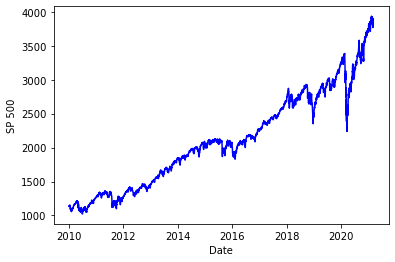

In [539]:
plt.plot(cds_service.iloc[:,0],data_c.loc[:,"SP_500"], color="blue")
plt.xlabel("Date")
plt.ylabel("SP 500")
plt.savefig('sp500.png')

In [ ]:
plt.plot(cds_service.iloc[:,0],cds_service.loc[:,"CDS_5Y"], color="blue")
plt.title("5-years CDS spreads, Service")
plt.xlabel("Date")
plt.ylabel("CDS spread")
plt.savefig('ыз500.png')

In [3]:
first = pd.merge(tedspread, dollar, how="left", on="Date")
second = pd.merge(stocks, rates10yts,how="left", on="Date")
third = pd.merge(usdcny, oil,how="left", on="Date")
fourth = pd.merge(first, second,how="left", on="Date")
fifth = pd.merge(fourth, third,how="left", on="Date")

data_c = pd.merge(fifth, cds_consumer,how="left", on="Date")
data_m = pd.merge(fifth, cds_manufacturer,how="left", on="Date")
data_b = pd.merge(fifth, cds_banks,how="left", on="Date")
data_e = pd.merge(fifth, cds_energy,how="left", on="Date")
data_s = pd.merge(fifth, cds_service,how="left", on="Date")
data_f = pd.merge(fifth, cds_financial,how="left", on="Date")

In [4]:
data_c_shifted=pd.concat([data_c.shift(1).iloc[:,1:],data_c.shift(2).iloc[:,1:],data_c.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]
data_m_shifted=pd.concat([data_m.shift(1).iloc[:,1:],data_m.shift(2).iloc[:,1:],data_m.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]
data_b_shifted=pd.concat([data_b.shift(1).iloc[:,1:],data_b.shift(2).iloc[:,1:],data_b.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]
data_f_shifted=pd.concat([data_f.shift(1).iloc[:,1:],data_f.shift(2).iloc[:,1:],data_f.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]
data_e_shifted=pd.concat([data_e.shift(1).iloc[:,1:],data_e.shift(2).iloc[:,1:],data_e.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]
data_s_shifted=pd.concat([data_s.shift(1).iloc[:,1:],data_s.shift(2).iloc[:,1:],data_s.shift(3).iloc[:,1:]], axis=1).iloc[3:,:]

In [5]:
##имена для колонок сдвинутых данных
a=list(data_c.iloc[:,1:].columns)
num=0
names=list()

    
for num in range(1,4):
    if num==0:
        for i in a:
            names.append(i)
    else:
        numb='_lag{}'.format(num)
        for i in a:
            names.append('{}'.format(i)+numb)
    
        
data_c_shifted.columns = names
data_m_shifted.columns = names
data_b_shifted.columns = names
data_e_shifted.columns = names
data_f_shifted.columns = names
data_s_shifted.columns = names

In [6]:
trainset_c=data_c_shifted.iloc[:2082,:]
testset_c=data_c_shifted.iloc[2082:,:]
x_train_c=pd.concat([trainset_c.iloc[:,0:21],trainset_c.iloc[:,31:52],trainset_c.iloc[:,62:83],trainset_c.iloc[:,26],trainset_c.iloc[:,57],trainset_c.iloc[:,88]], axis=1)
x_test_c=pd.concat([testset_c.iloc[:,0:21],testset_c.iloc[:,31:52],testset_c.iloc[:,62:83],testset_c.iloc[:,26],testset_c.iloc[:,57],testset_c.iloc[:,88]], axis=1)
y_train_c=data_c.iloc[3:2085,27]
y_test_c=data_c.iloc[2085:,27]

trainset_b=data_b_shifted.iloc[:2082,:]
testset_b=data_b_shifted.iloc[2082:,:]
x_train_b=pd.concat([trainset_b.iloc[:,0:21],trainset_b.iloc[:,31:52],trainset_b.iloc[:,62:83],trainset_b.iloc[:,26],trainset_b.iloc[:,57],trainset_b.iloc[:,88]], axis=1)
x_test_b=pd.concat([testset_b.iloc[:,0:21],testset_b.iloc[:,31:52],testset_b.iloc[:,62:83],testset_b.iloc[:,26],testset_b.iloc[:,57],testset_b.iloc[:,88]], axis=1)
y_train_b=data_b.iloc[3:2085,27]
y_test_b=data_b.iloc[2085:,27]


trainset_m=data_m_shifted.iloc[:2082,:]
testset_m=data_m_shifted.iloc[2082:,:]
x_train_m=pd.concat([trainset_m.iloc[:,0:21],trainset_m.iloc[:,31:52],trainset_m.iloc[:,62:83],trainset_m.iloc[:,26],trainset_m.iloc[:,57],trainset_m.iloc[:,88]], axis=1)
x_test_m=pd.concat([testset_m.iloc[:,0:21],testset_m.iloc[:,31:52],testset_m.iloc[:,62:83],testset_m.iloc[:,26],testset_m.iloc[:,57],testset_m.iloc[:,88]], axis=1)
y_train_m=data_m.iloc[3:2085,27]
y_test_m=data_m.iloc[2085:,27]

trainset_f=data_f_shifted.iloc[:2082,:]
testset_f=data_f_shifted.iloc[2082:,:]
x_train_f=pd.concat([trainset_f.iloc[:,0:21],trainset_f.iloc[:,31:52],trainset_f.iloc[:,62:83],trainset_f.iloc[:,26],trainset_f.iloc[:,57],trainset_f.iloc[:,88]], axis=1)
x_test_f=pd.concat([testset_f.iloc[:,0:21],testset_f.iloc[:,31:52],testset_f.iloc[:,62:83],testset_f.iloc[:,26],testset_f.iloc[:,57],testset_f.iloc[:,88]], axis=1)
y_train_f=data_f.iloc[3:2085,27]
y_test_f=data_f.iloc[2085:,27]

trainset_e=data_e_shifted.iloc[:2082,:]
testset_e=data_e_shifted.iloc[2082:,:]
x_train_e=pd.concat([trainset_e.iloc[:,0:21],trainset_e.iloc[:,31:52],trainset_e.iloc[:,62:83],trainset_e.iloc[:,26],trainset_e.iloc[:,57],trainset_e.iloc[:,88]], axis=1)
x_test_e=pd.concat([testset_e.iloc[:,0:21],testset_e.iloc[:,31:52],testset_e.iloc[:,62:83],testset_e.iloc[:,26],testset_e.iloc[:,57],testset_e.iloc[:,88]], axis=1)
y_train_e=data_e.iloc[3:2085,27]
y_test_e=data_e.iloc[2085:,27]

trainset_s=data_s_shifted.iloc[:2082,:]
testset_s=data_s_shifted.iloc[2082:,:]
x_train_s=pd.concat([trainset_s.iloc[:,0:21],trainset_s.iloc[:,31:52],trainset_s.iloc[:,62:83],trainset_s.iloc[:,26],trainset_s.iloc[:,57],trainset_s.iloc[:,88]], axis=1)
x_test_s=pd.concat([testset_s.iloc[:,0:21],testset_s.iloc[:,31:52],testset_s.iloc[:,62:83],testset_s.iloc[:,26],testset_s.iloc[:,57],testset_s.iloc[:,88]], axis=1)
y_train_s=data_s.iloc[3:2085,27]
y_test_s=data_s.iloc[2085:,27]


In [141]:
trainset_s.shape

(2082, 93)

In [142]:
y_train_s.shape

(2082,)

In [8]:
set_m=['TEDRATE_lag1','SP_industrial_lag1', 'SP_information_technology_lag1','SP_materials_lag1','SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2', 'SP_information_technology_lag2','SP_materials_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2']
set_c=['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2', 'SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag2']
set_b=['TEDRATE_lag1', 'NASDAQ_Bank_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2', 'NASDAQ_Bank_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag2']
set_f=['TEDRATE_lag1','NASDAQ_Financial_100_lag1',
       'NASDAQ_real_estate_and_other_fanacial_services_lag1', 'SP_500_lag1',
       'SP_energy_lag1', 'SP_financial_lag1', 'SP_health_care_lag1',
       'SP_real_estate_lag1',
       'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1',
       'USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','NASDAQ_Financial_100_lag2',
       'NASDAQ_real_estate_and_other_fanacial_services_lag2', 'SP_500_lag2',
       'SP_energy_lag2', 'SP_financial_lag2', 'SP_health_care_lag2',
       'SP_real_estate_lag2',
       'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2',
       'USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag2']
set_e=['TEDRATE_lag1','SP_500_lag1',
       'SP_energy_lag1','SP_utilities_lag1',
       'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1',
       'USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_500_lag2',
       'SP_energy_lag2','SP_utilities_lag2',
       'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2',
       'USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag2']
set_s=['TEDRATE_lag1','SP_health_care_lag1',
       'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1',
       'USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_health_care_lag2',
       'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2',
       'USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag2']

In [8]:
def RMSE(y_true,y_pred):
    rmse=metr.mean_squared_error(y_true, y_pred, squared=False)
    print('RMSE: %2.3f'%rmse)
    return rmse
def score(y_true,y_pred):
    score=RMSE(y_true,y_pred)
    return score
def scorer():
    return make_scorer(score, greater_is_better=False)

In [16]:
pd.concat([data_c.iloc[:,1:21],data_c.iloc[:,27]],axis=1).corr()

,TEDRATE,USD_index,NASDAQ_Bank,NASDAQ_Financial_100,NASDAQ_Insurance_index,NASDAQ_real_estate_and_other_fanacial_services,SP_500,SP_consumer_discretionary,SP_consumer_staples,SP_energy,...,SP_health_care,SP_industrial,SP_information_technology,SP_materials,SP_real_estate,SP_utilities,SP_VIX,10Y_yield_minus_fed_funds_rate,USD_CNY_Exchange_Rate,CDS_5Y
TEDRATE,1.000000,0.297825,0.122133,0.047569,0.068951,-0.027112,0.005461,-0.011087,0.085463,-0.106857,...,0.047219,0.023328,-0.029055,-0.064465,0.074623,0.085348,0.260444,-0.205554,0.176529,-0.008927
USD_index,0.297825,1.000000,0.758562,0.762676,0.819405,0.696001,0.732499,0.716390,0.825187,-0.383502,...,0.799109,0.753765,0.618294,0.642282,0.809312,0.790244,-0.115900,-0.688242,0.547855,-0.658678
NASDAQ_Bank,0.122133,0.758562,1.000000,0.936685,0.909950,0.846766,0.840260,0.796869,0.834576,-0.105529,...,0.837920,0.921198,0.698304,0.863758,0.817393,0.817881,-0.373909,-0.634040,0.377109,-0.654234
NASDAQ_Financial_100,0.047569,0.762676,0.936685,1.000000,0.972056,0.977320,0.970560,0.947869,0.929001,-0.332529,...,0.954174,0.986532,0.894243,0.949681,0.911803,0.939979,-0.200405,-0.760045,0.471455,-0.649912
NASDAQ_Insurance_index,0.068951,0.819405,0.909950,0.972056,1.000000,0.946088,0.954542,0.932995,0.972669,-0.305071,...,0.956629,0.978556,0.854202,0.926768,0.962224,0.963159,-0.243915,-0.797608,0.431995,-0.747276
NASDAQ_real_estate_and_other_fanacial_services,-0.027112,0.696001,0.846766,0.977320,0.946088,1.000000,0.992096,0.983805,0.926818,-0.422899,...,0.965188,0.969947,0.959256,0.959145,0.905759,0.944873,-0.100006,-0.762556,0.453585,-0.622459
SP_500,0.005461,0.732499,0.840260,0.970560,0.954542,0.992096,1.000000,0.993514,0.955159,-0.430092,...,0.984893,0.976518,0.961726,0.963579,0.929140,0.961232,-0.093560,-0.779972,0.440437,-0.667757
SP_consumer_discretionary,-0.011087,0.716390,0.796869,0.947869,0.932995,0.983805,0.993514,1.000000,0.942618,-0.483672,...,0.976367,0.953953,0.974020,0.945865,0.909969,0.944565,-0.042282,-0.776011,0.437194,-0.643617
SP_consumer_staples,0.085463,0.825187,0.834576,0.929001,0.972669,0.926818,0.955159,0.942618,1.000000,-0.348868,...,0.974708,0.957300,0.866508,0.919496,0.971299,0.966327,-0.174331,-0.787597,0.383545,-0.810826
SP_energy,-0.106857,-0.383502,-0.105529,-0.332529,-0.305071,-0.422899,-0.430092,-0.483672,-0.348868,1.000000,...,-0.409944,-0.282507,-0.602538,-0.250976,-0.283765,-0.425562,-0.584504,0.451464,-0.665633,-0.013147


## Consumer

### Исходные данные

RMSE is  1.2542414977098237


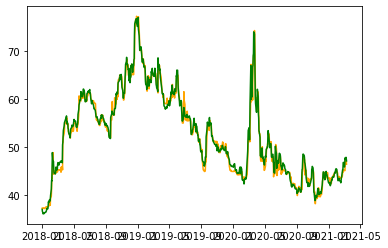

In [53]:
rf_model_c = RandomForestRegressor()
rf_model_c.fit(x_train_c, y_train_c)

history_c=x_train_c
rf_c_pred=[]

for i in range(0,len(x_test_c)):
    history_c=history_c.append(x_test_c.iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])
    

rf_c_rmse=metr.mean_squared_error(y_test_c, rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse)
plt.plot(data_c.iloc[2085:,0],rf_c_pred, color="orange")
plt.plot(data_c.iloc[2085:,0],y_test_c,color="green")
plt.show()

RMSE is  1.1308839167211222


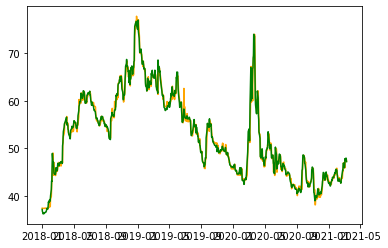

In [34]:
random.seed(1611)
rf_model_c = RandomForestRegressor(random_state=1611)
rf_model_c.fit(x_train_c[['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2', 'SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']], y_train_c)

history_c=x_train_c[['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2', 'SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']]
rf_c_pred=[]

for i in range(0,len(x_test_c)):
    history_c=history_c.append(x_test_c[['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2', 'SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']].iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse=metr.mean_squared_error(y_test_c, rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse)
plt.plot(data_c.iloc[2085:,0],rf_c_pred, color="orange")
plt.plot(data_c.iloc[2085:,0],y_test_c,color="green")
plt.show()


In [ ]:
умный+без млк

RMSE is  1.730548837440324


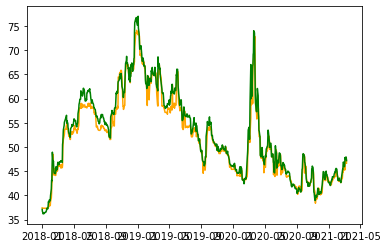

In [88]:
rf_model_c = RandomForestRegressor(bootstrap = True,
  max_depth = 8,
  max_features = 8,
  min_samples_leaf = 2,
  min_samples_split = 5,
  n_estimators = 8)

rf_model_c.fit(x_train_c[['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2','SP_consumer_discretionary_lag2', 'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']], y_train_c)

history_c=x_train_c[['TEDRATE_lag1','SP_consumer_discretionary_lag1', 'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2','SP_consumer_discretionary_lag2', 'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']]
rf_c_pred=[]

for i in range(0,len(x_test_c)):
    history_c=history_c.append(x_test_c[['TEDRATE_lag1','SP_consumer_discretionary_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2','SP_consumer_discretionary_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']].iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse=metr.mean_squared_error(y_test_c, rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse)
plt.plot(data_c.iloc[2085:,0],rf_c_pred, color="orange")
plt.plot(data_c.iloc[2085:,0],y_test_c,color="green")
plt.show()
##попробовать так, потом если чот убрать sp500 и nasdaq

In [92]:
error = metr.mean_squared_error(y_test_c, rf_c_pred, squared=False)
error1 = metr.mean_absolute_percentage_error(y_test_c, rf_c_pred)
error2 = metr.mean_absolute_error(y_test_c, rf_c_pred)
print('Random RMSE: %.3f' % error,'Random MAPE: %.3f' % error1,'Random MAE: %.3f' % error2)

Random RMSE: 1.731 Random MAPE: 0.022 Random MAE: 1.235


tuning

In [85]:
param_grid = {'max_depth': [3,5,6,7,8,9,10,40,80,None],
            'max_features': [2,3,4,8,10],
            'min_samples_leaf':[2],
            'min_samples_split':[5],
            'n_estimators': [5,8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611,bootstrap=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring=['neg_root_mean_squared_error','neg_mean_absolute_percentage_error','neg_mean_absolute_error'])

In [86]:
grid_search.fit(x_train_c[['TEDRATE_lag1','SP_consumer_discretionary_lag1','NASDAQ_Insurance_index_lag1','SP_VIX_lag1','SP_energy_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','NASDAQ_Insurance_index_lag2','SP_consumer_discretionary_lag2','SP_VIX_lag2','SP_energy_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2']], y_train_c)
here

Fitting 3 folds for each of 280 candidates, totalling 840 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1611),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 8, 10, 40, 80, None],
                         'max_features': [2, 3, 4, 8, 10],
                         'n_estimators': [8, 50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [87]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 8, 'max_features': 8, 'n_estimators': 8}

In [60]:
x_train_c[['TEDRATE_lag1', 'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1','SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2', 'USD_index_lag2','SP_500_lag2','SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2','SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']].corr()
{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

,TEDRATE_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_VIX_lag1,10Y_yield_minus_fed_funds_rate_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,TEDRATE_lag2,USD_index_lag2,SP_500_lag2,SP_consumer_discretionary_lag2,SP_consumer_staples_lag2,SP_VIX_lag2,10Y_yield_minus_fed_funds_rate_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag1,CDS_5Y_lag2
TEDRATE_lag1,1.000000,0.246447,0.287338,0.094183,-0.519943,0.309563,-0.355067,0.990987,0.430994,0.212071,0.246934,0.287726,0.098262,-0.518623,0.308256,-0.356220,-0.120582,-0.119975
SP_consumer_discretionary_lag1,0.246447,1.000000,0.988788,-0.636484,-0.609154,0.052155,-0.687624,0.246518,0.835215,0.992222,0.999622,0.988536,-0.634613,-0.609764,0.050585,-0.687361,-0.952197,-0.951776
SP_consumer_staples_lag1,0.287338,0.988788,1.000000,-0.625341,-0.658529,0.035866,-0.701142,0.287439,0.839318,0.977808,0.988479,0.999535,-0.623065,-0.658929,0.034164,-0.700657,-0.953436,-0.952992
SP_VIX_lag1,0.094183,-0.636484,-0.625341,1.000000,0.273559,0.079542,0.160228,0.089566,-0.376074,-0.661623,-0.632747,-0.622287,0.966550,0.280107,0.079542,0.162910,0.697103,0.691208
10Y_yield_minus_fed_funds_rate_lag1,-0.519943,-0.609154,-0.658529,0.273559,1.000000,-0.031158,0.529208,-0.520884,-0.566730,-0.586051,-0.609317,-0.658724,0.273497,0.996802,-0.030826,0.529358,0.554123,0.553855
USD_CNY_Exchange_Rate_lag1,0.309563,0.052155,0.035866,0.079542,-0.031158,1.000000,-0.472877,0.309935,0.357563,0.063212,0.052264,0.036171,0.079722,-0.029358,0.999252,-0.474388,0.136185,0.135391
Oil_Futures_lag1,-0.355067,-0.687624,-0.701142,0.160228,0.529208,-0.472877,1.000000,-0.353895,-0.908792,-0.654487,-0.688202,-0.701773,0.161918,0.527288,-0.470728,0.998334,0.590835,0.592159
TEDRATE_lag2,0.990987,0.246518,0.287439,0.089566,-0.520884,0.309935,-0.353895,1.000000,0.430961,0.212194,0.246881,0.287743,0.094225,-0.520300,0.308599,-0.355050,-0.121691,-0.120843
USD_index_lag2,0.430994,0.835215,0.839318,-0.376074,-0.566730,0.357563,-0.908792,0.430961,1.000000,0.804567,0.835325,0.839426,-0.374250,-0.566383,0.355200,-0.909108,-0.745682,-0.745837
SP_500_lag2,0.212071,0.992222,0.977808,-0.661623,-0.586051,0.063212,-0.654487,0.212194,0.804567,1.000000,0.992573,0.978253,-0.666204,-0.585706,0.061836,-0.653540,-0.941749,-0.941778


### Предсказание до кризиса

In [420]:
set_c_mod_lag=['SP_consumer_staples_lag1',
               #'NASDAQ_Insurance_index_lag1',
               #'USD_index_lag1',
              # 'SP_energy_lag1',
              # 'SP_real_estate_lag1',
 'SP_VIX_lag1',
# 'Oil_Futures_lag1',
              # 'SP_utilities_lag1',
 'CDS_5Y_lag1',
 
               'SP_consumer_staples_lag2',
               #'NASDAQ_Insurance_index_lag2',
               #'USD_index_lag1',
              # 'SP_energy_lag2',
              # 'SP_real_estate_lag2',
 'SP_VIX_lag2',
# 'Oil_Futures_lag2',
               #'SP_utilities_lag2',
 'CDS_5Y_lag2']

In [415]:
x_train_c.iloc[8:].corr()

,TEDRATE_lag1,USD_index_lag1,NASDAQ_Bank_lag1,NASDAQ_Financial_100_lag1,NASDAQ_Insurance_index_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_energy_lag1,...,SP_materials_lag3,SP_real_estate_lag3,SP_utilities_lag3,SP_VIX_lag3,10Y_yield_minus_fed_funds_rate_lag3,USD_CNY_Exchange_Rate_lag3,Oil_Futures_lag3,CDS_5Y_lag1,CDS_5Y_lag2,CDS_5Y_lag3
TEDRATE_lag1,1.000000,0.428905,0.233355,0.198024,0.276539,0.115226,0.208647,0.243173,0.284313,-0.265354,...,0.084109,0.285889,0.319905,0.103805,-0.516274,0.313128,-0.356909,-0.117793,-0.117265,-0.116889
USD_index_lag1,0.428905,1.000000,0.813958,0.800153,0.839292,0.744576,0.803150,0.834243,0.838512,-0.243295,...,0.649885,0.791854,0.802376,-0.372805,-0.562809,0.360061,-0.909523,-0.744633,-0.745049,-0.745402
NASDAQ_Bank_lag1,0.233355,0.813958,1.000000,0.993625,0.961743,0.967921,0.955643,0.944448,0.907814,0.082957,...,0.904303,0.843699,0.906202,-0.637245,-0.495902,0.281084,-0.661466,-0.844908,-0.844637,-0.844413
NASDAQ_Financial_100_lag1,0.198024,0.800153,0.993625,1.000000,0.975487,0.988709,0.977111,0.965109,0.932161,0.136911,...,0.934844,0.877495,0.926566,-0.665012,-0.508846,0.205477,-0.648276,-0.881238,-0.880895,-0.880608
NASDAQ_Insurance_index_lag1,0.276539,0.839292,0.961743,0.975487,1.000000,0.965501,0.985389,0.990399,0.980873,0.135956,...,0.912732,0.939888,0.961901,-0.638079,-0.614345,0.130959,-0.694139,-0.928006,-0.927624,-0.927280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USD_CNY_Exchange_Rate_lag3,0.313128,0.360061,0.281084,0.205477,0.130959,0.085089,0.069082,0.058554,0.041810,-0.686766,...,-0.013717,-0.038812,0.135837,0.079105,-0.041525,1.000000,-0.475616,0.134306,0.133750,0.133098
Oil_Futures_lag3,-0.356909,-0.909523,-0.661466,-0.648276,-0.694139,-0.584547,-0.654087,-0.688765,-0.701830,0.492873,...,-0.481231,-0.652896,-0.694310,0.159433,0.531495,-0.475616,1.000000,0.589604,0.589991,0.590728
CDS_5Y_lag1,-0.117793,-0.744633,-0.844908,-0.881238,-0.928006,-0.904787,-0.941578,-0.952392,-0.953635,-0.306045,...,-0.892282,-0.939417,-0.892774,0.697932,0.553957,0.134306,0.589604,1.000000,0.999011,0.997484
CDS_5Y_lag2,-0.117265,-0.745049,-0.844637,-0.880895,-0.927624,-0.904382,-0.941104,-0.952019,-0.953236,-0.304232,...,-0.892790,-0.939584,-0.892783,0.698477,0.552673,0.133750,0.589991,0.999011,1.000000,0.999008


Random RMSE: 1.08857 Random MAPE: 0.01250 Random MAE: 0.70011


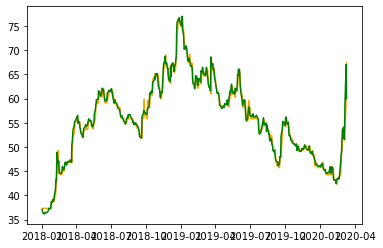

In [421]:
rf_model_c = RandomForestRegressor(bootstrap = True,
  max_depth = 8,
  max_features = 6,
  min_samples_leaf = 2,
  min_samples_split = 5,
  n_estimators = 8)
rf_model_c.fit(np.log(x_train_c).loc[:,set_c_mod_lag], np.log(y_train_c))
history_c=np.log(x_train_c).loc[:,set_c_mod_lag]
rf_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(np.log(x_test_c).loc[:,set_c_mod_lag].iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])
    

rf_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], np.exp(rf_c_pred), squared=False)
rf_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], np.exp(rf_c_pred))
rf_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], np.exp(rf_c_pred))

print('Random RMSE: %.5f' % rf_c_rmse_norm,'Random MAPE: %.5f' % rf_c_mape_norm,'Random MAE: %.5f' % rf_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],np.exp(rf_c_pred), color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()
#Random RMSE: 1.07812 Random MAPE: 0.01255 Random MAE: 0.69490

In [178]:
set_c=['TEDRATE_lag1',
 'SP_consumer_discretionary_lag1',
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_consumer_discretionary_lag2',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [106]:
np.log(x_train_c)

,TEDRATE_lag1,USD_index_lag1,NASDAQ_Bank_lag1,NASDAQ_Financial_100_lag1,NASDAQ_Insurance_index_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_energy_lag1,...,SP_materials_lag3,SP_real_estate_lag3,SP_utilities_lag3,SP_VIX_lag3,10Y_yield_minus_fed_funds_rate_lag3,USD_CNY_Exchange_Rate_lag3,Oil_Futures_lag3,CDS_5Y_lag1,CDS_5Y_lag2,CDS_5Y_lag3
3,-1.660731,4.350188,7.413554,7.614287,8.184034,8.224134,7.036272,5.470537,5.621683,6.109701,...,5.324740,4.541077,5.064680,3.032546,1.316408,1.920929,4.400726,4.322555,4.337676,4.390825
4,-1.609438,4.355593,7.439271,7.627710,8.186657,8.223045,7.040265,5.479106,5.621401,6.107468,...,5.329971,4.543755,5.053093,2.997730,1.294727,1.920915,4.403910,4.320776,4.322555,4.337676
5,-1.609438,4.349904,7.446223,7.632212,8.186239,8.227854,7.043142,5.478970,5.616310,6.112506,...,5.345058,4.541552,5.058026,2.987196,1.316408,1.920944,4.421007,4.324126,4.320776,4.322555
6,-1.560648,4.343870,7.437330,7.627909,8.184935,8.230202,7.044888,5.477952,5.620313,6.113651,...,5.340471,4.553369,5.052602,2.983660,1.321756,1.920988,4.414736,4.313654,4.324126,4.320776
7,-1.609438,4.343208,7.428927,7.620367,8.180803,8.223010,7.035462,5.465385,5.625640,6.099725,...,5.350679,4.540298,5.051352,2.936513,1.313724,1.920959,4.415824,4.320909,4.313654,4.324126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.967584,4.536324,8.309662,8.420050,9.062289,8.975753,7.894818,6.669902,6.375522,6.277324,...,5.929041,5.301276,5.596197,2.313525,0.067659,1.883852,4.061994,3.626086,3.629342,3.634727
2081,-0.967584,4.536324,8.309662,8.420050,9.062289,8.975753,7.894818,6.669902,6.375522,6.277324,...,5.932425,5.297500,5.584249,2.294553,0.058269,1.884794,4.066631,3.628426,3.626086,3.629342
2082,-0.967584,4.535359,8.301018,8.416385,9.062959,8.980200,7.893759,6.672178,6.378128,6.285525,...,5.936109,5.304863,5.585704,2.333114,0.058269,1.883427,4.068514,3.623340,3.628426,3.626086
2083,-1.309333,4.532868,8.296863,8.415484,9.062571,8.979728,7.894549,6.670243,6.378061,6.282326,...,5.936109,5.304863,5.585704,2.333114,0.058269,1.883427,4.068514,3.615852,3.623340,3.628426


In [107]:
xdiffctr=np.log(x_train_c).loc[:,set_c]
xdiffcte=np.log(x_test_c).loc[:,set_c]
ydiffctr=np.log(y_train_c)
ydiffcte=np.log(y_test_c)

In [247]:
param_grid = {'max_depth': [3,5,6,7,8,10,50],
            'max_features': ['auto',2,4,8,15],
            #'min_samples_leaf':[1,2,5,8,10],
            #'min_samples_split':[1,2,5,8,10] #,
            'n_estimators': [5,8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611,bootstrap=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring=scorer())

In [248]:
grid_search.fit(xdiffctr, ydiffctr)

Fitting 3 folds for each of 175 candidates, totalling 525 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.12540961 -0.12212057 -0.11879307 -0.1171676  -0.1168371  -0.14146628
 -0.13739318 -0.13797156 -0.13659695 -0.13496471 -0.12171163 -0.12637239
 -0.1240767  -0.12236857 -0.12194325 -0.12118037 -0.12392187 -0.11715963
 -0.11518553 -0.11519257         nan         nan         nan         nan
         nan -0.08319236 -0.08187395 -0.08087746 -0.07869591 -0.07813699
 -0.11017489 -0.10650644 -0.1060962  -0.1055054  -0.10539651 -0.08594661
 -0.09033972 -0.09443454 -0.09058077 -0.08983895 -0.08420408 -0.08485724
 -0.08416517 -0.08102715 -0.08047601         nan         nan         nan
         nan         nan -0.07513599 -0.07607755 -0.07679803 -0.07466791
 -0.07467924 -0.11603684 -0.11556993 -0.1026806  -0.10122341 -0.10029511
 -0.08935391 -0.08928203 -0.08852516 -0.08560222 -0.08458035 -0.08083229
 -0.08023443 -0.07759369 -0.0761087  -0.07630992      

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1611),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7, 8, 10, 50],
                         'max_features': ['auto', 2, 4, 8, 15],
                         'n_estimators': [5, 8, 50, 100, 200]},
             scoring=make_scorer(score, greater_is_better=False), verbose=2)

In [249]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 5}

In [ ]:
bootstrap = True,
  max_depth = 10,
  max_features = 'auto',
  min_samples_leaf = 1,
  min_samples_split = 5,
  n_estimators = 200,
  random_state=1611

In [198]:
x_train_c

,TEDRATE_lag1,USD_index_lag1,NASDAQ_Bank_lag1,NASDAQ_Financial_100_lag1,NASDAQ_Insurance_index_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_energy_lag1,...,SP_materials_lag3,SP_real_estate_lag3,SP_utilities_lag3,SP_VIX_lag3,10Y_yield_minus_fed_funds_rate_lag3,USD_CNY_Exchange_Rate_lag3,Oil_Futures_lag3,CDS_5Y_lag1,CDS_5Y_lag2,CDS_5Y_lag3
3,0.19,77.493,1658.31,2026.95,3583.28,3729.89,1137.14,237.5877,276.3541,450.2040,...,205.3550,93.7918,158.3297,20.75,3.73,6.8273,81.51,75.3810,76.5295,80.7070
4,0.20,77.913,1701.51,2054.34,3592.69,3725.83,1141.69,239.6324,276.2763,449.1999,...,206.4320,94.0433,156.5058,20.04,3.65,6.8272,81.77,75.2470,75.3810,76.5295
5,0.20,77.471,1713.38,2063.61,3591.19,3743.79,1144.98,239.5999,274.8731,451.4685,...,209.5700,93.8363,157.2798,19.83,3.73,6.8274,83.18,75.4995,75.2470,75.3810
6,0.21,77.005,1698.21,2054.75,3586.51,3752.59,1146.98,239.3560,275.9758,451.9857,...,208.6110,94.9518,156.4289,19.76,3.75,6.8277,82.66,74.7130,75.4995,75.2470
7,0.20,76.954,1684.00,2039.31,3571.72,3725.70,1136.22,236.3668,277.4497,445.7353,...,210.7514,93.7187,156.2336,18.85,3.72,6.8275,82.75,75.2570,74.7130,75.4995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,0.38,93.347,4062.94,4537.13,8623.87,7908.97,2683.34,788.3181,587.2921,532.3619,...,375.7941,200.5926,269.3998,10.11,1.07,6.5788,58.09,37.5655,37.6880,37.8915
2081,0.38,93.347,4062.94,4537.13,8623.87,7908.97,2683.34,788.3181,587.2921,532.3619,...,377.0677,199.8366,266.2003,9.92,1.06,6.5850,58.36,37.6535,37.5655,37.6880
2082,0.38,93.257,4027.97,4520.53,8629.65,7944.22,2680.50,790.1145,588.8245,536.7462,...,378.4593,201.3135,266.5879,10.31,1.06,6.5760,58.47,37.4625,37.6535,37.5655
2083,0.27,93.025,4011.27,4516.46,8626.30,7940.47,2682.62,788.5875,588.7850,535.0317,...,378.4593,201.3135,266.5879,10.31,1.06,6.5760,58.47,37.1830,37.4625,37.6535


In [256]:
xdiffctr=np.log(x_train_c.loc[:,set_c])#.loc[:,[set_c[5],set_c[6],set_c[9],set_c[12],set_c[13]]]
xdiffcte=np.log(x_test_c.loc[:,set_c])#.loc[:,[set_c[5],set_c[6],set_c[9],set_c[12],set_c[13]]]
ydiffctr=np.log(y_train_c)
ydiffcte=np.log(y_test_c)

In [257]:
#rf_model_c = RandomForestRegressor(random_state=1611,bootstrap=True,max_depth=8,max_features='auto',n_estimators=1000,min_samples_leaf=1, min_samples_split=2)
rf_model_c = RandomForestRegressor(random_state=1611,bootstrap=True,max_depth=6,max_features='auto',n_estimators=1000,min_samples_leaf=1, min_samples_split=2)

Random RMSE: 0.019 Random MAPE: 0.003 Random MAE: 0.013


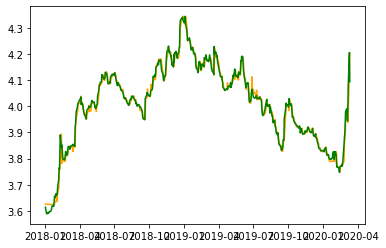

In [258]:
rf_model_c.fit(xdiffctr, ydiffctr)
history_c=xdiffctr
rf_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(xdiffcte.iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])
    

rf_c_rmse_norm=metr.mean_squared_error(ydiffcte.iloc[:572], rf_c_pred, squared=False)
rf_c_mape_norm = metr.mean_absolute_percentage_error(ydiffcte.iloc[:572], rf_c_pred)
rf_c_mae_norm = metr.mean_absolute_error(ydiffcte.iloc[:572], rf_c_pred)

print('Random RMSE: %.3f' % rf_c_rmse_norm,'Random MAPE: %.3f' % rf_c_mape_norm,'Random MAE: %.3f' % rf_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],rf_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],ydiffcte[:572],color="green")
plt.show()

In [259]:
##best est. rw - 1.010184	0.598854	0.010533 rmse mae mape

rf_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], np.exp(rf_c_pred), squared=False)
rf_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], np.exp(rf_c_pred))
rf_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], np.exp(rf_c_pred))

print('Random RMSE: %.3f' % rf_c_rmse_norm,'Random MAPE: %.3f' % rf_c_mape_norm,'Random MAE: %.3f' % rf_c_mae_norm)

Random RMSE: 1.056 Random MAPE: 0.012 Random MAE: 0.692


In [265]:
xdiffcte

,TEDRATE_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_VIX_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_consumer_discretionary_lag2,SP_consumer_staples_lag2,SP_VIX_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
2085,-1.139434,6.666103,6.375692,2.431857,1.872955,4.101320,3.617894,-1.139434,6.672746,6.376115,2.343727,1.877325,4.091674,3.614668
2086,-1.139434,6.666103,6.375692,2.431857,1.872955,4.101320,3.613860,-1.139434,6.666103,6.375692,2.431857,1.872955,4.101320,3.617894
2087,-1.272966,6.681112,6.370211,2.301585,1.870725,4.100492,3.602027,-1.139434,6.666103,6.375692,2.431857,1.872955,4.101320,3.613860
2088,-1.171183,6.686435,6.369617,2.242835,1.872033,4.121149,3.598408,-1.272966,6.681112,6.370211,2.301585,1.870725,4.100492,3.602027
2089,-1.171183,6.689623,6.372186,2.244956,1.871264,4.127296,3.589860,-1.171183,6.686435,6.369617,2.242835,1.872033,4.121149,3.598408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,-1.966113,7.150448,6.478469,3.296947,1.866496,4.115454,3.835228,-1.966113,7.174547,6.483957,3.195402,1.867423,4.090169,3.827053
2914,-1.966113,7.130036,6.473114,3.367641,1.866991,4.156223,3.867465,-1.966113,7.150448,6.478469,3.296947,1.866496,4.115454,3.835228
2915,-1.897120,7.137207,6.494422,3.218076,1.870417,4.191017,3.862539,-1.966113,7.130036,6.473114,3.367641,1.866991,4.156223,3.867465
2916,-2.040221,7.135330,6.497607,3.249987,1.875901,4.175156,3.870055,-1.897120,7.137207,6.494422,3.218076,1.870417,4.191017,3.862539


In [271]:
metr.mean_squared_error(y_test_c.iloc[:572], np.exp(rf_model_c.predict(xdiffcte.iloc[:572,:].fillna(0))), squared=False)

1.0561385894759339

In [176]:
[set_c[5],set_c[6],set_c[9],set_c[12],set_c[13]]

['Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'SP_consumer_staples_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [221]:
set_c_c

Index(['TEDRATE_lag1', 'USD_index_lag1', 'NASDAQ_Bank_lag1',
       'NASDAQ_Financial_100_lag1', 'NASDAQ_Insurance_index_lag1',
       'NASDAQ_real_estate_and_other_fanacial_services_lag1', 'SP_500_lag1',
       'SP_consumer_discretionary_lag1', 'SP_consumer_staples_lag1',
       'SP_energy_lag1', 'SP_financial_lag1', 'SP_health_care_lag1',
       'SP_industrial_lag1', 'SP_information_technology_lag1',
       'SP_materials_lag1', 'SP_real_estate_lag1', 'SP_utilities_lag1',
       'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1',
       'USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1', 'TEDRATE_lag2',
       'USD_index_lag2', 'NASDAQ_Bank_lag2', 'NASDAQ_Financial_100_lag2',
       'NASDAQ_Insurance_index_lag2',
       'NASDAQ_real_estate_and_other_fanacial_services_lag2', 'SP_500_lag2',
       'SP_consumer_discretionary_lag2', 'SP_consumer_staples_lag2',
       'SP_energy_lag2', 'SP_financial_lag2', 'SP_health_care_lag2',
       'SP_industrial_lag2', 'SP_information_technology_lag2'

In [240]:
set_c_c=x_train_c.drop(columns=['10Y_yield_minus_fed_funds_rate_lag1', '10Y_yield_minus_fed_funds_rate_lag2','10Y_yield_minus_fed_funds_rate_lag3']).columns
set_c_c=[set_c_c[6], set_c_c[8], set_c_c[11], set_c_c[12], set_c_c[24],set_c_c[26], set_c_c[28], set_c_c[32], set_c_c[42], set_c_c[46], set_c_c[48], set_c_c[60],set_c_c[61] ,set_c_c[62]]

In [213]:
rf_model_c.feature_importances_ 2,4,6-8,10-13,24,26-28,30-33,42,44,46-48,50-53,60-62
6,8,11,12,24,26,28,32,42,46,48,60-62

array([0.00055412, 0.00331477, 0.01043462, 0.00652122, 0.03658431,
       0.00696699, 0.04332793, 0.02717788, 0.03663857, 0.00102143,
       0.01306035, 0.03504967, 0.0358512 , 0.02159052, 0.00571071,
       0.00355416, 0.00244525, 0.00094323, 0.00304438, 0.00295361,
       0.0006909 , 0.00244353, 0.00882875, 0.00816153, 0.02088424,
       0.00366774, 0.03661064, 0.0235833 , 0.04806457, 0.00050835,
       0.01076767, 0.02359574, 0.03528798, 0.02347834, 0.00195516,
       0.00335606, 0.00481684, 0.00099509, 0.00246548, 0.00310898,
       0.0005931 , 0.00303819, 0.01071245, 0.00505835, 0.02794941,
       0.00438532, 0.03250962, 0.0188355 , 0.04883203, 0.00075564,
       0.01163181, 0.02908874, 0.01740673, 0.01754524, 0.00190048,
       0.00384573, 0.00483521, 0.00126889, 0.00205142, 0.00264213,
       0.06560678, 0.06465599, 0.0648354 ])

In [169]:
len(rf_model_c.feature_importances_)

14

Random RMSE: 1.084 Random MAPE: 0.013 Random MAE: 0.727


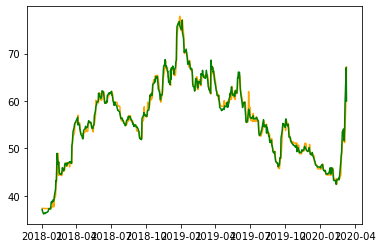

In [52]:
rf_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], rf_c_pred, squared=False)
rf_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], rf_c_pred)
rf_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], rf_c_pred)

print('Random RMSE: %.3f' % rf_c_rmse_norm,'Random MAPE: %.3f' % rf_c_mape_norm,'Random MAE: %.3f' % rf_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],rf_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()

### Предсказание после кризиса

In [182]:
set_c_c=['SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'CDS_5Y_lag1',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'CDS_5Y_lag2']
rf_model_c=RandomForestRegressor()
rf_model_c.fit(np.log(x_train_c).loc[:,set_c_c],np.log(y_train_c))

RandomForestRegressor()

Random RMSE: 1.228 Random MAPE: 0.016 Random MAE: 0.767


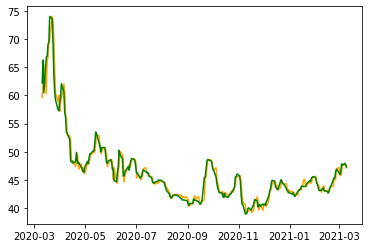

In [184]:
history_c=pd.concat([np.log(x_train_c).loc[:,set_c_c],np.log(x_test_c).loc[:,set_c_c].iloc[0:572]])
rf_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(np.log(x_test_c).loc[:,set_c_c].iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], np.exp(rf_c_pred), squared=False)
rf_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], np.exp(rf_c_pred))
rf_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], np.exp(rf_c_pred))

print('Random RMSE: %.3f' % rf_c_rmse_cris,'Random MAPE: %.3f' % rf_c_mape_cris,'Random MAE: %.3f' % rf_c_mae_cris)

plt.plot(data_c.iloc[2657:,0],np.exp(rf_c_pred), color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()
#1.192099	0.688487	0.013830

### 1st diff

In [209]:
data_c_shifted_diff=data_c_shifted.diff().iloc[1:,:]
data_c_diff=data_c.iloc[3:,:].diff().iloc[1:,:]
# надо с 07.01 до 10.03.2021 или 29.12.2017

In [208]:
data_c_diff.shape

(2081, 32)

In [212]:
data_c_shifted_diff=data_c_shifted.diff().iloc[1:,:]
data_c_diff=data_c.iloc[3:,:].diff().iloc[1:,:]
trainset_c_diff=data_c_shifted_diff.iloc[:2081,:]
testset_c_diff=data_c_shifted_diff.iloc[2081:,:]
x_train_c_diff=pd.concat([trainset_c_diff.iloc[:,0:21],trainset_c_diff.iloc[:,31:52],trainset_c_diff.iloc[:,62:83],trainset_c_diff.iloc[:,26],trainset_c_diff.iloc[:,57],trainset_c_diff.iloc[:,88]], axis=1)
x_test_c_diff=pd.concat([testset_c_diff.iloc[:,0:21],testset_c_diff.iloc[:,31:52],testset_c_diff.iloc[:,62:83],testset_c_diff.iloc[:,26],testset_c_diff.iloc[:,57],testset_c_diff.iloc[:,88]], axis=1)
y_train_c_diff=data_c_diff.iloc[:2081,27]
y_test_c_diff=data_c_diff.iloc[2081:,27]

RMSE is  1.0930563044659192


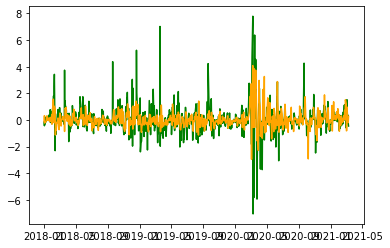

In [213]:
data_c_shifted_diff=data_c_shifted.diff().iloc[1:,:]
data_c_diff=data_c.iloc[3:,:].diff().iloc[1:,:]
trainset_c_diff=data_c_shifted_diff.iloc[:2081,:]
testset_c_diff=data_c_shifted_diff.iloc[2081:,:]
x_train_c_diff=pd.concat([trainset_c_diff.iloc[:,0:21],trainset_c_diff.iloc[:,31:52],trainset_c_diff.iloc[:,62:83],trainset_c_diff.iloc[:,26],trainset_c_diff.iloc[:,57],trainset_c_diff.iloc[:,88]], axis=1)
x_test_c_diff=pd.concat([testset_c_diff.iloc[:,0:21],testset_c_diff.iloc[:,31:52],testset_c_diff.iloc[:,62:83],testset_c_diff.iloc[:,26],testset_c_diff.iloc[:,57],testset_c_diff.iloc[:,88]], axis=1)
y_train_c_diff=data_c_diff.iloc[:2081,27]
y_test_c_diff=data_c_diff.iloc[2081:,27]
rf_model_c = RandomForestRegressor()
rf_model_c.fit(x_train_c_diff, y_train_c_diff)

history_c=x_train_c_diff
rf_c_pred=[]

for i in range(0,len(x_test_c_diff)):
    history_c=history_c.append(x_test_c_diff.iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse=metr.mean_squared_error(y_test_c_diff, rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse) #1.12 для части переменных, для всех 1.14

plt.plot(data_c.iloc[2085:,0],y_test_c_diff,color="green")
plt.plot(data_c.iloc[2085:,0],rf_c_pred, color="orange")
plt.show()

#### До кризиса

RMSE is  1.005353102852623


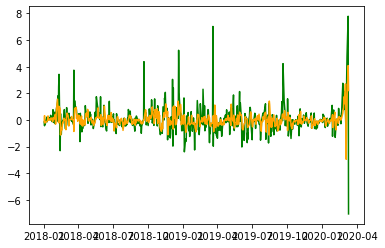

In [216]:
data_c_shifted_diff=data_c_shifted.diff().iloc[1:,:]
data_c_diff=data_c.iloc[3:,:].diff().iloc[1:,:]
trainset_c_diff=data_c_shifted_diff.iloc[:2081,:]
testset_c_diff=data_c_shifted_diff.iloc[2081:,:]
x_train_c_diff=pd.concat([trainset_c_diff.iloc[:,0:21],trainset_c_diff.iloc[:,31:52],trainset_c_diff.iloc[:,62:83],trainset_c_diff.iloc[:,26],trainset_c_diff.iloc[:,57],trainset_c_diff.iloc[:,88]], axis=1)
x_test_c_diff=pd.concat([testset_c_diff.iloc[:,0:21],testset_c_diff.iloc[:,31:52],testset_c_diff.iloc[:,62:83],testset_c_diff.iloc[:,26],testset_c_diff.iloc[:,57],testset_c_diff.iloc[:,88]], axis=1)
y_train_c_diff=data_c_diff.iloc[:2081,27]
y_test_c_diff=data_c_diff.iloc[2081:,27]
rf_model_c = RandomForestRegressor()
rf_model_c.fit(x_train_c_diff, y_train_c_diff)
history_c=x_train_c_diff
rf_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c_diff.iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse=metr.mean_squared_error(y_test_c_diff.iloc[:572], rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse) #1.12 для части переменных, для всех 1.14

plt.plot(data_c.iloc[2085:2657,0],y_test_c_diff.iloc[:572],color="green")
plt.plot(data_c.iloc[2085:2657,0],rf_c_pred, color="orange")
plt.show()

#### После кризиса

RMSE is  1.005353102852623


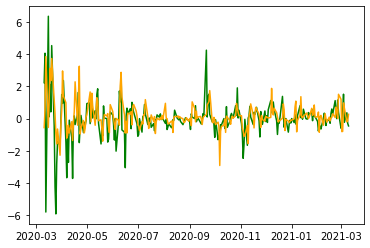

In [218]:
history_c=pd.concat([x_train_c_diff,x_test_c_diff.iloc[0:572]],axis=0)
rf_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c_diff.iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse_cris_diff=metr.mean_squared_error(y_test_c_diff.iloc[572:], rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse) #1.12 для части переменных, для всех 1.14

plt.plot(data_c.iloc[2657:,0],y_test_c_diff.iloc[572:],color="green")
plt.plot(data_c.iloc[2657:,0],rf_c_pred, color="orange")
plt.show()

In [53]:
data_c_shifted_logdiff=np.log(data_c_shifted).diff().iloc[1:,:]
data_c_shifted_logdiff

,TEDRATE_lag3,USD_index_lag3,NASDAQ_Bank_lag3,NASDAQ_Financial_100_lag3,NASDAQ_Insurance_index_lag3,NASDAQ_real_estate_and_other_fanacial_services_lag3,SP_500_lag3,SP_consumer_discretionary_lag3,SP_consumer_staples_lag3,SP_energy_lag3,...,CDS_6M,CDS_1Y,CDS_2Y,CDS_3Y,CDS_4Y,CDS_5Y,CDS_7Y,CDS_10Y,CDS_20Y,CDS_30Y
1,0.057158,0.001212,-0.008721,-0.004202,-0.012947,-0.001528,0.003111,0.004893,-0.001082,0.007922,...,0.008660,0.006855,-0.005154,0.000208,0.003892,0.003350,0.003054,0.002569,0.001911,0.001731
2,0.054067,-0.001625,-0.001729,-0.005211,-0.009933,-0.009616,0.000545,-0.000154,-0.001253,0.010277,...,0.060858,-0.024760,-0.017349,-0.014458,-0.012164,-0.010472,-0.009475,-0.008226,-0.006759,-0.006473
3,0.051293,0.005405,0.025717,0.013422,0.002623,-0.001089,0.003993,0.008569,-0.000282,-0.002233,...,0.017774,0.015219,0.012102,0.010192,0.008509,0.007255,0.007128,0.005488,0.002263,0.001471
4,0.000000,-0.005689,0.006952,0.004502,-0.000418,0.004809,0.002878,-0.000136,-0.005092,0.005038,...,0.094871,0.082424,0.065101,0.054163,0.045838,0.039875,0.039786,0.039497,0.038293,0.037997
5,0.048790,-0.006033,-0.008893,-0.004303,-0.001304,0.002348,0.001745,-0.001018,0.004004,0.001145,...,-0.001495,-0.007767,-0.002873,-0.000533,-0.000439,-0.000428,-0.000470,-0.000610,-0.001412,-0.001991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,-0.143101,0.001759,0.032791,0.025411,0.027297,0.024693,0.023512,0.021509,0.009686,0.025438,...,0.034101,0.031852,0.031969,0.031648,0.030563,0.032237,0.029626,0.029093,0.026714,0.025213
2911,0.074108,-0.002794,-0.010386,-0.011379,-0.007066,-0.014197,-0.008114,-0.012816,-0.001757,-0.005858,...,-0.026888,-0.024344,-0.021878,-0.010415,-0.004742,-0.004926,-0.003513,-0.002883,-0.002467,-0.001938
2912,0.000000,0.001783,0.017127,-0.006562,-0.007126,-0.026001,-0.013152,-0.024099,-0.005488,0.014165,...,0.007962,0.007524,0.007724,0.007687,0.007450,0.007516,0.006067,0.005555,0.004962,0.004505
2913,0.000000,0.007493,-0.008307,-0.013673,-0.021508,-0.025441,-0.013508,-0.020412,-0.005355,0.024408,...,-0.007922,-0.007126,-0.007351,-0.006723,-0.006142,-0.006224,-0.002570,-0.004925,-0.006206,-0.006684


In [54]:
trainset_c=data_c_shifted_logdiff.iloc[:2084,:]
testset_c=data_c_shifted_logdiff.iloc[2084:,:]
x_train_c=pd.concat([trainset_c.iloc[:,0:21],trainset_c.iloc[:,31:52],trainset_c.iloc[:,62:83]], axis=1)
x_test_c=pd.concat([testset_c.iloc[:,0:21],testset_c.iloc[:,31:52],testset_c.iloc[:,62:83]], axis=1)
y_train_lag3_c=trainset_c.iloc[:,119]
y_test_lag3_c=testset_c.iloc[:,119]

In [55]:
trainset_c=data_c_shifted_logdiff.iloc[:2084,:]
testset_c=data_c_shifted_logdiff.iloc[2084:,:]
x_train_c=pd.concat([trainset_c.iloc[:,0:21],trainset_c.iloc[:,31:52],trainset_c.iloc[:,62:83]], axis=1)
x_test_c=pd.concat([testset_c.iloc[:,0:21],testset_c.iloc[:,31:52],testset_c.iloc[:,62:83]], axis=1)
y_train_lag3_c=trainset_c.iloc[:,119]
y_test_lag3_c=testset_c.iloc[:,119]
rf_model_c = RandomForestRegressor()
rf_model_c.fit(x_train_c[['NASDAQ_Insurance_index_lag3','TEDRATE_lag3','USD_CNY_Exchange_Rate_lag3']], y_train_lag3_c)

history_c=x_train_c[['NASDAQ_Insurance_index_lag3','TEDRATE_lag3','USD_CNY_Exchange_Rate_lag3']]
rf_c_pred=[]

for i in range(0,len(x_test_c)):
    history_c=history_c.append(x_test_c[['NASDAQ_Insurance_index_lag3','TEDRATE_lag3','USD_CNY_Exchange_Rate_lag3']].iloc[i])
    rf_c_pred.append(rf_model_c.predict(history_c)[-1])

rf_c_rmse=metr.mean_squared_error(y_test_lag3_c, rf_c_pred, squared=False)
print("RMSE is ",rf_c_rmse)
plt.plot(data_c.iloc[2084:2914,0],y_test_lag3_c_diff,color="green")
plt.plot(data_c.iloc[2084:2914,0],rf_c_pred, color="orange")
plt.show()

RMSE is  0.01951112803966338


### Manufacturing

#### Исходные данные

In [40]:
param_grid = {'bootstrap': [True, False],
            'max_depth': [10,40,80,None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4, 10],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
grid_search.fit(x_train_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_information_technology_lag1','SP_materials_lag1','SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2', 'SP_information_technology_lag2','SP_materials_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2']], y_train_m)


Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1611),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 40, 80, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 50, 100, 200]},
             verbose=2)

In [43]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 8}

RMSE is  3.3162153177932643


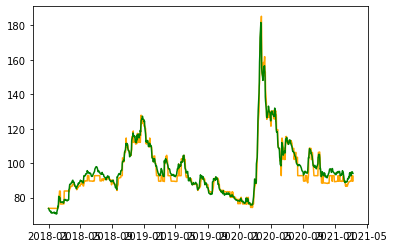

In [185]:
rf_model_m = RandomForestRegressor(
bootstrap = False,
  max_depth = 40,
  max_features = 'auto',
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200
)
rf_model_m.fit(x_train_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2','TEDRATE_lag3','SP_industrial_lag3', 'SP_VIX_lag3','10Y_yield_minus_fed_funds_rate_lag3','USD_CNY_Exchange_Rate_lag3','Oil_Futures_lag3','CDS_5Y_lag3']], y_train_m)

history_m=x_train_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2','TEDRATE_lag3','SP_industrial_lag3', 'SP_VIX_lag3','10Y_yield_minus_fed_funds_rate_lag3','USD_CNY_Exchange_Rate_lag3','Oil_Futures_lag3','CDS_5Y_lag3']]
rf_m_pred=[]

for i in range(0,len(x_test_m)):
    history_m=history_m.append(x_test_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2','TEDRATE_lag3','SP_industrial_lag3', 'SP_VIX_lag3','10Y_yield_minus_fed_funds_rate_lag3','USD_CNY_Exchange_Rate_lag3','Oil_Futures_lag3','CDS_5Y_lag3']].iloc[i])
    rf_m_pred.append(rf_model_m.predict(history_m)[-1])

rf_m_rmse=metr.mean_squared_error(y_test_m, rf_m_pred, squared=False)
print("RMSE is ",rf_m_rmse)
plt.plot(data_m.iloc[2085:,0],rf_m_pred, color="orange")
plt.plot(data_m.iloc[2085:,0],y_test_m,color="green")
plt.show()

RMSE is  2.39225504746102


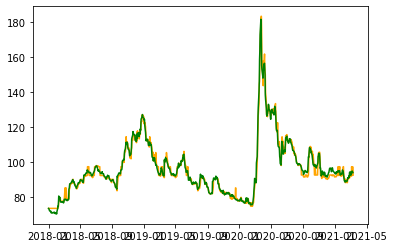

In [57]:
rf_model_m = RandomForestRegressor(
bootstrap = False,
  max_depth = 40,
  max_features = 'auto',
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 200
)
rf_model_m.fit(x_train_m[['CDS_5Y_lag1','CDS_5Y_lag2','Oil_Futures_lag1','Oil_Futures_lag2']], y_train_m)

history_m=x_train_m[['CDS_5Y_lag1','CDS_5Y_lag2','Oil_Futures_lag1','Oil_Futures_lag2']]
rf_m_pred=[]

for i in range(0,len(x_test_m)):
    history_m=history_m.append(x_test_m[['CDS_5Y_lag1','CDS_5Y_lag2','Oil_Futures_lag1','Oil_Futures_lag2']].iloc[i])
    rf_m_pred.append(rf_model_m.predict(history_m)[-1])

rf_m_rmse=metr.mean_squared_error(y_test_m, rf_m_pred, squared=False)
print("RMSE is ",rf_m_rmse)
plt.plot(data_m.iloc[2085:,0],rf_m_pred, color="orange")
plt.plot(data_m.iloc[2085:,0],y_test_m,color="green")
plt.show()
#2.15 без доп.переменных

Elapsed time to compute the importances: 0.036 seconds


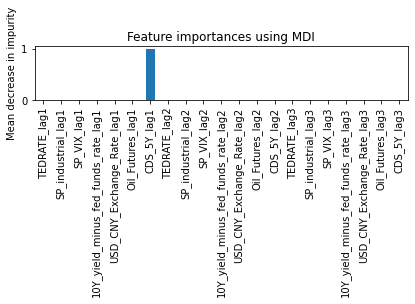

In [55]:
feature_names = ['TEDRATE_lag1','SP_industrial_lag1', 'SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2','TEDRATE_lag3','SP_industrial_lag3', 'SP_VIX_lag3','10Y_yield_minus_fed_funds_rate_lag3','USD_CNY_Exchange_Rate_lag3','Oil_Futures_lag3','CDS_5Y_lag3']

start_time = time.time()
importances = rf_model_m.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_m.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [56]:
forest_importances

TEDRATE_lag1                           0.000040
SP_industrial_lag1                     0.000273
SP_VIX_lag1                            0.000234
10Y_yield_minus_fed_funds_rate_lag1    0.000111
USD_CNY_Exchange_Rate_lag1             0.000048
Oil_Futures_lag1                       0.000534
CDS_5Y_lag1                            0.996918
TEDRATE_lag2                           0.000040
SP_industrial_lag2                     0.000052
SP_VIX_lag2                            0.000241
10Y_yield_minus_fed_funds_rate_lag2    0.000055
USD_CNY_Exchange_Rate_lag2             0.000042
Oil_Futures_lag2                       0.000056
CDS_5Y_lag2                            0.000448
TEDRATE_lag3                           0.000066
SP_industrial_lag3                     0.000037
SP_VIX_lag3                            0.000132
10Y_yield_minus_fed_funds_rate_lag3    0.000148
USD_CNY_Exchange_Rate_lag3             0.000119
Oil_Futures_lag3                       0.000076
CDS_5Y_lag3                            0

In [45]:
x_train_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_information_technology_lag1','SP_materials_lag1','SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2', 'SP_information_technology_lag2','SP_materials_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2']].corr()


,TEDRATE_lag1,SP_industrial_lag1,SP_information_technology_lag1,SP_materials_lag1,SP_VIX_lag1,10Y_yield_minus_fed_funds_rate_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_industrial_lag2,SP_information_technology_lag2,SP_materials_lag2,SP_VIX_lag2,10Y_yield_minus_fed_funds_rate_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
TEDRATE_lag1,1.000000,0.198613,0.267893,0.087809,0.094183,-0.519943,0.309563,-0.355067,0.192617,0.990987,0.198753,0.267900,0.087718,0.098262,-0.518623,0.308256,-0.356220,0.194043
SP_industrial_lag1,0.198613,1.000000,0.969840,0.970771,-0.680649,-0.551774,0.082809,-0.623187,-0.851210,0.199009,0.999342,0.969273,0.969684,-0.678148,-0.552579,0.081553,-0.623090,-0.849070
SP_information_technology_lag1,0.267893,0.969840,1.000000,0.925204,-0.614638,-0.634577,0.208975,-0.689967,-0.781811,0.268471,0.969509,0.999529,0.924609,-0.612939,-0.634779,0.208077,-0.689971,-0.780238
SP_materials_lag1,0.087809,0.970771,0.925204,1.000000,-0.725721,-0.469086,-0.018191,-0.481206,-0.869205,0.088132,0.969898,0.924306,0.998085,-0.722043,-0.470678,-0.018901,-0.481432,-0.866278
SP_VIX_lag1,0.094183,-0.680649,-0.614638,-0.725721,1.000000,0.273559,0.079542,0.160228,0.761159,0.089566,-0.675834,-0.610597,-0.717766,0.966550,0.280107,0.079542,0.162910,0.749862
10Y_yield_minus_fed_funds_rate_lag1,-0.519943,-0.551774,-0.634577,-0.469086,0.273559,1.000000,-0.031158,0.529208,0.185921,-0.520884,-0.552103,-0.634839,-0.469046,0.273497,0.996802,-0.030826,0.529358,0.184936
USD_CNY_Exchange_Rate_lag1,0.309563,0.082809,0.208975,-0.018191,0.079542,-0.031158,1.000000,-0.472877,-0.028833,0.309935,0.082597,0.208740,-0.018786,0.079722,-0.029358,0.999252,-0.474388,-0.029643
Oil_Futures_lag1,-0.355067,-0.623187,-0.689967,-0.481206,0.160228,0.529208,-0.472877,1.000000,0.454008,-0.353895,-0.623935,-0.690756,-0.482460,0.161918,0.527288,-0.470728,0.998334,0.455964
CDS_5Y_lag1,0.192617,-0.851210,-0.781811,-0.869205,0.761159,0.185921,-0.028833,0.454008,1.000000,0.191372,-0.851643,-0.782103,-0.870105,0.766364,0.186483,-0.028028,0.452656,0.998654
TEDRATE_lag2,0.990987,0.199009,0.268471,0.088132,0.089566,-0.520884,0.309935,-0.353895,0.191372,1.000000,0.199040,0.268315,0.088095,0.094225,-0.520300,0.308599,-0.355050,0.193079


#### До кризиса

Random RMSE: 2.437 Random MAPE: 0.020 Random MAE: 1.837


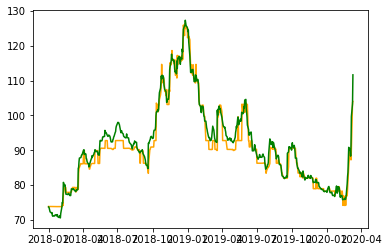

In [189]:
rf_model_m = RandomForestRegressor(
bootstrap = False,
  max_depth = 40,
  max_features = 'auto',
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 500
)
rf_model_m.fit(x_train_m.loc[:,set_m], y_train_m)

history_m=x_train_m.loc[:,set_m]
rf_m_pred=[]

for i in range(0,572):
    history_m=history_m.append(x_test_m.loc[:,set_m].loc[:,set_m].iloc[i])
    rf_m_pred.append(rf_model_m.predict(history_m)[-1])
    

rf_m_rmse_norm=metr.mean_squared_error(y_test_m.iloc[:572], rf_m_pred, squared=False)
rf_m_mape_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[:572], rf_m_pred)
rf_m_mae_norm = metr.mean_absolute_error(y_test_m.iloc[:572], rf_m_pred)

print('Random RMSE: %.3f' % rf_m_rmse_norm,'Random MAPE: %.3f' % rf_m_mape_norm,'Random MAE: %.3f' % rf_m_mae_norm)

plt.plot(data_m.iloc[2085:2657,0],rf_m_pred, color="orange")
plt.plot(data_m.iloc[2085:2657,0],y_test_m[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 4.087 Random MAPE: 0.030 Random MAE: 3.196


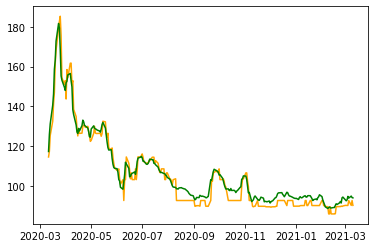

In [190]:
history_m=pd.concat([x_train_m.loc[:,set_m],x_test_m.loc[:,set_m].iloc[0:572]],axis=0)
rf_m_pred=[]

for i in range(572,833):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    rf_m_pred.append(rf_model_m.predict(history_m)[-1])

rf_m_rmse_cris=metr.mean_squared_error(y_test_m.iloc[572:], rf_m_pred, squared=False)
rf_m_mape_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], rf_m_pred)
rf_m_mae_cris = metr.mean_absolute_error(y_test_m.iloc[572:], rf_m_pred)

print('Random RMSE: %.3f' % rf_m_rmse_cris,'Random MAPE: %.3f' % rf_m_mape_cris,'Random MAE: %.3f' % rf_m_mae_cris)

plt.plot(data_m.iloc[2657:,0],rf_m_pred, color="orange")
plt.plot(data_m.iloc[2657:,0],y_test_m[572:],color="green")
plt.show()

### Banks

#### Исходные данные

In [194]:
param_grid = {'bootstrap': [True, False],
            'max_depth': [10,40,80,None],
            'max_features': ['auto', 'sqrt'],
            #'min_samples_leaf': [1, 2, 4, 10],
            #'min_samples_split': [2, 5, 10],
            'n_estimators': [8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_root_mean_squared_error')

In [195]:
grid_search.fit(x_train_b.loc[:,set_b],y_train_b)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1611),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 40, 80, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [8, 50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [196]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 100}

RMSE is  2.780605242652863


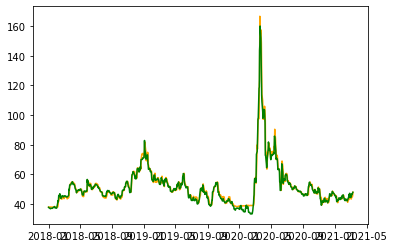

In [200]:
rf_bodel_b = RandomForestRegressor(bootstrap= True,
 random_state=1611,
 max_depth= 40,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
rf_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
rf_b_pred=[]

for i in range(0,len(x_test_b)):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    rf_b_pred.append(rf_bodel_b.predict(history_b)[-1])

rf_b_rmse=metr.mean_squared_error(y_test_b, rf_b_pred, squared=False)
print("RMSE is ",rf_b_rmse)
plt.plot(data_b.iloc[2085:,0],rf_b_pred, color="orange")
plt.plot(data_b.iloc[2085:,0],y_test_b,color="green")
plt.show()

#### До кризиса

Random RMSE: 2.394 Random MAPE: 0.036 Random MAE: 1.708


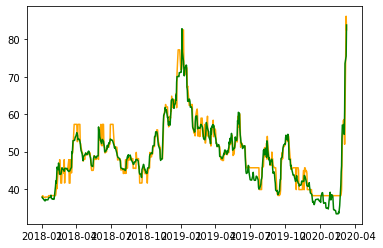

In [201]:
rf_bodel_b = RandomForestRegressor(bootstrap= False,
random_state=1611,
 max_depth= 40,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
rf_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
rf_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    rf_b_pred.append(rf_bodel_b.predict(history_b)[-1])
    

rf_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], rf_b_pred, squared=False)
rf_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], rf_b_pred)
rf_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], rf_b_pred)

print('Random RMSE: %.3f' % rf_b_rmse_norm,'Random MAPE: %.3f' % rf_b_mape_norm,'Random MAE: %.3f' % rf_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],rf_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 5.857 Random MAPE: 0.044 Random MAE: 2.954


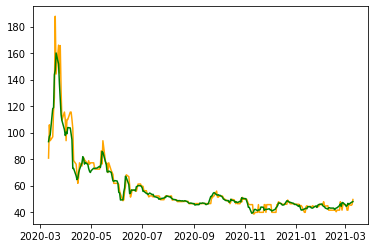

In [202]:
history_b=pd.concat([x_train_b.loc[:,set_b],x_test_b.loc[:,set_b].iloc[0:572]],axis=0)
rf_b_pred=[]

for i in range(572,833):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    rf_b_pred.append(rf_bodel_b.predict(history_b)[-1])

rf_b_rmse_cris=metr.mean_squared_error(y_test_b.iloc[572:], rf_b_pred, squared=False)
rf_b_mape_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], rf_b_pred)
rf_b_mae_cris = metr.mean_absolute_error(y_test_b.iloc[572:], rf_b_pred)

print('Random RMSE: %.3f' % rf_b_rmse_cris,'Random MAPE: %.3f' % rf_b_mape_cris,'Random MAE: %.3f' % rf_b_mae_cris)

plt.plot(data_b.iloc[2657:,0],rf_b_pred, color="orange")
plt.plot(data_b.iloc[2657:,0],y_test_b[572:],color="green")
plt.show()

### Finance

In [280]:
param_grid = {'bootstrap': [True, False],
            'max_depth': [10,40,80,None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4, 10],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring=scorer())
grid_search.fit(x_train_f.loc[:,set_f], y_train_f)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1611),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 40, 80, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [8, 50, 100, 200]},
             scoring=make_scorer(score, greater_is_better=False), verbose=2)

In [282]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

RMSE is  1.3541749884355685


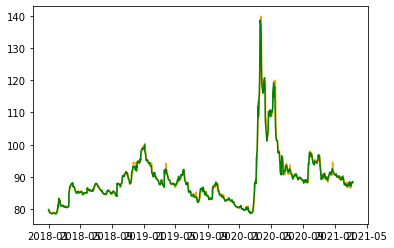

In [283]:
rf_fodel_f = RandomForestRegressor(bootstrap= True,
 max_depth= 10,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
rf_fodel_f.fit(x_train_f.loc[:,set_f], y_train_f)

history_f=x_train_f.loc[:,set_f]
rf_f_pred=[]

for i in range(0,len(x_test_f)):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    rf_f_pred.append(rf_fodel_f.predict(history_f)[-1])

rf_f_rmse=metr.mean_squared_error(y_test_f, rf_f_pred, squared=False)
print("RMSE is ",rf_f_rmse)
plt.plot(data_f.iloc[2085:,0],rf_f_pred, color="orange")
plt.plot(data_f.iloc[2085:,0],y_test_f,color="green")
plt.show()

In [ ]:
history_f=x_train_f.loc[:,set_f]
history_f_y=y_train_f
rf_f_pred=[]

for i in range(0,572):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    history_f_y=history_f_y.append(pd.Series(y_test_f.iloc[i]))
    rf_fodel_f = RandomForestRegressor(bootstrap= True,
                                       max_depth= 10,
                                       max_features= 'auto',
                                       min_samples_leaf= 1,
                                       min_samples_split= 2,
                                       n_estimators= 100)
    rf_fodel_f.fit(history_f, pd.Series(history_f_y))
    rf_f_pred.append(rf_fodel_f.predict(history_f.iloc[-1,:].values.reshape(1,-1)))
    print(i)
    
       
    
    
rf_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], rf_f_pred, squared=False)
rf_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572], rf_f_pred)
rf_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], rf_f_pred)

print('Random RMSE: %.3f' % rf_f_rmse_norm,'Random MAPE: %.3f' % rf_f_mape_norm,'Random MAE: %.3f' % rf_f_mae_norm)

plt.plot(data_f.iloc[2085:2657,0],rf_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
plt.show()

#### До кризиса

In [294]:
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[150:200], np.exp(rf_f_pred[150:200]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[150:200], np.exp(rf_f_pred[150:200]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[150:200], np.exp(rf_f_pred[150:200]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[150:200], y_test_f.shift(1).iloc[150:200], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)


Random RMSE: 0.605 Random MAPE: 0.003 Random MAE: 0.282 Random RMSE rw: 0.613


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

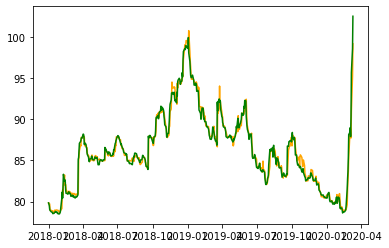

In [210]:
history_f=np.log(x_train_f).loc[:,set_f]
history_f_y=np.log(y_train_f)
rf_f_pred=[] #здесь
rf_fodel_f = RandomForestRegressor()
rf_fodel_f.fit(history_f, history_f_y)
for i in range(0,572):
    #rf_fodel_f.fit(history_f.iloc[-2085:,:], pd.Series(history_f_y.iloc[-2085:]))
    history_f=history_f.append(np.log(x_test_f).loc[:,set_f].iloc[i])
    #history_f_y=history_f_y.append(pd.Series(np.log(y_test_f).iloc[i]))
    rf_f_pred.append(rf_fodel_f.predict(history_f.iloc[-1,:].values.reshape(1,-1)))
    print(i)

rf_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], np.exp(rf_f_pred), squared=False)
rf_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572], np.exp(rf_f_pred))
rf_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], np.exp(rf_f_pred))
rw_f_rmse_norm = metr.mean_squared_error(y_test_f.iloc[1:572], y_test_f.shift(1).iloc[1:572], squared=False)

print('Random RMSE: %.3f' % rf_f_rmse_norm,'Random MAPE: %.3f' % rf_f_mape_norm,'Random MAE: %.3f' % rf_f_mae_norm,'Random RMSE rw: %.3f' % rw_f_rmse_norm)

plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
plt.show()

In [350]:
#2019
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[261:522], np.exp(rf_f_pred[261:522]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[261:522], np.exp(rf_f_pred[261:522]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[261:522], np.exp(rf_f_pred[261:522]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[261:522], y_test_f.shift(1).iloc[261:522], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

#plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
#plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
#plt.show()


Random RMSE: 0.738 Random MAPE: 0.005 Random MAE: 0.473 Random RMSE rw: 0.613


In [352]:
#2018
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[1:261], np.exp(rf_f_pred[1:261]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:261], np.exp(rf_f_pred[:261]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[:261], np.exp(rf_f_pred[:261]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[1:261], y_test_f.shift(1).iloc[1:261], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

#plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
#plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
#plt.show()


Random RMSE: 0.580 Random MAPE: 0.004 Random MAE: 0.327 Random RMSE rw: 0.556


In [353]:
#2020 до кризиса
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[522:572], np.exp(rf_f_pred[522:]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[522:572], np.exp(rf_f_pred[522:]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[522:572], np.exp(rf_f_pred[522:]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[522:572], y_test_f.shift(1).iloc[522:572], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

#plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
#plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
#plt.show()


Random RMSE: 1.177 Random MAPE: 0.007 Random MAE: 0.647 Random RMSE rw: 1.274


In [541]:
from xgboost import XGBRFRegressor
model=XGBRFRegressor(n_estimators=500)
#model.fit(pd.concat([x_train_m,x_test_m.iloc[:261]]),pd.concat([y_train_m,y_test_m.iloc[:261]]))
model.fit(np.log(x_train_m.loc[:,set_m]),np.log(y_train_m))
pred=model.predict(np.log(x_test_m.loc[:,set_m].iloc[1:572]))
print(metr.mean_squared_error(y_test_m.iloc[1:572], np.exp(pred), squared=False),
metr.mean_absolute_percentage_error(y_test_m.iloc[1:572], np.exp(pred)),metr.mean_absolute_error(y_test_m.iloc[1:572], np.exp(pred)))
print(metr.mean_squared_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572], squared=False),
metr.mean_absolute_percentage_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572]),
 metr.mean_absolute_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572])    )


5.709641146013413 0.04689388973163333 4.272741870942578
1.2972198235764216 0.00815805937398518 0.770024366100662


In [449]:
from xgboost import XGBRFRegressor
model=XGBRFRegressor(n_estimators=500)
#model.fit(pd.concat([x_train_m,x_test_m.iloc[:261]]),pd.concat([y_train_m,y_test_m.iloc[:261]]))
model.fit(x_train_m,y_train_m)
pred=model.predict(x_test_m.iloc[1:572])
print(metr.mean_squared_error(y_test_m.iloc[1:572], pred, squared=False),
metr.mean_absolute_percentage_error(y_test_m.iloc[1:572], pred),metr.mean_absolute_error(y_test_m.iloc[1:572], pred))
print(metr.mean_squared_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572], squared=False),
metr.mean_absolute_percentage_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572]),
 metr.mean_absolute_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572])    )


10.704686829913012 0.08755875812203773 8.414792023289884
1.2972198235764216 0.00815805937398518 0.770024366100662


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Random RMSE: 0.552 Random MAPE: 0.007 Random MAE: 0.520 Random RMSE rw: 0.143


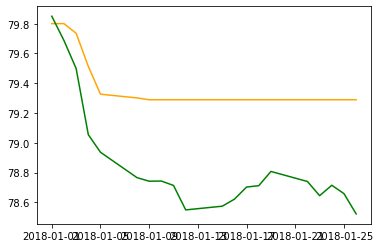

In [418]:
history_f=x_train_f.loc[]
history_f_y=y_train_f
rf_f_pred=[] #здесь
rf_fodel_f = RandomForestRegressor()
rf_fodel_f.fit(history_f, pd.Series(history_f_y))
for i in range(0,20):
    #rf_fodel_f.fit(history_f, pd.Series(history_f_y))
    history_f=history_f.append(x_test_f.iloc[i])
    history_f_y=history_f_y.append(pd.Series(y_test_f.iloc[i]))
    rf_f_pred.append(rf_fodel_f.predict(history_f.iloc[-1,:].values.reshape(1,-1)))
    print(i)

rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[:20], rf_f_pred, squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:20], rf_f_pred)
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[:20], rf_f_pred)
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[1:20], y_test_f.shift(1).iloc[1:20], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

plt.plot(data_f.iloc[2085:2105,0],rf_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2105,0],y_test_f[:20],color="green")
plt.show()

In [209]:
set_f = ['TEDRATE_lag1',
 'NASDAQ_Financial_100_lag1',
 'NASDAQ_real_estate_and_other_fanacial_services_lag1',
 'SP_500_lag1',
 'SP_energy_lag1',
 'SP_financial_lag1',
 'SP_health_care_lag1',
 'SP_real_estate_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'NASDAQ_Financial_100_lag2',
 'NASDAQ_real_estate_and_other_fanacial_services_lag2',
 'SP_500_lag2',
 'SP_energy_lag2',
 'SP_financial_lag2',
 'SP_health_care_lag2',
 'SP_real_estate_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'CDS_5Y_lag2']

In [208]:
history_f.iloc[:,:12]

,TEDRATE_lag1,NASDAQ_Financial_100_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_energy_lag1,SP_financial_lag1,SP_health_care_lag1,SP_real_estate_lag1,SP_VIX_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1
3,-1.660731,7.614287,8.224134,7.036272,6.109701,5.308267,5.905075,4.541552,2.987196,1.920944,4.421007,4.976078
4,-1.609438,7.627710,8.223045,7.040265,6.107468,5.328900,5.908780,4.553369,2.983660,1.920988,4.414736,4.961399
5,-1.609438,7.632212,8.227854,7.043142,6.112506,5.323440,5.911754,4.540298,2.936513,1.920959,4.415824,4.974590
6,-1.560648,7.627909,8.230202,7.044888,6.113651,5.323722,5.915866,4.545536,2.975530,1.920797,4.413041,4.950407
7,-1.609438,7.620367,8.223010,7.035462,6.099725,5.307655,5.909760,4.526704,2.998229,1.920900,4.391853,4.947369
...,...,...,...,...,...,...,...,...,...,...,...,...
2682,-0.020203,8.296100,8.994658,7.953691,5.550498,5.928567,7.031166,5.381008,3.642050,1.954020,3.001217,4.624544
2683,-0.010050,8.257095,8.969580,7.931414,5.502634,5.883947,7.025913,5.342159,3.718681,1.954742,2.989211,4.616523
2684,0.000000,8.252543,8.975858,7.937214,5.462101,5.866429,7.047650,5.336191,3.700808,1.956030,2.989211,4.625218
2685,-0.010050,8.294415,9.002233,7.963655,5.561340,5.920620,7.068113,5.367883,3.652215,1.956398,2.905260,4.631514


#### После кризиса

572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821


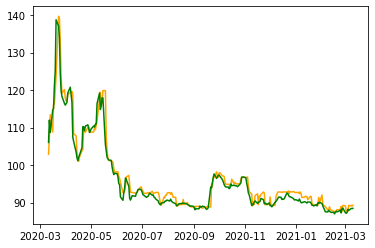

In [211]:
#до кризиса rw - 0.6, после - 
history_f=pd.concat([np.log(x_train_f).loc[:,set_f],np.log(x_test_f).loc[:,set_f].iloc[0:572]],axis=0)
history_f_y=pd.concat([np.log(y_train_f),np.log(y_test_f).iloc[0:572]],axis=0)
rf_f_pred=[]
rf_fodel_f = RandomForestRegressor()
rf_fodel_f.fit(history_f, pd.Series(history_f_y))
for i in range(572,833):
    #rf_fodel_f.fit(history_f, pd.Series(history_f_y))
    history_f=history_f.append(np.log(x_test_f).loc[:,set_f].iloc[i])
    #history_f_y=history_f_y.append(pd.Series(np.log(y_test_f).iloc[i]))
    rf_f_pred.append(rf_fodel_f.predict(history_f.iloc[-1,:].values.reshape(1,-1)))
    print(i)

rf_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], np.exp(rf_f_pred), squared=False)
rf_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], np.exp(rf_f_pred))
rf_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], np.exp(rf_f_pred))

print('Random RMSE: %.3f' % rf_f_rmse_cris,'Random MAPE: %.3f' % rf_f_mape_cris,'Random MAE: %.3f' % rf_f_mae_cris)

plt.plot(data_f.iloc[2657:,0],np.exp(rf_f_pred), color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()
#Random RMSE: 0.172 Random MAPE: 0.001 Random MAE: 0.118 Random RMSE rw: 0.143

In [379]:
#2020 кризис
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[572:784], np.exp(rf_f_pred[:212]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[572:784], np.exp(rf_f_pred[:212]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[572:784], np.exp(rf_f_pred[:212]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[572:784], y_test_f.shift(1).iloc[572:784], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

#plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
#plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
#plt.show()


Random RMSE: 2.326 Random MAPE: 0.011 Random MAE: 1.195 Random RMSE rw: 2.135


In [380]:
#2021
rf_f_1rmse_norm=metr.mean_squared_error(y_test_f.iloc[784:], np.exp(rf_f_pred[212:]), squared=False)
rf_f_1mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[784:], np.exp(rf_f_pred[212:]))
rf_f_1mae_norm = metr.mean_absolute_error(y_test_f.iloc[784:], np.exp(rf_f_pred[212:]))
rw_f_1rmse_norm = metr.mean_squared_error(y_test_f.iloc[784:], y_test_f.shift(1).iloc[784:], squared=False)

print('Random RMSE: %.3f' % rf_f_1rmse_norm,'Random MAPE: %.3f' % rf_f_1mape_norm,'Random MAE: %.3f' % rf_f_1mae_norm,'Random RMSE rw: %.3f' % rw_f_1rmse_norm)

#plt.plot(data_f.iloc[2085:2657,0],np.exp(rf_f_pred), color="orange")
#plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
#plt.show()


Random RMSE: 0.517 Random MAPE: 0.005 Random MAE: 0.433 Random RMSE rw: 0.438


In [376]:
data_f.iloc[2869:,0]

2869   2021-01-01
2870   2021-01-04
2871   2021-01-05
2872   2021-01-06
2873   2021-01-07
2874   2021-01-08
2875   2021-01-11
2876   2021-01-12
2877   2021-01-13
2878   2021-01-14
2879   2021-01-15
2880   2021-01-18
2881   2021-01-19
2882   2021-01-20
2883   2021-01-21
2884   2021-01-22
2885   2021-01-25
2886   2021-01-26
2887   2021-01-27
2888   2021-01-28
2889   2021-01-29
2890   2021-02-01
2891   2021-02-02
2892   2021-02-03
2893   2021-02-04
2894   2021-02-05
2895   2021-02-08
2896   2021-02-09
2897   2021-02-10
2898   2021-02-11
2899   2021-02-12
2900   2021-02-15
2901   2021-02-16
2902   2021-02-17
2903   2021-02-18
2904   2021-02-19
2905   2021-02-22
2906   2021-02-23
2907   2021-02-24
2908   2021-02-25
2909   2021-02-26
2910   2021-03-01
2911   2021-03-02
2912   2021-03-03
2913   2021-03-04
2914   2021-03-05
2915   2021-03-08
2916   2021-03-09
2917   2021-03-10
Name: Date, dtype: datetime64[ns]

### Energy

#### До кризиса

Random RMSE: 3.800 Random MAPE: 0.018 Random MAE: 1.338


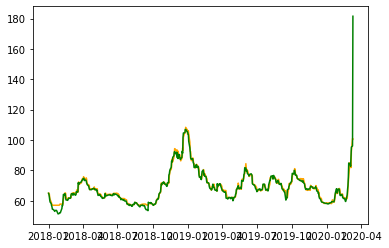

In [213]:
rf_eodel_e = RandomForestRegressor()
rf_eodel_e.fit(x_train_e.loc[:,set_e_mod], y_train_e)
history_e=x_train_e.loc[:,set_e_mod]
rf_e_pred=[]

for i in range(0,572):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    rf_e_pred.append(rf_eodel_e.predict(history_e)[-1])
    

rf_e_rmse_norm=metr.mean_squared_error(y_test_e.iloc[:572], rf_e_pred, squared=False)
rf_e_mape_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[:572], rf_e_pred)
rf_e_mae_norm = metr.mean_absolute_error(y_test_e.iloc[:572], rf_e_pred)

print('Random RMSE: %.3f' % rf_e_rmse_norm,'Random MAPE: %.3f' % rf_e_mape_norm,'Random MAE: %.3f' % rf_e_mae_norm)

plt.plot(data_e.iloc[2085:2657,0],rf_e_pred, color="orange")
plt.plot(data_e.iloc[2085:2657,0],y_test_e[:572],color="green")
plt.show()
#3.876609	1.050047	0.013485

In [606]:
x_test_e.loc[:,set_e].corr()

,TEDRATE_lag1,SP_500_lag1,SP_energy_lag1,SP_utilities_lag1,SP_VIX_lag1,10Y_yield_minus_fed_funds_rate_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_500_lag2,SP_energy_lag2,SP_utilities_lag2,SP_VIX_lag2,10Y_yield_minus_fed_funds_rate_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
TEDRATE_lag1,1.000000,-0.556262,0.062797,-0.400703,0.396956,0.175475,0.007303,-0.201037,0.570860,0.989609,-0.560143,0.059817,-0.402049,0.416884,0.175662,0.004458,-0.194024,0.584904
SP_500_lag1,-0.556262,1.000000,-0.554127,0.685804,0.008374,0.032770,-0.070322,-0.194273,-0.111887,-0.549788,0.993309,-0.559569,0.677468,0.013462,0.027912,-0.064190,-0.201082,-0.106767
SP_energy_lag1,0.062797,-0.554127,1.000000,-0.520886,-0.719151,0.141641,-0.309724,0.870414,-0.654113,0.066870,-0.556229,0.997481,-0.526590,-0.719462,0.147149,-0.314645,0.868948,-0.651632
SP_utilities_lag1,-0.400703,0.685804,-0.520886,1.000000,0.024645,-0.591471,0.466461,-0.338490,0.025606,-0.397270,0.682661,-0.520136,0.986619,0.023055,-0.593808,0.470485,-0.336024,0.022333
SP_VIX_lag1,0.396956,0.008374,-0.719151,0.024645,1.000000,0.056687,0.215968,-0.750109,0.880348,0.374715,0.028151,-0.708243,0.047933,0.962788,0.048098,0.212883,-0.737612,0.863935
10Y_yield_minus_fed_funds_rate_lag1,0.175475,0.032770,0.141641,-0.591471,0.056687,1.000000,-0.667466,0.205305,-0.061994,0.177564,0.029194,0.135955,-0.592738,0.066534,0.994339,-0.666814,0.200538,-0.050964
USD_CNY_Exchange_Rate_lag1,0.007303,-0.070322,-0.309724,0.466461,0.215968,-0.667466,1.000000,-0.438253,0.301750,0.008519,-0.070597,-0.305459,0.464989,0.217171,-0.667310,0.997377,-0.433079,0.300991
Oil_Futures_lag1,-0.201037,-0.194273,0.870414,-0.338490,-0.750109,0.205305,-0.438253,1.000000,-0.776846,-0.204878,-0.194359,0.867975,-0.345434,-0.753557,0.208286,-0.442809,0.975607,-0.776428
CDS_5Y_lag1,0.570860,-0.111887,-0.654113,0.025606,0.880348,-0.061994,0.301750,-0.776846,1.000000,0.556878,-0.111019,-0.654273,0.036458,0.890409,-0.072902,0.301261,-0.774505,0.989101
TEDRATE_lag2,0.989609,-0.549788,0.066870,-0.397270,0.374715,0.177564,0.008519,-0.204878,0.556878,1.000000,-0.555842,0.062611,-0.400224,0.397113,0.177651,0.006060,-0.200318,0.570614


#### После кризиса

In [609]:
param_grid = {'max_depth': [10,40,80,None],
            'max_features': ['auto', 'sqrt'],
            #'min_samples_leaf': [1, 2, 4, 10],
           # 'min_samples_split': [2, 5, 10],
            'n_estimators': [8,50,100,200]
}
# Create a based model
rf = RandomForestRegressor(random_state=1611,bootstrap=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(x_train_e.loc[:,set_e], y_train_e)
print(grid_search.best_params)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


NameError: name 'grid_seatch' is not defined

In [611]:
print(grid_search.best_params_)

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 8}


Random RMSE: 5.227 Random MAPE: 0.024 Random MAE: 2.837


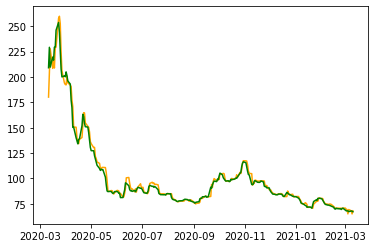

In [214]:
#rf_eodel_e = RandomForestRegressor(random_state=1611,bootstrap=True,max_depth=40,max_features='auto',n_estimators=500)
#rf_eodel_e.fit(x_train_e.loc[:,set_e], y_train_e)
history_e=pd.concat([x_train_e.loc[:,set_e_mod],x_test_e.loc[:,set_e_mod].iloc[0:572]],axis=0)
rf_e_pred=[]

for i in range(572,833):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    rf_e_pred.append(rf_eodel_e.predict(history_e)[-1])

rf_e_rmse_cris=metr.mean_squared_error(y_test_e.iloc[572:], rf_e_pred, squared=False)
rf_e_mape_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], rf_e_pred)
rf_e_mae_cris = metr.mean_absolute_error(y_test_e.iloc[572:], rf_e_pred)

print('Random RMSE: %.3f' % rf_e_rmse_cris,'Random MAPE: %.3f' % rf_e_mape_cris,'Random MAE: %.3f' % rf_e_mae_cris)

plt.plot(data_e.iloc[2657:,0],rf_e_pred, color="orange")
plt.plot(data_e.iloc[2657:,0],y_test_e[572:],color="green")
plt.show()
#4.510319	2.312523	0.018790

### Service

#### До кризиса

Random RMSE: 1.234 Random MAPE: 0.013 Random MAE: 0.804


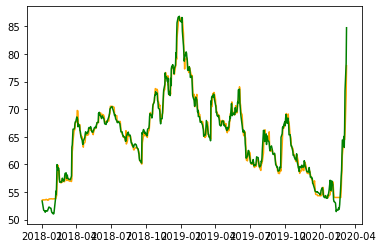

In [215]:
rf_sodel_s = RandomForestRegressor()
rf_sodel_s.fit(x_train_s.loc[:,set_s_mod], y_train_s)
history_s=x_train_s.loc[:,set_s_mod]
rf_s_pred=[]

for i in range(0,572):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    rf_s_pred.append(rf_sodel_s.predict(history_s)[-1])
    

rf_s_rmse_norm=metr.mean_squared_error(y_test_s.iloc[:572], rf_s_pred, squared=False)
rf_s_mape_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[:572], rf_s_pred)
rf_s_mae_norm = metr.mean_absolute_error(y_test_s.iloc[:572], rf_s_pred)

print('Random RMSE: %.3f' % rf_s_rmse_norm,'Random MAPE: %.3f' % rf_s_mape_norm,'Random MAE: %.3f' % rf_s_mae_norm)

plt.plot(data_s.iloc[2085:2657,0],rf_s_pred, color="orange")
plt.plot(data_s.iloc[2085:2657,0],y_test_s[:572],color="green")
plt.show()
#1.044774	0.613478	0.009252

#### После кризиса

Random RMSE: 2.602 Random MAPE: 0.017 Random MAE: 1.450


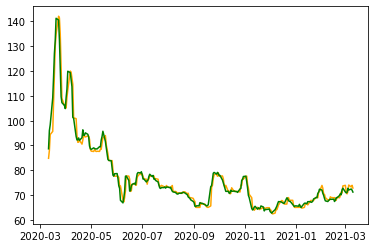

In [216]:
history_s=pd.concat([x_train_s.loc[:,set_s_mod],x_test_s.loc[:,set_s_mod].iloc[0:572]],axis=0)
rf_s_pred=[]

for i in range(572,833):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    rf_s_pred.append(rf_sodel_s.predict(history_s)[-1])

rf_s_rmse_cris=metr.mean_squared_error(y_test_s.iloc[572:], rf_s_pred, squared=False)
rf_s_mape_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], rf_s_pred)
rf_s_mae_cris = metr.mean_absolute_error(y_test_s.iloc[572:], rf_s_pred)

print('Random RMSE: %.3f' % rf_s_rmse_cris,'Random MAPE: %.3f' % rf_s_mape_cris,'Random MAE: %.3f' % rf_s_mae_cris)

plt.plot(data_s.iloc[2657:,0],rf_s_pred, color="orange")
plt.plot(data_s.iloc[2657:,0],y_test_s[572:],color="green")
plt.show()
#2.427074	1.309574	0.015230

## Boosting

### Manufacturing


In [221]:
xgb1 = XGBRegressor(random_state=1611)
parameters = {'nthread':[1,5], 
              'objective':['reg:linear'],
              'learning_rate': [.01,.05, .09],
              'max_depth': [7, 9],
              'min_child_weight': [1,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True,
                        scoring = 'neg_root_mean_squared_error')

xgb_grid.fit(x_train_m, y_train_m)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[01:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [222]:
xgb_m_model=XGBRegressor(
  radom_state=1611,
  colsample_bytre = 0.7, 
  learning_rate = 0.05,
  max_depth = 9,
  min_child_weight = 1,
  n_estimators = 1000,
  nthread = 1, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)
xgb_m_model.fit(x_train_m.loc[:,set_m], y_train_m)

[01:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[01:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytre", "radom_state", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytre=0.7, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             radom_state=1611, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, ...)

#### До кризиса

Random RMSE: 2.976 Random MAPE: 0.028 Random MAE: 2.518


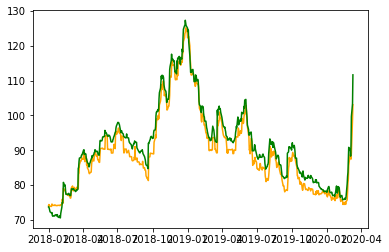

In [223]:
history_m=x_train_m.loc[:,set_m]
xgb_m_pred=[]

for i in range(0,572):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    xgb_m_pred.append(xgb_m_model.predict(history_m)[-1])
    

xgb_m_rmse_norm=metr.mean_squared_error(y_test_m.iloc[:572], xgb_m_pred, squared=False)
xgb_m_mape_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[:572], xgb_m_pred)
xgb_m_mae_norm = metr.mean_absolute_error(y_test_m.iloc[:572], xgb_m_pred)

print('Random RMSE: %.3f' % xgb_m_rmse_norm,'Random MAPE: %.3f' % xgb_m_mape_norm,'Random MAE: %.3f' % xgb_m_mae_norm)

plt.plot(data_m.iloc[2085:2657,0],xgb_m_pred, color="orange")
plt.plot(data_m.iloc[2085:2657,0],y_test_m[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 4.051 Random MAPE: 0.032 Random MAE: 3.388


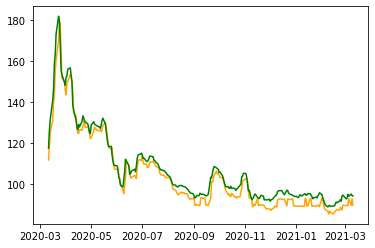

In [224]:
history_m=pd.concat([x_train_m.loc[:,set_m],x_test_m.loc[:,set_m].iloc[0:572]],axis=0)
xgb_m_pred=[]

for i in range(572,833):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    xgb_m_pred.append(xgb_m_model.predict(history_m)[-1])
    

xgb_m_rmse_cris=metr.mean_squared_error(y_test_m.iloc[572:], xgb_m_pred, squared=False)
xgb_m_mape_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], xgb_m_pred)
xgb_m_mae_cris = metr.mean_absolute_error(y_test_m.iloc[572:], xgb_m_pred)

print('Random RMSE: %.3f' % xgb_m_rmse_cris,'Random MAPE: %.3f' % xgb_m_mape_cris,'Random MAE: %.3f' % xgb_m_mae_cris)

plt.plot(data_m.iloc[2657:,0],xgb_m_pred, color="orange")
plt.plot(data_m.iloc[2657:,0],y_test_m[572:],color="green")
plt.show()

In [765]:
set_c

['TEDRATE_lag1',
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

### Consumer


In [767]:
xgb1 = XGBRegressor()
parameters = {'nthread':[1,3,5], 
              'objective':['reg:linear'],
              'learning_rate': [.01,.05, .09],
              'max_depth': [5,7, 9],
              'min_child_weight': [1,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train_c.loc[:,set_c], y_train_c)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[17:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.09, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [254]:
set_c_mod3=[
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',

 'Oil_Futures_lag1',
 'CDS_5Y_lag1',

 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',

 'Oil_Futures_lag2',
 'CDS_5Y_lag2',]

In [265]:
xgb_c_codel=XGBRegressor(colsample_bytre = 0.7, 
  learning_rate = 0.09,
  max_depth = 9,
  min_child_weight = 1,
  n_estimators = 1000,
  nthread = 1, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7,
  random_state=98)
xgb_c_codel.fit(x_train_c.loc[:,set_c_mod3], y_train_c)

[02:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytre=0.7, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.09, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=98, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

In [542]:
xgb_c_codel_rf=XGBRFRegressor(
  n_estimators = 1000,
  nthread = 1, 
  random_state=98)
xgb_c_codel_rf.fit(x_train_c.loc[:,set_c_mod3], y_train_c)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=1000, n_jobs=1,
               nthread=1, num_parallel_tree=1000, objective='reg:squarederror',
               predictor='auto', random_state=98, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

#### До кризиса

Random RMSE: 1.407 Random MAPE: 0.019 Random MAE: 1.049


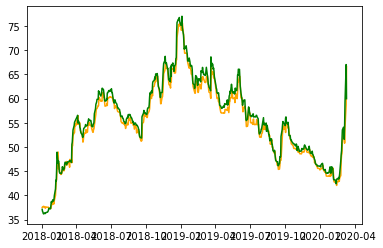

In [261]:
history_c=x_train_c.loc[:,set_c_mod3]
xgb_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    xgb_c_pred.append(xgb_c_codel.predict(history_c)[-1])
    

xgb_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], xgb_c_pred, squared=False)
xgb_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], xgb_c_pred)
xgb_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], xgb_c_pred)

print('Random RMSE: %.3f' % xgb_c_rmse_norm,'Random MAPE: %.3f' % xgb_c_mape_norm,'Random MAE: %.3f' % xgb_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],xgb_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()

Random RMSE: 1.150 Random MAPE: 0.014 Random MAE: 0.761


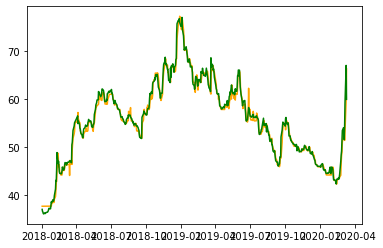

In [543]:
history_c=x_train_c.loc[:,set_c_mod3]
xgb_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    xgb_c_pred.append(xgb_c_codel_rf.predict(history_c)[-1])
    

xgb_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], xgb_c_pred, squared=False)
xgb_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], xgb_c_pred)
xgb_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], xgb_c_pred)

print('Random RMSE: %.3f' % xgb_c_rmse_norm,'Random MAPE: %.3f' % xgb_c_mape_norm,'Random MAE: %.3f' % xgb_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],xgb_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()

In [243]:
set_c_c=['TEDRATE_lag1',
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

#### После кризиса

Random RMSE: 1.22937 Random MAPE: 0.015 Random MAE: 0.730


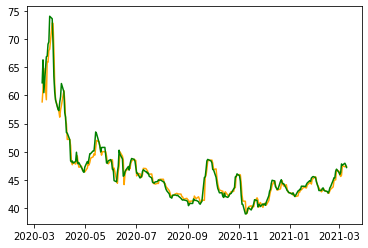

In [266]:
history_c=pd.concat([x_train_c.loc[:,set_c_mod3],x_test_c.loc[:,set_c_mod3].iloc[0:572]],axis=0)
xgb_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    xgb_c_pred.append(xgb_c_codel.predict(history_c)[-1])
    

xgb_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], xgb_c_pred, squared=False)
xgb_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], xgb_c_pred)
xgb_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], xgb_c_pred)

print('Random RMSE: %.5f' % xgb_c_rmse_cris,'Random MAPE: %.3f' % xgb_c_mape_cris,'Random MAE: %.3f' % xgb_c_mae_cris)

plt.plot(data_c.iloc[2657:,0],xgb_c_pred, color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()
#1.192099	0.688487	0.013830

Random RMSE: 1.21813 Random MAPE: 0.015 Random MAE: 0.742


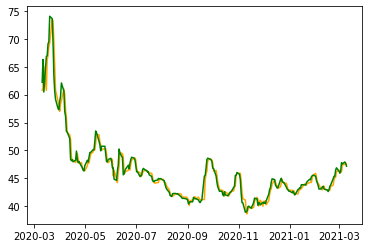

In [544]:
history_c=pd.concat([x_train_c.loc[:,set_c_mod3],x_test_c.loc[:,set_c_mod3].iloc[0:572]],axis=0)
xgb_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    xgb_c_pred.append(xgb_c_codel_rf.predict(history_c)[-1])
    

xgb_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], xgb_c_pred, squared=False)
xgb_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], xgb_c_pred)
xgb_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], xgb_c_pred)

print('Random RMSE: %.5f' % xgb_c_rmse_cris,'Random MAPE: %.3f' % xgb_c_mape_cris,'Random MAE: %.3f' % xgb_c_mae_cris)

plt.plot(data_c.iloc[2657:,0],xgb_c_pred, color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()
#1.192099	0.688487	0.013830

### Banks


In [250]:
xgb1 = XGBRegressor()
parameters = {'nthread':[5], 
              'objective':['reg:linear'],
              'learning_rate': [.01, .09],
              'max_depth': [7, 9],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train_b, y_train_b)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[16:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 5, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [267]:
xgb_b_bodel=XGBRegressor(colsample_bytre = 0.7, 
  learning_rate = 0.01,
  max_depth = 9,
  min_child_weight = 4,
  n_estimators = 1000,
  nthread = 5, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)
xgb_b_bodel.fit(x_train_b.loc[:,set_b], y_train_b)

[02:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[02:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytre=0.7, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=5, nthread=5,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

#### До кризиса

Random RMSE: 1.977 Random MAPE: 0.030 Random MAE: 1.390


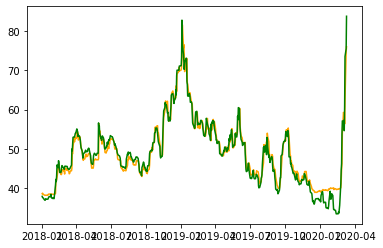

In [268]:
history_b=x_train_b.loc[:,set_b]
xgb_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    xgb_b_pred.append(xgb_b_bodel.predict(history_b)[-1])
    

xgb_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], xgb_b_pred, squared=False)
xgb_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], xgb_b_pred)
xgb_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], xgb_b_pred)

print('Random RMSE: %.3f' % xgb_b_rmse_norm,'Random MAPE: %.3f' % xgb_b_mape_norm,'Random MAE: %.3f' % xgb_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],xgb_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()
#1.516456	0.875204	0.017116

#### После кризиса

Random RMSE: 3.565 Random MAPE: 0.028 Random MAE: 1.851


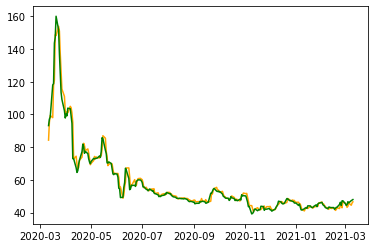

In [270]:
history_b=pd.concat([x_train_b.loc[:,set_b],x_test_b.loc[:,set_b].iloc[0:572]],axis=0)
xgb_b_pred=[]

for i in range(572,833):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    xgb_b_pred.append(xgb_b_bodel.predict(history_b)[-1])

xgb_b_rmse_cris=metr.mean_squared_error(y_test_b.iloc[572:], xgb_b_pred, squared=False)
xgb_b_mape_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], xgb_b_pred)
xgb_b_mae_cris = metr.mean_absolute_error(y_test_b.iloc[572:], xgb_b_pred)

print('Random RMSE: %.3f' % xgb_b_rmse_cris,'Random MAPE: %.3f' % xgb_b_mape_cris,'Random MAE: %.3f' % xgb_b_mae_cris)

plt.plot(data_b.iloc[2657:,0],xgb_b_pred, color="orange")
plt.plot(data_b.iloc[2657:,0],y_test_b[572:],color="green")
plt.show()

### Financial

In [470]:
set_f_mod=['TEDRATE_lag1',
 'NASDAQ_Financial_100_lag1',
 'NASDAQ_real_estate_and_other_fanacial_services_lag1',
 'SP_500_lag1',
 'SP_energy_lag1',
 'SP_health_care_lag1',
 'SP_real_estate_lag1',
 'TEDRATE_lag2',
 'NASDAQ_Financial_100_lag2',
 'NASDAQ_real_estate_and_other_fanacial_services_lag2',
 'SP_500_lag2',
 'SP_energy_lag2',
 'SP_health_care_lag2',
 'SP_real_estate_lag2',
 'CDS_5Y_lag1',
 'CDS_5Y_lag2'
]

In [479]:
xgb1 = XGBRegressor(random_state=77)
parameters = {'nthread':[1,3,5], 
              'objective':['reg:linear'],
              'learning_rate': [.01,.05, .09],
              'max_depth': [7, 9],
              'min_child_weight': [1,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_fytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True,
                       scoring='neg_root_mean_squared_error')

xgb_grid.fit(x_train_f.loc[:,set_f_mod], y_train_f)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[15:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_fytree", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_fytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [480]:
xgb_f_fodel=XGBRegressor(colsample_fytre = 0.7, 
  learning_rate = 0.05,
  max_depth = 9,
  min_child_weight = 1,
  n_estimators = 1000,
  nthread = 1, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7,
                        random_state=77)
xgb_f_fodel.fit(x_train_f.loc[:,set_f_mod], y_train_f)

[15:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_fytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_fytre=0.7,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=77, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

In [472]:
xgb_f_fodel_m=XGBRegressor(colsample_fytre = 0.7, 
  learning_rate = 0.01,
  max_depth = 9,
  min_child_weight = 4,
  n_estimators = 1000,
  nthread = 5, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)
xgb_f_fodel_m.fit(np.log(x_train_f).loc[:,set_f_mod], np.log(y_train_f))

[13:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_fytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_fytre=0.7,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=5, nthread=5,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

#### До кризиса

Random RMSE: 0.738 Random MAPE: 0.005 Random MAE: 0.438


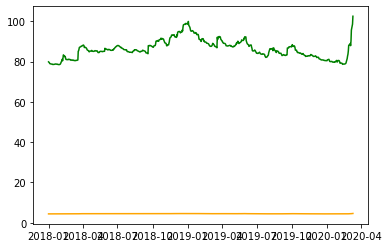

In [473]:
history_f=np.log(x_train_f).loc[:,set_f_mod]
xgb_f_pred=[]

for i in range(0,572):
    history_f=history_f.append(np.log(x_test_f).loc[:,set_f_mod].iloc[i])
    xgb_f_pred.append(xgb_f_fodel_m.predict(history_f)[-1])
    

xgb_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], np.exp(xgb_f_pred), squared=False)
xgb_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572], np.exp(xgb_f_pred))
xgb_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], np.exp(xgb_f_pred))

print('Random RMSE: %.3f' % xgb_f_rmse_norm,'Random MAPE: %.3f' % xgb_f_mape_norm,'Random MAE: %.3f' % xgb_f_mae_norm)

plt.plot(data_f.iloc[2085:2657,0],xgb_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
plt.show()
#0.674235	0.357771	0.004069

#### После кризиса

Random RMSE: 1.985 Random MAPE: 0.00964 Random MAE: 0.993


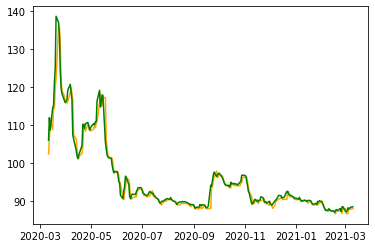

In [481]:
history_f=pd.concat([x_train_f.loc[:,set_f_mod],x_test_f.loc[:,set_f_mod].iloc[0:572]],axis=0)
xgb_f_pred=[]

for i in range(572,833):
    history_f=history_f.append(x_test_f.loc[:,set_f_mod].iloc[i])
    xgb_f_pred.append(xgb_f_fodel.predict(history_f)[-1])
    
xgb_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], xgb_f_pred, squared=False)
xgb_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], xgb_f_pred)
xgb_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], xgb_f_pred)

print('Random RMSE: %.3f' % xgb_f_rmse_cris,'Random MAPE: %.5f' % xgb_f_mape_cris,'Random MAE: %.3f' % xgb_f_mae_cris)


plt.plot(data_f.iloc[2657:,0],xgb_f_pred, color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()
#1.933258	0.917252	0.008790

Random RMSE: 1.961 Random MAPE: 0.00910 Random MAE: 0.947


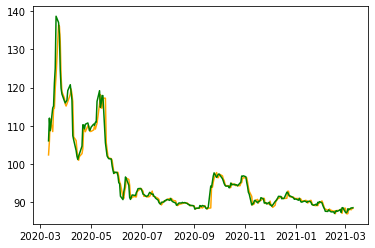

In [475]:
history_f=pd.concat([np.log(x_train_f).loc[:,set_f_mod],np.log(x_test_f).loc[:,set_f_mod].iloc[0:572]],axis=0)
xgb_f_pred=[]

for i in range(572,833):
    history_f=history_f.append(np.log(x_test_f).loc[:,set_f_mod].iloc[i])
    xgb_f_pred.append(xgb_f_fodel_m.predict(history_f)[-1])
    
xgb_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], np.exp(xgb_f_pred), squared=False)
xgb_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], np.exp(xgb_f_pred))
xgb_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], np.exp(xgb_f_pred))

print('Random RMSE: %.3f' % xgb_f_rmse_cris,'Random MAPE: %.5f' % xgb_f_mape_cris,'Random MAE: %.3f' % xgb_f_mae_cris)


plt.plot(data_f.iloc[2657:,0],np.exp(xgb_f_pred), color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()
#1.933258	0.917252	0.008790

### Energy

In [294]:
xgb1 = XGBRegressor()
parameters = {'nthread':[1,5], 
              'objective':['reg:linear'],
              'learning_rate': [.01, .05,.09],
              'max_depth': [7, 9,12],
              'min_child_weight': [1,4,8],
              'silent': [1],
              'subsample': [0.7],
              'colsample_eytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1, verbose = 2,
                       scoring='neg_root_mean_squared_error')

xgb_grid.fit(x_train_e.loc[:,set_e_mod], y_train_e)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[03:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_eytree", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_eytree': 0.7, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 1, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [318]:
xgb_e_eodel=XGBRegressor(colsample_eytre = 0.7, 
  learning_rate = 0.01,
  max_depth = 9,
  min_child_weight = 4,
  n_estimators = 1000,
  nthread = 1, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)
xgb_e_eodel.fit(x_train_e.loc[:,set_e_mod], y_train_e)

[04:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:17:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_eytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_eytre=0.7,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

#### До кризиса

Random RMSE: 3.812 Random MAPE: 0.020 Random MAE: 1.435


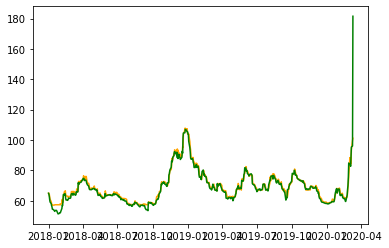

In [319]:
history_e=x_train_e.loc[:,set_e_mod]
xgb_e_pred=[]

for i in range(0,572):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    xgb_e_pred.append(xgb_e_eodel.predict(history_e)[-1])
    

xgb_e_rmse_norm=metr.mean_squared_error(y_test_e.iloc[:572], xgb_e_pred, squared=False)
xgb_e_mape_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[:572], xgb_e_pred)
xgb_e_mae_norm = metr.mean_absolute_error(y_test_e.iloc[:572], xgb_e_pred)

print('Random RMSE: %.3f' % xgb_e_rmse_norm,'Random MAPE: %.3f' % xgb_e_mape_norm,'Random MAE: %.3f' % xgb_e_mae_norm)

plt.plot(data_e.iloc[2085:2657,0],xgb_e_pred, color="orange")
plt.plot(data_e.iloc[2085:2657,0],y_test_e[:572],color="green")
plt.show()
#	3.876609	1.050047	0.013485
#Random RMSE: 3.869 Random MAPE: 0.021 Random MAE: 1.485

In [317]:
set_e_mod=[
    'TEDRATE_lag1',
 'SP_500_lag1',
 #'SP_energy_lag1',
 'SP_utilities_lag1',
 'SP_VIX_lag1',
 #'10Y_yield_minus_fed_funds_rate_lag1',
 #'USD_CNY_Exchange_Rate_lag1',
 #'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_500_lag2',
 #'SP_energy_lag2',
 'SP_utilities_lag2',
 'SP_VIX_lag2',
 #'10Y_yield_minus_fed_funds_rate_lag2',
 #'USD_CNY_Exchange_Rate_lag2',
 #'Oil_Futures_lag2',
 'CDS_5Y_lag2'
]

In [308]:
x_test_e.loc[:,set_e_mod].corr()

,TEDRATE_lag1,SP_500_lag1,SP_utilities_lag1,SP_VIX_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_500_lag2,SP_utilities_lag2,SP_VIX_lag2,Oil_Futures_lag2,CDS_5Y_lag2
TEDRATE_lag1,1.000000,-0.556262,-0.400703,0.396956,-0.201037,0.570860,0.989609,-0.560143,-0.402049,0.416884,-0.194024,0.584904
SP_500_lag1,-0.556262,1.000000,0.685804,0.008374,-0.194273,-0.111887,-0.549788,0.993309,0.677468,0.013462,-0.201082,-0.106767
SP_utilities_lag1,-0.400703,0.685804,1.000000,0.024645,-0.338490,0.025606,-0.397270,0.682661,0.986619,0.023055,-0.336024,0.022333
SP_VIX_lag1,0.396956,0.008374,0.024645,1.000000,-0.750109,0.880348,0.374715,0.028151,0.047933,0.962788,-0.737612,0.863935
Oil_Futures_lag1,-0.201037,-0.194273,-0.338490,-0.750109,1.000000,-0.776846,-0.204878,-0.194359,-0.345434,-0.753557,0.975607,-0.776428
CDS_5Y_lag1,0.570860,-0.111887,0.025606,0.880348,-0.776846,1.000000,0.556878,-0.111019,0.036458,0.890409,-0.774505,0.989101
TEDRATE_lag2,0.989609,-0.549788,-0.397270,0.374715,-0.204878,0.556878,1.000000,-0.555842,-0.400224,0.397113,-0.200318,0.570614
SP_500_lag2,-0.560143,0.993309,0.682661,0.028151,-0.194359,-0.111019,-0.555842,1.000000,0.687013,0.008558,-0.197795,-0.110506
SP_utilities_lag2,-0.402049,0.677468,0.986619,0.047933,-0.345434,0.036458,-0.400224,0.687013,1.000000,0.025597,-0.339567,0.026460
SP_VIX_lag2,0.416884,0.013462,0.023055,0.962788,-0.753557,0.890409,0.397113,0.008558,0.025597,1.000000,-0.750735,0.880559


#### После кризиса

Random RMSE: 4.870 Random MAPE: 0.028 Random MAE: 3.072


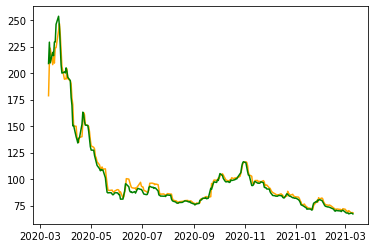

In [320]:
history_e=pd.concat([x_train_e.loc[:,set_e_mod],x_test_e.loc[:,set_e_mod].iloc[0:572]],axis=0)
xgb_e_pred=[]

for i in range(572,833):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    xgb_e_pred.append(xgb_e_eodel.predict(history_e)[-1])
    

xgb_e_rmse_cris=metr.mean_squared_error(y_test_e.iloc[572:], xgb_e_pred, squared=False)
xgb_e_mape_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], xgb_e_pred)
xgb_e_mae_cris = metr.mean_absolute_error(y_test_e.iloc[572:], xgb_e_pred)

print('Random RMSE: %.3f' % xgb_e_rmse_cris,'Random MAPE: %.3f' % xgb_e_mape_cris,'Random MAE: %.3f' % xgb_e_mae_cris)

plt.plot(data_e.iloc[2657:,0],xgb_e_pred, color="orange")
plt.plot(data_e.iloc[2657:,0],y_test_e[572:],color="green")
plt.show()
#	4.510319	2.312523	0.018790
# 

### Service

In [325]:
xgb1 = XGBRegressor(random_state=1611)
parameters = {'nthread':[5], 
              'objective':['reg:linear'],
              'learning_rate': [.01,.05, .09],
              'max_depth': [7, 9],
              'min_child_weight': [1,4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_sytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train_s.loc[:,set_s], y_train_s)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[04:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_sytree", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'colsample_sytree': 0.7, 'learning_rate': 0.09, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 1000, 'nthread': 5, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [326]:
xgb_s_sodel=XGBRegressor(random_state=1611,
    colsample_sytre = 0.7, 
  learning_rate = 0.09,
  max_depth = 9,
  min_child_weight = 1,
  n_estimators = 1000,
  nthread = 5, 
  objective = 'reg:linear',
  silent = 1, 
  subsample = 0.7)
xgb_s_sodel.fit(x_train_s.loc[:,set_s_mod], y_train_s)

[04:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_sytre", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_sytre=0.7,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.09, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=5, nthread=5,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=1611, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact', ...)

#### До кризиса

Random RMSE: 1.406 Random MAPE: 0.015 Random MAE: 0.963


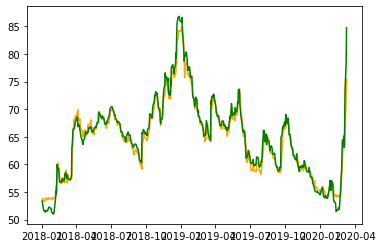

In [327]:
history_s=x_train_s.loc[:,set_s_mod]
xgb_s_pred=[]

for i in range(0,572):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    xgb_s_pred.append(xgb_s_sodel.predict(history_s)[-1])
    

xgb_s_rmse_norm=metr.mean_squared_error(y_test_s.iloc[:572], xgb_s_pred, squared=False)
xgb_s_mape_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[:572], xgb_s_pred)
xgb_s_mae_norm = metr.mean_absolute_error(y_test_s.iloc[:572], xgb_s_pred)

print('Random RMSE: %.3f' % xgb_s_rmse_norm,'Random MAPE: %.3f' % xgb_s_mape_norm,'Random MAE: %.3f' % xgb_s_mae_norm)

plt.plot(data_s.iloc[2085:2657,0],xgb_s_pred, color="orange")
plt.plot(data_s.iloc[2085:2657,0],y_test_s[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 2.719 Random MAPE: 0.021 Random MAE: 1.739


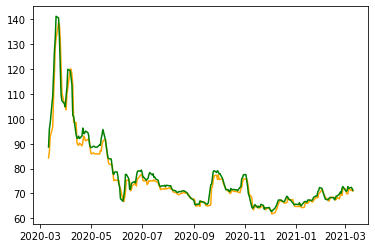

In [328]:
history_s=pd.concat([x_train_s.loc[:,set_s_mod],x_test_s.loc[:,set_s_mod].iloc[0:572]],axis=0)
xgb_s_pred=[]

for i in range(572,833):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    xgb_s_pred.append(xgb_s_sodel.predict(history_s)[-1])
    

xgb_s_rmse_cris=metr.mean_squared_error(y_test_s.iloc[572:], xgb_s_pred, squared=False)
xgb_s_mape_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], xgb_s_pred)
xgb_s_mae_cris = metr.mean_absolute_error(y_test_s.iloc[572:], xgb_s_pred)

print('Random RMSE: %.3f' % xgb_s_rmse_cris,'Random MAPE: %.3f' % xgb_s_mape_cris,'Random MAE: %.3f' % xgb_s_mae_cris)

plt.plot(data_s.iloc[2657:,0],xgb_s_pred, color="orange")
plt.plot(data_s.iloc[2657:,0],y_test_s[572:],color="green")
plt.show()

### Bagging

#### Manufacturing

#### До кризиса

Random RMSE: 4.222 Random MAPE: 0.034 Random MAE: 3.121


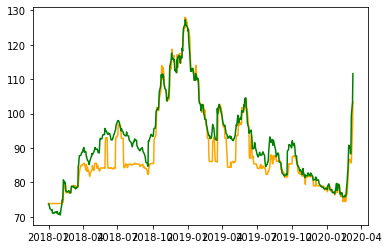

In [337]:
bag_model_m = BaggingRegressor()
bag_model_m.fit(x_train_m.loc[:,set_m], y_train_m)

history_m=x_train_m.loc[:,set_m]
bag_m_pred=[]

for i in range(0,572):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    bag_m_pred.append(bag_model_m.predict(history_m)[-1])
    

bag_m_rmse_norm=metr.mean_squared_error(y_test_m.iloc[:572], bag_m_pred, squared=False)
bag_m_mape_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[:572], bag_m_pred)
bag_m_mae_norm = metr.mean_absolute_error(y_test_m.iloc[:572], bag_m_pred)

print('Random RMSE: %.3f' % bag_m_rmse_norm,'Random MAPE: %.3f' % bag_m_mape_norm,'Random MAE: %.3f' % bag_m_mae_norm)

plt.plot(data_m.iloc[2085:2657,0],bag_m_pred, color="orange")
plt.plot(data_m.iloc[2085:2657,0],y_test_m[:572],color="green")
plt.show()

In [634]:
!pip install lightgbm

In [636]:
set_m

['TEDRATE_lag1',
 'SP_industrial_lag1',
 'SP_information_technology_lag1',
 'SP_materials_lag1',
 'SP_VIX_lag1',
 '10Y_yield_minus_fed_funds_rate_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_industrial_lag2',
 'SP_information_technology_lag2',
 'SP_materials_lag2',
 'SP_VIX_lag2',
 '10Y_yield_minus_fed_funds_rate_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [450]:
set_c_mod

['SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [458]:
params = {
    'num_leaves': [7, 14,31, 50],
    'learning_rate': [0.1, 0.03],
    'max_depth': [-1,3, 5],
    'n_estimators': [500,1000],
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='neg_root_mean_squared_error', cv=3,n_jobs = -1, verbose = 2)
grid.fit(x_train_c.loc[:,set_c_orig], y_train_c)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.03], 'max_depth': [-1, 3, 5],
                         'n_estimators': [500, 1000],
                         'num_leaves': [7, 14, 31, 50]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [459]:
grid.best_params_

{'learning_rate': 0.03, 'max_depth': -1, 'n_estimators': 1000, 'num_leaves': 7}

In [461]:
params = {
    'num_leaves': 85,
    'min_data_in_leaf': 1,
    'min_child_samples':20,
    'objective': 'regression',
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "feature_fraction": 0.9,
    "bagging_freq": 0,
    "bagging_fraction": 0.6,
    "bagging_seed": 23,
    "metric": 'rmse',
    "lambda_l1": 0.2,
    "nthread": 4,
}

In [467]:
import lightgbm as lgb
bag_codel_c = lgb.LGBMRegressor(random_state=0,num_leaves= 5,
    min_data_in_leaf= 1,
    min_child_samples=20,
    objective= 'regression',
    learning_rate= 0.01,
    boosting= 'gbdt',
    bagging_seed= 23,
    metric= 'rmse',
    lambda_l1= 0.2,
    nthread= 4
)
bag_codel_c.fit(x_train_c.loc[:,set_c_orig], y_train_c)

history_c=x_train_c.loc[:,set_c_orig]
bag_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_orig].iloc[i])
    bag_c_pred.append(bag_codel_c.predict(history_c)[-1])
    

bag_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[572:], bag_c_pred, squared=False)
print("RMSE is ",bag_c_rmse_norm)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
RMSE is  5.226374318487408


RMSE is  1.107898994743725


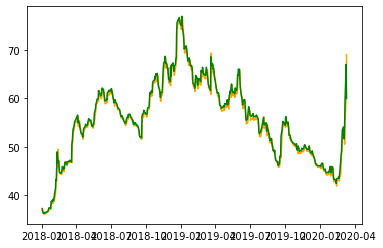

In [733]:
bag_codel_c = LinearRegression()
bag_codel_c.fit(x_train_c.loc[:,set_c], y_train_c)

history_c=x_train_c.loc[:,set_c]
bag_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c].iloc[i])
    bag_c_pred.append(bag_codel_c.predict(history_c)[-1])
    

bag_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], bag_c_pred, squared=False)
print("RMSE is ",bag_c_rmse_norm)
plt.plot(data_c.iloc[2085:2657,0],bag_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 5.718 Random MAPE: 0.043 Random MAE: 4.318


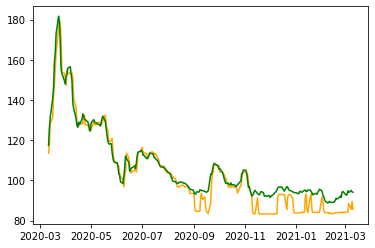

In [339]:
history_m=pd.concat([x_train_m.loc[:,set_m],x_test_m.loc[:,set_m].iloc[0:572]],axis=0)
bag_m_pred=[]

for i in range(572,833):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    bag_m_pred.append(bag_model_m.predict(history_m)[-1])

bag_m_rmse_cris=metr.mean_squared_error(y_test_m.iloc[572:], bag_m_pred, squared=False)
bag_m_mape_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], bag_m_pred)
bag_m_mae_cris = metr.mean_absolute_error(y_test_m.iloc[572:], bag_m_pred)

print('Random RMSE: %.3f' % bag_m_rmse_cris,'Random MAPE: %.3f' % bag_m_mape_cris,'Random MAE: %.3f' % bag_m_mae_cris)


plt.plot(data_m.iloc[2657:,0],bag_m_pred, color="orange")
plt.plot(data_m.iloc[2657:,0],y_test_m[572:],color="green")
plt.show()


#### Consumer

#### До кризиса

Random RMSE: 1.089 Random MAPE: 0.013 Random MAE: 0.710


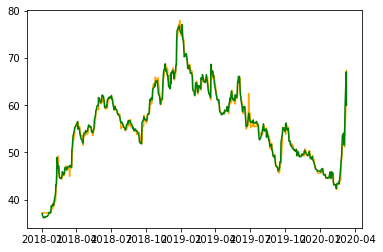

In [336]:
bag_codel_c = BaggingRegressor()
bag_codel_c.fit(x_train_c.loc[:,set_c_mod], y_train_c)

history_c=x_train_c.loc[:,set_c_mod]
bag_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod].iloc[i])
    bag_c_pred.append(bag_codel_c.predict(history_c)[-1])
    
bag_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], bag_c_pred, squared=False)
bag_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], bag_c_pred)
bag_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], bag_c_pred)

print('Random RMSE: %.3f' % bag_c_rmse_norm,'Random MAPE: %.3f' % bag_c_mape_norm,'Random MAE: %.3f' % bag_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],bag_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()


#### После кризиса

Random RMSE: 1.253 Random MAPE: 0.016 Random MAE: 0.787


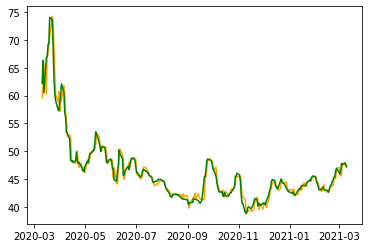

In [335]:
history_c=pd.concat([x_train_c.loc[:,set_c_mod],x_test_c.loc[:,set_c_mod].iloc[0:572]],axis=0)
bag_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod].iloc[i])
    bag_c_pred.append(bag_codel_c.predict(history_c)[-1])

bag_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], bag_c_pred, squared=False)
bag_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], bag_c_pred)
bag_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], bag_c_pred)

print('Random RMSE: %.3f' % bag_c_rmse_cris,'Random MAPE: %.3f' % bag_c_mape_cris,'Random MAE: %.3f' % bag_c_mae_cris)

plt.plot(data_c.iloc[2657:,0],bag_c_pred, color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()


### Banks

#### До кризиса

Random RMSE: 1.924 Random MAPE: 0.029 Random MAE: 1.361


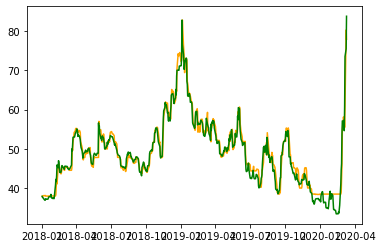

In [522]:
bag_bodel_b = BaggingRegressor()
bag_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
bag_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    bag_b_pred.append(bag_bodel_b.predict(history_b)[-1])
    

bag_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], bag_b_pred, squared=False)
bag_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], bag_b_pred)
bag_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], bag_b_pred)

print('Random RMSE: %.3f' % bag_b_rmse_norm,'Random MAPE: %.3f' % bag_b_mape_norm,'Random MAE: %.3f' % bag_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],bag_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()


Random RMSE: 2.995 Random MAPE: 0.050 Random MAE: 2.213


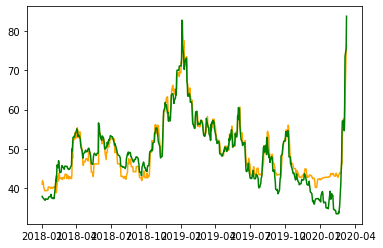

In [483]:
bag_bodel_b = lgb.LGBMRegressor()
bag_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
bag_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    bag_b_pred.append(bag_bodel_b.predict(history_b)[-1])
    

bag_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], bag_b_pred, squared=False)
bag_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], bag_b_pred)
bag_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], bag_b_pred)

print('Random RMSE: %.3f' % bag_b_rmse_norm,'Random MAPE: %.3f' % bag_b_mape_norm,'Random MAE: %.3f' % bag_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],bag_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()


Random RMSE: 1.498 Random MAPE: 0.019 Random MAE: 0.971


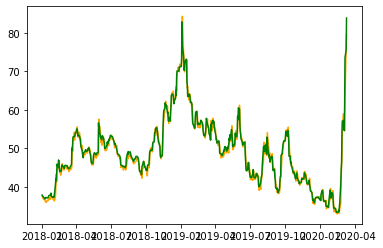

In [484]:
bag_bodel_b = LinearRegression()
bag_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
bag_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    bag_b_pred.append(bag_bodel_b.predict(history_b)[-1])
    

bag_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], bag_b_pred, squared=False)
bag_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], bag_b_pred)
bag_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], bag_b_pred)

print('Random RMSE: %.3f' % bag_b_rmse_norm,'Random MAPE: %.3f' % bag_b_mape_norm,'Random MAE: %.3f' % bag_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],bag_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()


#### После кризиса

Random RMSE: 4.246 Random MAPE: 0.030 Random MAE: 2.031


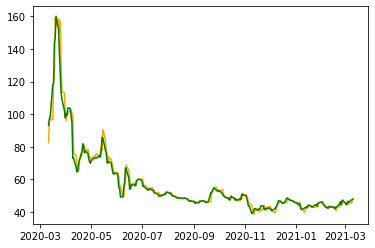

In [523]:
history_b=pd.concat([x_train_b.loc[:,set_b],x_test_b.loc[:,set_b].iloc[0:572]],axis=0)
bag_b_pred=[]

for i in range(572,833):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    bag_b_pred.append(bag_bodel_b.predict(history_b)[-1])

bag_b_rmse_cris=metr.mean_squared_error(y_test_b.iloc[572:], bag_b_pred, squared=False)
bag_b_mape_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], bag_b_pred)
bag_b_mae_cris = metr.mean_absolute_error(y_test_b.iloc[572:], bag_b_pred)

print('Random RMSE: %.3f' % bag_b_rmse_cris,'Random MAPE: %.3f' % bag_b_mape_cris,'Random MAE: %.3f' % bag_b_mae_cris)

plt.plot(data_b.iloc[2657:,0],bag_b_pred, color="orange")
plt.plot(data_b.iloc[2657:,0],y_test_b[572:],color="green")
plt.show()


### Financial


#### До кризиса

Random RMSE: 0.781 Random MAPE: 0.005 Random MAE: 0.469


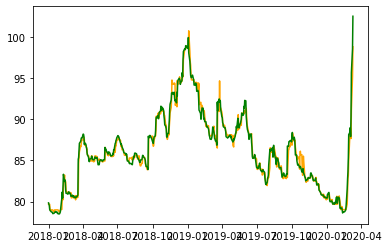

In [343]:
bag_fodel_f = BaggingRegressor()
bag_fodel_f.fit(x_train_f.loc[:,set_f], y_train_f)

history_f=x_train_f.loc[:,set_f]
bag_f_pred=[]

for i in range(0,572):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    bag_f_pred.append(bag_fodel_f.predict(history_f)[-1])
    

bag_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], bag_f_pred, squared=False)
bag_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572], bag_f_pred)
bag_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], bag_f_pred)

print('Random RMSE: %.3f' % bag_f_rmse_norm,'Random MAPE: %.3f' % bag_f_mape_norm,'Random MAE: %.3f' % bag_f_mae_norm)

plt.plot(data_f.iloc[2085:2657,0],bag_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
plt.show()


#### После кризиса

Random RMSE: 2.180 Random MAPE: 0.011 Random MAE: 1.107


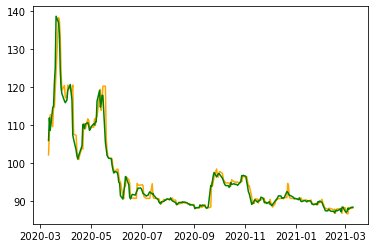

In [344]:
history_f=pd.concat([x_train_f.loc[:,set_f],x_test_f.loc[:,set_f].iloc[0:572]],axis=0)
bag_f_pred=[]

for i in range(572,833):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    bag_f_pred.append(bag_fodel_f.predict(history_f)[-1])

bag_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], bag_f_pred, squared=False)
bag_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], bag_f_pred)
bag_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], bag_f_pred)

print('Random RMSE: %.3f' % bag_f_rmse_cris,'Random MAPE: %.3f' % bag_f_mape_cris,'Random MAE: %.3f' % bag_f_mae_cris)

plt.plot(data_f.iloc[2657:,0],bag_f_pred, color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()

### Energy

#### До кризиса

Random RMSE: 3.846 Random MAPE: 0.020 Random MAE: 1.425


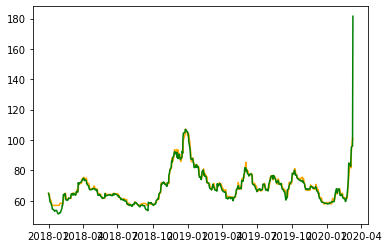

In [345]:
bag_eodel_e = BaggingRegressor()
bag_eodel_e.fit(x_train_e.loc[:,set_e_mod], y_train_e)

history_e=x_train_e.loc[:,set_e_mod]
bag_e_pred=[]

for i in range(0,572):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    bag_e_pred.append(bag_eodel_e.predict(history_e)[-1])

bag_e_rmse_norm=metr.mean_squared_error(y_test_e.iloc[:572], bag_e_pred, squared=False)
bag_e_mape_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[:572], bag_e_pred)
bag_e_mae_norm = metr.mean_absolute_error(y_test_e.iloc[:572], bag_e_pred)

print('Random RMSE: %.3f' % bag_e_rmse_norm,'Random MAPE: %.3f' % bag_e_mape_norm,'Random MAE: %.3f' % bag_e_mae_norm)

plt.plot(data_e.iloc[2085:2657,0],bag_e_pred, color="orange")
plt.plot(data_e.iloc[2085:2657,0],y_test_e[:572],color="green")
plt.show()
#3.876609	1.050047	0.013485

#### После кризиса

Random RMSE: 4.976 Random MAPE: 0.023 Random MAE: 2.767


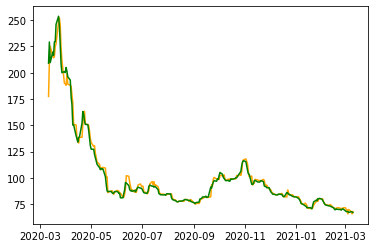

In [346]:
history_e=pd.concat([x_train_e.loc[:,set_e_mod],x_test_e.loc[:,set_e_mod].iloc[0:572]],axis=0)
bag_e_pred=[]

for i in range(572,833):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    bag_e_pred.append(bag_eodel_e.predict(history_e)[-1])

bag_e_rmse_cris=metr.mean_squared_error(y_test_e.iloc[572:], bag_e_pred, squared=False)
bag_e_mape_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], bag_e_pred)
bag_e_mae_cris = metr.mean_absolute_error(y_test_e.iloc[572:], bag_e_pred)

print('Random RMSE: %.3f' % bag_e_rmse_cris,'Random MAPE: %.3f' % bag_e_mape_cris,'Random MAE: %.3f' % bag_e_mae_cris)

plt.plot(data_e.iloc[2657:,0],bag_e_pred, color="orange")
plt.plot(data_e.iloc[2657:,0],y_test_e[572:],color="green")
plt.show()


### Service

#### До кризиса

Random RMSE: 1.252 Random MAPE: 0.013 Random MAE: 0.822


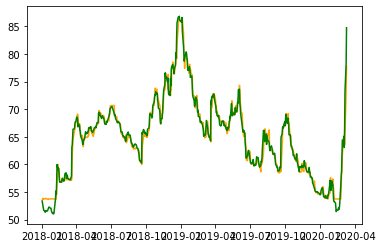

In [347]:
bag_sodel_s = BaggingRegressor()
bag_sodel_s.fit(x_train_s.loc[:,set_s_mod], y_train_s)

history_s=x_train_s.loc[:,set_s_mod]
bag_s_pred=[]

for i in range(0,572):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    bag_s_pred.append(bag_sodel_s.predict(history_s)[-1])
    
bag_s_rmse_norm=metr.mean_squared_error(y_test_s.iloc[:572], bag_s_pred, squared=False)
bag_s_mape_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[:572], bag_s_pred)
bag_s_mae_norm = metr.mean_absolute_error(y_test_s.iloc[:572], bag_s_pred)

print('Random RMSE: %.3f' % bag_s_rmse_norm,'Random MAPE: %.3f' % bag_s_mape_norm,'Random MAE: %.3f' % bag_s_mae_norm)

plt.plot(data_s.iloc[2085:2657,0],bag_s_pred, color="orange")
plt.plot(data_s.iloc[2085:2657,0],y_test_s[:572],color="green")
plt.show()


#### После кризиса

Random RMSE: 2.556 Random MAPE: 0.017 Random MAE: 1.448


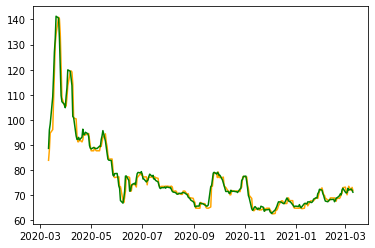

In [348]:
history_s=pd.concat([x_train_s.loc[:,set_s_mod],x_test_s.loc[:,set_s_mod].iloc[0:572]],axis=0)
bag_s_pred=[]

for i in range(572,833):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    bag_s_pred.append(bag_sodel_s.predict(history_s)[-1])

bag_s_rmse_cris=metr.mean_squared_error(y_test_s.iloc[572:], bag_s_pred, squared=False)
bag_s_mape_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], bag_s_pred)
bag_s_mae_cris = metr.mean_absolute_error(y_test_s.iloc[572:], bag_s_pred)

print('Random RMSE: %.3f' % bag_s_rmse_cris,'Random MAPE: %.3f' % bag_s_mape_cris,'Random MAE: %.3f' % bag_s_mae_cris)

plt.plot(data_s.iloc[2657:,0],bag_s_pred, color="orange")
plt.plot(data_s.iloc[2657:,0],y_test_s[572:],color="green")
plt.show()


## MLP

#### Manufacturing

In [59]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=MLPRegressor(max_iter=5000), param_grid=param_list,cv=3,scoring=scorer(),n_jobs = -1, verbose = 2)
gridCV.fit(x_train_m[['TEDRATE_lag1','SP_industrial_lag1', 'SP_information_technology_lag1','SP_materials_lag1','SP_VIX_lag1','10Y_yield_minus_fed_funds_rate_lag1','USD_CNY_Exchange_Rate_lag1','Oil_Futures_lag1','CDS_5Y_lag1','TEDRATE_lag2','SP_industrial_lag2', 'SP_information_technology_lag2','SP_materials_lag2','SP_VIX_lag2','10Y_yield_minus_fed_funds_rate_lag2','USD_CNY_Exchange_Rate_lag2','Oil_Futures_lag2','CDS_5Y_lag2']],y_train_m)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=5000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(25,), (50,), (70,), (100,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring=make_scorer(score, greater_is_better=False), verbose=2)

In [63]:
gridCV.best_params_

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (50,),
 'solver': 'lbfgs'}

#### До кризиса

Random RMSE: 2.775 Random MAPE: 0.022 Random MAE: 1.897


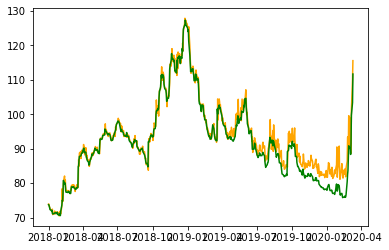

In [38]:
mlp_model_m = MLPRegressor(max_iter=5000,solver='lbfgs',activation='relu',alpha=0.00005,hidden_layer_sizes=(50,)).fit(x_train_m.loc[:,set_m], y_train_m)
history_m=x_train_m.loc[:,set_m]
mlp_m_pred=[]

for i in range(0,572):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    mlp_m_pred.append(mlp_model_m.predict(history_m)[-1])
    

mlp_m_rmse_norm=metr.mean_squared_error(y_test_m.iloc[:572], mlp_m_pred, squared=False)
mlp_m_mape_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[:572], mlp_m_pred)
mlp_m_mae_norm = metr.mean_absolute_error(y_test_m.iloc[:572], mlp_m_pred)
print('Random RMSE: %.3f' % mlp_m_rmse_norm,'Random MAPE: %.3f' % mlp_m_mape_norm,'Random MAE: %.3f' % mlp_m_mae_norm)

plt.plot(data_m.iloc[2085:2657,0],mlp_m_pred, color="orange")
plt.plot(data_m.iloc[2085:2657,0],y_test_m[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 5.337 Random MAPE: 0.042 Random MAE: 4.573


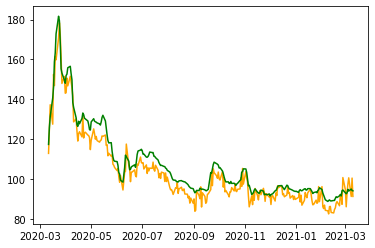

In [39]:
history_m=pd.concat([x_train_m.loc[:,set_m],x_test_m.loc[:,set_m].iloc[0:572]],axis=0)
mlp_m_pred=[]

for i in range(572,833):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    mlp_m_pred.append(mlp_model_m.predict(history_m)[-1])

mlp_m_rmse_cris=metr.mean_squared_error(y_test_m.iloc[572:], mlp_m_pred, squared=False)
mlp_m_mape_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], mlp_m_pred)
mlp_m_mae_cris = metr.mean_absolute_error(y_test_m.iloc[572:], mlp_m_pred)
print('Random RMSE: %.3f' % mlp_m_rmse_cris,'Random MAPE: %.3f' % mlp_m_mape_cris,'Random MAE: %.3f' % mlp_m_mae_cris)


plt.plot(data_m.iloc[2657:,0],mlp_m_pred, color="orange")
plt.plot(data_m.iloc[2657:,0],y_test_m[572:],color="green")
plt.show()

#### Consumer

#### До кризиса

In [51]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=MLPRegressor(max_iter=5000), param_grid=param_list,cv=3,scoring='neg_root_mean_squared_error',n_jobs = -1, verbose = 2)
gridCV.fit(x_train_c.loc[:,set_c_mod],y_train_c)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=5000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(25,), (50,), (70,), (100,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [52]:
gridCV.best_params_

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (25,),
 'solver': 'lbfgs'}

In [73]:
mlp_codel_c = MLPRegressor(max_iter=5000,solver='lbfgs',activation='relu',alpha=0.00005,hidden_layer_sizes=(25,)).fit(x_train_c.loc[:,set_c_mod3], y_train_c)

In [259]:
set_c_mod3=['SP_consumer_staples_lag1',
 'NASDAQ_Insurance_index_lag1',
 'SP_VIX_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'SP_consumer_staples_lag2',
 'NASDAQ_Insurance_index_lag2',
 'SP_VIX_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']#,
 # 'SP_consumer_staples_lag3',
 #'NASDAQ_Insurance_index_lag3',
 #'SP_VIX_lag3',
 #'Oil_Futures_lag3',
 #'CDS_5Y_lag3'        ] #USD_index_lag1 NASDAQ_Insurance_index_lag1 SP_real_estate_lag3

In [61]:
x_train_c.corr()

,TEDRATE_lag1,USD_index_lag1,NASDAQ_Bank_lag1,NASDAQ_Financial_100_lag1,NASDAQ_Insurance_index_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_consumer_discretionary_lag1,SP_consumer_staples_lag1,SP_energy_lag1,...,SP_materials_lag3,SP_real_estate_lag3,SP_utilities_lag3,SP_VIX_lag3,10Y_yield_minus_fed_funds_rate_lag3,USD_CNY_Exchange_Rate_lag3,Oil_Futures_lag3,CDS_5Y_lag1,CDS_5Y_lag2,CDS_5Y_lag3
TEDRATE_lag1,1.000000,0.430737,0.235771,0.200624,0.279455,0.118192,0.211807,0.246447,0.287338,-0.260837,...,0.087609,0.289453,0.322407,0.102717,-0.517198,0.306790,-0.357260,-0.120582,-0.119975,-0.119650
USD_index_lag1,0.430737,1.000000,0.814791,0.801080,0.840114,0.745799,0.804205,0.835039,0.839280,-0.237095,...,0.651768,0.792275,0.803423,-0.373164,-0.565525,0.351099,-0.908387,-0.745760,-0.746141,-0.746494
NASDAQ_Bank_lag1,0.235771,0.814791,1.000000,0.993651,0.961694,0.968058,0.955697,0.944348,0.907970,0.087278,...,0.904710,0.843290,0.906591,-0.637014,-0.499087,0.273082,-0.661069,-0.845541,-0.845263,-0.845053
NASDAQ_Financial_100_lag1,0.200624,0.801080,0.993651,1.000000,0.975401,0.988759,0.977080,0.964931,0.932218,0.141096,...,0.935122,0.876866,0.926882,-0.664668,-0.512074,0.197770,-0.647860,-0.881731,-0.881382,-0.881103
NASDAQ_Insurance_index_lag1,0.279455,0.840114,0.961694,0.975401,1.000000,0.965523,0.985494,0.990456,0.981014,0.141480,...,0.913301,0.939816,0.962138,-0.637129,-0.618353,0.121482,-0.692798,-0.928126,-0.927705,-0.927385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USD_CNY_Exchange_Rate_lag3,0.306790,0.351099,0.273082,0.197770,0.121482,0.077996,0.060481,0.048979,0.032422,-0.688715,...,-0.021062,-0.050461,0.127221,0.080551,-0.027013,1.000000,-0.471828,0.139527,0.138828,0.138267
Oil_Futures_lag3,-0.357260,-0.908387,-0.661069,-0.647860,-0.692798,-0.584241,-0.653055,-0.687113,-0.700135,0.490289,...,-0.480999,-0.649538,-0.693330,0.159704,0.528125,-0.471828,1.000000,0.589356,0.589787,0.590496
CDS_5Y_lag1,-0.120582,-0.745760,-0.845541,-0.881731,-0.928126,-0.905187,-0.941677,-0.952197,-0.953436,-0.309281,...,-0.892720,-0.937942,-0.893195,0.697553,0.556289,0.139527,0.589356,1.000000,0.999002,0.997447
CDS_5Y_lag2,-0.119975,-0.746141,-0.845263,-0.881382,-0.927705,-0.904774,-0.941173,-0.951776,-0.952992,-0.307383,...,-0.893204,-0.937999,-0.893177,0.698161,0.554832,0.138828,0.589787,0.999002,1.000000,0.998987


Random RMSE: 1.026 Random MAPE: 0.01039 Random MAE: 0.59217


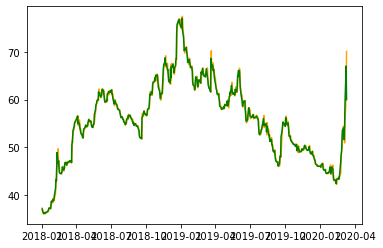

In [76]:
history_c=x_train_c.loc[:,set_c_mod3]
mlp_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    mlp_c_pred.append(mlp_codel_c.predict(history_c)[-1])
    
mlp_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], mlp_c_pred, squared=False)
mlp_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], mlp_c_pred)
mlp_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], mlp_c_pred)
print('Random RMSE: %.3f' % mlp_c_rmse_norm,'Random MAPE: %.5f' % mlp_c_mape_norm,'Random MAE: %.5f' % mlp_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],mlp_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c.iloc[:572],color="green")
plt.show()
#1.010184	0.598854	0.010533

#### После кризиса

Random RMSE: 1.249 Random MAPE: 0.01404 Random MAE: 0.704


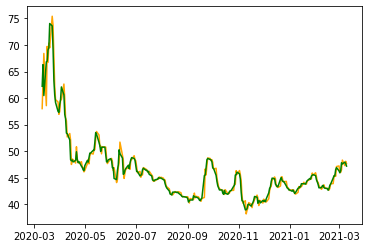

In [75]:
history_c=pd.concat([x_train_c.loc[:,set_c_mod3],x_test_c.loc[:,set_c_mod3].iloc[0:572]],axis=0)
mlp_c_pred=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod3].iloc[i])
    mlp_c_pred.append(mlp_codel_c.predict(history_c)[-1])

mlp_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], mlp_c_pred, squared=False)
mlp_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], mlp_c_pred)
mlp_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], mlp_c_pred)
print('Random RMSE: %.3f' % mlp_c_rmse_cris,'Random MAPE: %.5f' % mlp_c_mape_cris,'Random MAE: %.3f' % mlp_c_mae_cris)


plt.plot(data_c.iloc[2657:,0],mlp_c_pred, color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()
#1.192099	0.688487	0.013830

### Banks

In [140]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=MLPRegressor(max_iter=5000,random_state=10), param_grid=param_list,cv=3,scoring='neg_root_mean_squared_error',n_jobs = -1, verbose = 2)

In [136]:
gridCV.fit(x_train_b.loc[:,set_b],y_train_b)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=5000, random_state=10),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(25,), (50,), (70,), (100,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [137]:
gridCV.best_params_

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (25,),
 'solver': 'lbfgs'}

In [141]:
gridCV.fit(np.log(x_train_b).loc[:,set_b],np.log(y_train_b))
gridCV.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (50,),
 'solver': 'lbfgs'}

In [143]:
mlp_bodel_b_log = MLPRegressor(random_state=10,solver='lbfgs',activation='relu',max_iter=5000,alpha=0.00005,hidden_layer_sizes=(50,)).fit(np.log(x_train_b).loc[:,set_b], np.log(y_train_b))

In [88]:
set_b=['TEDRATE_lag1',
 'NASDAQ_Bank_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'NASDAQ_Bank_lag2',
 'SP_VIX_lag2',
    'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [122]:
set_b=['TEDRATE_lag1',
 'NASDAQ_Bank_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'NASDAQ_Bank_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'CDS_5Y_lag2']

Random RMSE: 1.445 Random MAPE: 0.017 Random MAE: 0.856


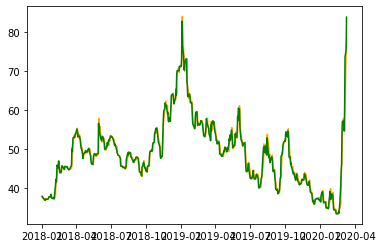

In [144]:
history_b=np.log(x_train_b).loc[:,set_b]
mlp_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(np.log(x_test_b).loc[:,set_b].iloc[i])
    mlp_b_pred.append(mlp_bodel_b_log.predict(history_b)[-1])
    
mlp_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], np.exp(mlp_b_pred), squared=False)
mlp_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], np.exp(mlp_b_pred))
mlp_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], np.exp(mlp_b_pred))
print('Random RMSE: %.3f' % mlp_b_rmse_norm,'Random MAPE: %.3f' % mlp_b_mape_norm,'Random MAE: %.3f' % mlp_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],np.exp(mlp_b_pred), color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b.iloc[:572],color="green")
plt.show()
#1.516456	0.875204	0.017116

Random RMSE: 3.65591 Random MAPE: 0.026393255824981844 Random MAE: 1.8005877598041296


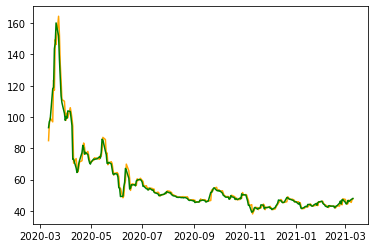

In [146]:
history_b=pd.concat([np.log(x_train_b).loc[:,set_b],np.log(x_test_b).iloc[0:572].loc[:,set_b]],axis=0)
mlp_b_pred=[]

for i in range(572,833):
    history_b=history_b.append(np.log(x_test_b).loc[:,set_b].iloc[i])
    mlp_b_pred.append(mlp_bodel_b_log.predict(history_b)[-1])

mlp_b_rmse_cris=metr.mean_squared_error(y_test_b.iloc[572:], np.exp(mlp_b_pred), squared=False)
mlp_b_mape_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], np.exp(mlp_b_pred))
mlp_b_mae_cris = metr.mean_absolute_error(y_test_b.iloc[572:], np.exp(mlp_b_pred))
print('Random RMSE: %.5f' % mlp_b_rmse_cris,'Random MAPE:', mlp_b_mape_cris,'Random MAE:', mlp_b_mae_cris)


plt.plot(data_b.iloc[2657:,0],np.exp(mlp_b_pred), color="orange")
plt.plot(data_b.iloc[2657:,0],y_test_b[572:],color="green")
plt.show()
#3.567369	1.715979	0.024937

In [494]:
history_b

,TEDRATE_lag1,NASDAQ_Bank_lag1,SP_VIX_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,NASDAQ_Bank_lag2,SP_VIX_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
3,-1.660731,7.413554,2.987196,1.920944,4.421007,4.514849,-1.714798,7.415283,2.997730,1.920915,4.403910,4.515040
4,-1.609438,7.439271,2.983660,1.920988,4.414736,4.541631,-1.660731,7.413554,2.987196,1.920944,4.421007,4.514849
5,-1.609438,7.446223,2.936513,1.920959,4.415824,4.539097,-1.609438,7.439271,2.983660,1.920988,4.414736,4.541631
6,-1.560648,7.437330,2.975530,1.920797,4.413041,4.513521,-1.609438,7.446223,2.936513,1.920959,4.415824,4.539097
7,-1.609438,7.428927,2.998229,1.920900,4.391853,4.505460,-1.560648,7.437330,2.975530,1.920797,4.413041,4.513521
...,...,...,...,...,...,...,...,...,...,...,...,...
2682,-0.020203,7.832125,3.642050,1.954020,3.001217,4.167130,-0.030459,7.844460,3.729061,1.954289,3.109507,4.210571
2683,-0.010050,7.767357,3.718681,1.954742,2.989211,4.183823,-0.020203,7.832125,3.642050,1.954020,3.001217,4.167130
2684,0.000000,7.733552,3.700808,1.956030,2.989211,4.244756,-0.010050,7.767357,3.718681,1.954742,2.989211,4.183823
2685,-0.010050,7.807791,3.652215,1.956398,2.905260,4.277967,0.000000,7.733552,3.700808,1.956030,2.989211,4.244756


### Financial


In [156]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.0005,0.001,0.01]}
gridCV = GridSearchCV(estimator=MLPRegressor(random_state=1611,max_iter=10000), param_grid=param_list,cv=3,scoring='neg_root_mean_squared_error',n_jobs = -1, verbose = 2)
gridCV.fit(x_train_f.loc[:,set_f], y_train_f)
gridCV.best_params_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'activation': 'relu',
 'alpha': 0.0005,
 'hidden_layer_sizes': (70,),
 'solver': 'lbfgs'}

In [286]:
set_f_orig=['TEDRATE_lag1','NASDAQ_Financial_100_lag1',
       'NASDAQ_real_estate_and_other_fanacial_services_lag1', 'SP_500_lag1',
       'SP_energy_lag1', 'SP_financial_lag1', 'SP_health_care_lag1',
       'SP_real_estate_lag1',
       'SP_VIX_lag1', '10Y_yield_minus_fed_funds_rate_lag1',
       'USD_CNY_Exchange_Rate_lag1', 'Oil_Futures_lag1','TEDRATE_lag2','NASDAQ_Financial_100_lag2',
       'NASDAQ_real_estate_and_other_fanacial_services_lag2', 'SP_500_lag2',
       'SP_energy_lag2', 'SP_financial_lag2', 'SP_health_care_lag2',
       'SP_real_estate_lag2',
       'SP_VIX_lag2', '10Y_yield_minus_fed_funds_rate_lag2',
       'USD_CNY_Exchange_Rate_lag2', 'Oil_Futures_lag2','CDS_5Y_lag1','CDS_5Y_lag2']

set_f=['TEDRATE_lag1',
       'NASDAQ_Financial_100_lag1',
       'NASDAQ_real_estate_and_other_fanacial_services_lag1', 
       'SP_500_lag1',
       'SP_energy_lag1', 
       #'SP_financial_lag1', 
       'SP_health_care_lag1',
       'SP_real_estate_lag1',
       #'SP_VIX_lag1',
       #'USD_CNY_Exchange_Rate_lag1',
       #'10Y_yield_minus_fed_funds_rate_lag1',
       'TEDRATE_lag2',
       'NASDAQ_Financial_100_lag2',
       'NASDAQ_real_estate_and_other_fanacial_services_lag2', 
       'SP_500_lag2',
       'SP_energy_lag2', 
       #'SP_financial_lag2', 
       'SP_health_care_lag2',
       'SP_real_estate_lag2',
       #'SP_VIX_lag2',
       #'USD_CNY_Exchange_Rate_lag2',
      # '10Y_yield_minus_fed_funds_rate_lag2',
       'CDS_5Y_lag1','CDS_5Y_lag2']

In [686]:
x_train_f.loc[:,set_f[:10]].corr()

,TEDRATE_lag1,NASDAQ_Financial_100_lag1,NASDAQ_real_estate_and_other_fanacial_services_lag1,SP_500_lag1,SP_energy_lag1,SP_financial_lag1,SP_health_care_lag1,SP_real_estate_lag1,SP_VIX_lag1,USD_CNY_Exchange_Rate_lag1
TEDRATE_lag1,1.000000,0.200624,0.118192,0.211807,-0.260837,0.131475,0.207996,0.288475,0.094183,0.309563
NASDAQ_Financial_100_lag1,0.200624,1.000000,0.988759,0.977080,0.141096,0.992919,0.940989,0.877849,-0.668178,0.200193
NASDAQ_real_estate_and_other_fanacial_services_lag1,0.118192,0.988759,1.000000,0.981118,0.241359,0.988890,0.946905,0.890084,-0.700182,0.079883
SP_500_lag1,0.211807,0.977080,0.981118,1.000000,0.218927,0.976431,0.982998,0.946429,-0.666560,0.063223
SP_energy_lag1,-0.260837,0.141096,0.241359,0.218927,1.000000,0.169871,0.175088,0.235879,-0.456470,-0.689209
SP_financial_lag1,0.131475,0.992919,0.988890,0.976431,0.169871,1.000000,0.944865,0.874853,-0.672463,0.166691
SP_health_care_lag1,0.207996,0.940989,0.946905,0.982998,0.175088,0.944865,1.000000,0.947553,-0.605535,0.020653
SP_real_estate_lag1,0.288475,0.877849,0.890084,0.946429,0.235879,0.874853,0.947553,1.000000,-0.643374,-0.047000
SP_VIX_lag1,0.094183,-0.668178,-0.700182,-0.666560,-0.456470,-0.672463,-0.605535,-0.643374,1.000000,0.079542
USD_CNY_Exchange_Rate_lag1,0.309563,0.200193,0.079883,0.063223,-0.689209,0.166691,0.020653,-0.047000,0.079542,1.000000


#### До кризиса

Random RMSE: 0.67367 Random MAPE: 0.00477 Random MAE: 0.41605


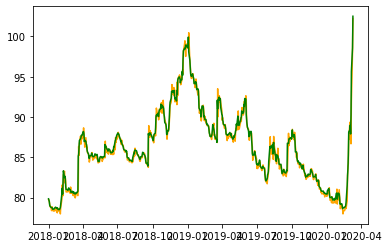

In [157]:
mlp_fodel_f = MLPRegressor(random_state=1611,solver='lbfgs',activation='relu',max_iter=10000,alpha=0.0005,hidden_layer_sizes=(70,)).fit(x_train_f.loc[:,set_f], y_train_f)
history_f=x_train_f.loc[:,set_f]
mlp_f_pred=[]

for i in range(0,572):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    mlp_f_pred.append(mlp_fodel_f.predict(history_f)[-1])
    

mlp_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], mlp_f_pred, squared=False)
mlp_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572],mlp_f_pred)
mlp_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], mlp_f_pred)
print('Random RMSE: %.5f' % mlp_f_rmse_norm,'Random MAPE: %.5f' % mlp_f_mape_norm,'Random MAE: %.5f' % mlp_f_mae_norm)

plt.plot(data_f.iloc[2085:2657,0],mlp_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f.iloc[:572],color="green")
plt.show()
#0.674235	0.357771	0.004069
#Random RMSE: 0.678 Random MAPE: 0.005 Random MAE: 0.419

#### После кризиса

Random RMSE: 2.016 Random MAPE: 0.010 Random MAE: 1.068


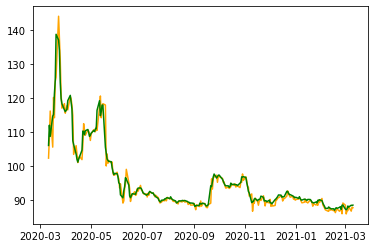

In [158]:
history_f=pd.concat([x_train_f.loc[:,set_f],x_test_f.loc[:,set_f].iloc[0:572]],axis=0)
mlp_f_pred=[]

for i in range(572,833):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    mlp_f_pred.append(mlp_fodel_f.predict(history_f)[-1])

mlp_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], mlp_f_pred, squared=False)
mlp_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], mlp_f_pred)
mlp_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], mlp_f_pred)
print('Random RMSE: %.3f' % mlp_f_rmse_cris,'Random MAPE: %.3f' % mlp_f_mape_cris,'Random MAE: %.3f' % mlp_f_mae_cris)


plt.plot(data_f.iloc[2657:,0],mlp_f_pred, color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()
#1.933258	0.917252	0.008790

### Energy

In [168]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005,0.005,0.05]}
gridCV = GridSearchCV(estimator=MLPRegressor(random_state=1611,max_iter=5000), param_grid=param_list,cv=3,scoring='neg_root_mean_squared_error',n_jobs = -1, verbose = 2)
gridCV.fit(x_train_e.loc[:,set_e_mod],y_train_e)
gridCV.best_params_


Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (100,),
 'solver': 'lbfgs'}

In [169]:
mlp_eodel_e = MLPRegressor(random_state=1611,solver='lbfgs',activation='relu',max_iter=5000,alpha=0.005,hidden_layer_sizes=(100,)).fit(x_train_e.loc[:,set_e_mod], y_train_e)

#### До кризиса

Random RMSE: 3.699 Random MAPE: 0.019 Random MAE: 1.403


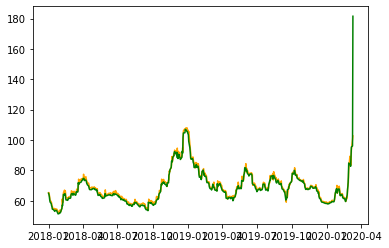

In [170]:
history_e=x_train_e.loc[:,set_e_mod]
mlp_e_pred=[]

for i in range(0,572):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    mlp_e_pred.append(mlp_eodel_e.predict(history_e)[-1])

mlp_e_rmse_norm=metr.mean_squared_error(y_test_e.iloc[:572], mlp_e_pred, squared=False)
mlp_e_mape_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[:572], mlp_e_pred)
mlp_e_mae_norm = metr.mean_absolute_error(y_test_e.iloc[:572], mlp_e_pred)
print('Random RMSE: %.3f' % mlp_e_rmse_norm,'Random MAPE: %.3f' % mlp_e_mape_norm,'Random MAE: %.3f' % mlp_e_mae_norm)

plt.plot(data_e.iloc[2085:2657,0],mlp_e_pred, color="orange")
plt.plot(data_e.iloc[2085:2657,0],y_test_e.iloc[:572],color="green")
plt.show()
#3.876609	1.050047	0.013485
#4.510319	2.312523	0.018790

#### После кризиса

Random RMSE: 4.964 Random MAPE: 0.034 Random MAE: 3.504


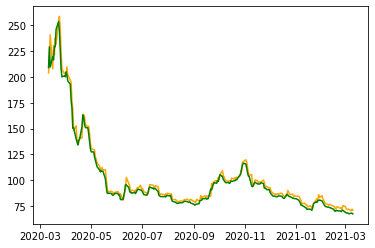

In [171]:
history_e=pd.concat([x_train_e.loc[:,set_e_mod],x_test_e.loc[:,set_e_mod].iloc[0:572]],axis=0)
mlp_e_pred=[]

for i in range(572,833):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    mlp_e_pred.append(mlp_eodel_e.predict(history_e)[-1])

mlp_e_rmse_cris=metr.mean_squared_error(y_test_e.iloc[572:], mlp_e_pred, squared=False)
mlp_e_mape_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], mlp_e_pred)
mlp_e_mae_cris = metr.mean_absolute_error(y_test_e.iloc[572:], mlp_e_pred)
print('Random RMSE: %.3f' % mlp_e_rmse_cris,'Random MAPE: %.3f' % mlp_e_mape_cris,'Random MAE: %.3f' % mlp_e_mae_cris)


plt.plot(data_e.iloc[2657:,0],mlp_e_pred, color="orange")
plt.plot(data_e.iloc[2657:,0],y_test_e[572:],color="green")
plt.show()
#4.510319	2.312523	0.018790


### Service

In [665]:
param_list = {"hidden_layer_sizes": [(25,),(50,),(70,),(100,)], "activation": ["tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=MLPRegressor(max_iter=5000), param_grid=param_list,cv=3,scoring='neg_root_mean_squared_error',n_jobs = -1, verbose = 2)
gridCV.fit(x_train_s.loc[:,set_s_mod],y_train_s)
gridCV.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (70,),
 'solver': 'lbfgs'}

In [172]:
mlp_sodel_s = MLPRegressor(solver='lbfgs',activation='relu',max_iter=5000,alpha=0.00005,hidden_layer_sizes=(70,)).fit(x_train_s.loc[:,set_s_mod], y_train_s)

#### До кризиса

Random RMSE: 1.014 Random MAPE: 0.009 Random MAE: 0.617


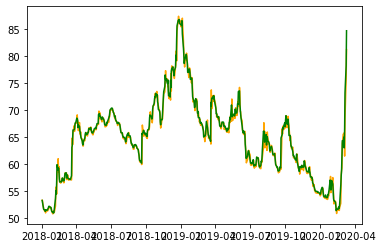

In [173]:
history_s=x_train_s.loc[:,set_s_mod]
mlp_s_pred=[]

for i in range(0,572):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    mlp_s_pred.append(mlp_sodel_s.predict(history_s)[-1])

mlp_s_rmse_norm=metr.mean_squared_error(y_test_s.iloc[:572], mlp_s_pred, squared=False)
mlp_s_mape_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[:572], mlp_s_pred)
mlp_s_mae_norm = metr.mean_absolute_error(y_test_s.iloc[:572], mlp_s_pred)
print('Random RMSE: %.3f' % mlp_s_rmse_norm,'Random MAPE: %.3f' % mlp_s_mape_norm,'Random MAE: %.3f' % mlp_s_mae_norm)


plt.plot(data_s.iloc[2085:2657,0],mlp_s_pred, color="orange")
plt.plot(data_s.iloc[2085:2657,0],y_test_s[:572],color="green")
plt.show()

#### После кризиса

Random RMSE: 2.085 Random MAPE: 0.015 Random MAE: 1.223


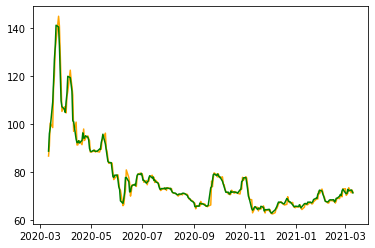

In [174]:
history_s=pd.concat([x_train_s.loc[:,set_s_mod].iloc[0:572]],axis=0)
mlp_s_pred=[]

for i in range(572,833):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    mlp_s_pred.append(mlp_sodel_s.predict(history_s)[-1])

mlp_s_rmse_cris=metr.mean_squared_error(y_test_s.iloc[572:], mlp_s_pred, squared=False)
mlp_s_mape_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], mlp_s_pred)
mlp_s_mae_cris = metr.mean_absolute_error(y_test_s.iloc[572:], mlp_s_pred)
print('Random RMSE: %.3f' % mlp_s_rmse_cris,'Random MAPE: %.3f' % mlp_s_mape_cris,'Random MAE: %.3f' % mlp_s_mae_cris)


plt.plot(data_s.iloc[2657:,0],mlp_s_pred, color="orange")
plt.plot(data_s.iloc[2657:,0],y_test_s[572:],color="green")
plt.show()

### SVR

#### Manufacturing

#### До кризиса

In [9]:
#kernel='rbf', C=10, degree=3, coef0=0.0001, gamma='scale'
svr_model_m = SVR(kernel='linear', C=0.005, degree=1, coef0=0.01,gamma='scale')
svr_model_m.fit(x_train_m.loc[:,set_m], y_train_m)

SVR(C=0.005, coef0=0.01, degree=1, kernel='linear')

Random RMSE: 1.208 Random MAPE: 0.008 Random MAE: 0.742


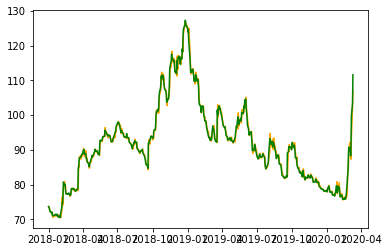

In [10]:
history_m=x_train_m.loc[:,set_m]
svr_m_pred=[]

for i in range(0,572):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    svr_m_pred.append(svr_model_m.predict(history_m)[-1])


svr_m_rmse_norm=metr.mean_squared_error(y_test_m.iloc[:572], svr_m_pred, squared=False)
svr_m_mape_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[:572], svr_m_pred)
svr_m_mae_norm = metr.mean_absolute_error(y_test_m.iloc[:572], svr_m_pred)
print('Random RMSE: %.3f' % svr_m_rmse_norm,'Random MAPE: %.3f' % svr_m_mape_norm,'Random MAE: %.3f' % svr_m_mae_norm)

plt.plot(data_m.iloc[2085:2657,0],svr_m_pred, color="orange")
plt.plot(data_m.iloc[2085:2657,0],y_test_m[:572],color="green")
plt.show()
#1.297220	0.770024	0.008158

#### После кризиса

Random RMSE: 2.301 Random MAPE: 0.012 Random MAE: 1.390


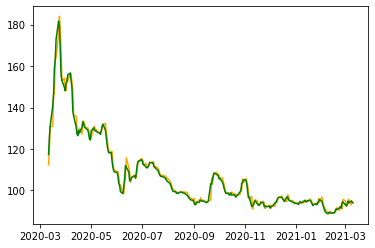

In [11]:
history_m=pd.concat([x_train_m.loc[:,set_m],x_test_m.loc[:,set_m].iloc[0:572]],axis=0)
svr_m_pred=[]

for i in range(572,833):
    history_m=history_m.append(x_test_m.loc[:,set_m].iloc[i])
    svr_m_pred.append(svr_model_m.predict(history_m)[-1])

svr_m_rmse_cris=metr.mean_squared_error(y_test_m.iloc[572:], svr_m_pred, squared=False)
svr_m_mape_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], svr_m_pred)
svr_m_mae_cris = metr.mean_absolute_error(y_test_m.iloc[572:], svr_m_pred)
print('Random RMSE: %.3f' % svr_m_rmse_cris,'Random MAPE: %.3f' % svr_m_mape_cris,'Random MAE: %.3f' % svr_m_mae_cris)

plt.plot(data_m.iloc[2657:,0],svr_m_pred, color="orange")
plt.plot(data_m.iloc[2657:,0],y_test_m[572:],color="green")
plt.show()
#2.540597	1.465859	0.012451

#### Consumer

In [42]:
set_c_orig=['TEDRATE_lag1',
 'SP_consumer_discretionary_lag1',
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_consumer_discretionary_lag2',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

set_c=['TEDRATE_lag1',
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

set_c_mod=[
 'SP_consumer_staples_lag1',
 'SP_VIX_lag1',

 'Oil_Futures_lag1',
 'CDS_5Y_lag1',

 'SP_consumer_staples_lag2',
 'SP_VIX_lag2',

 'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [541]:
x_train_c.loc[:,set_c_mod].corr()

,TEDRATE_lag1,SP_consumer_staples_lag1,SP_VIX_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_consumer_staples_lag2,SP_VIX_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
TEDRATE_lag1,1.000000,0.287338,0.094183,0.309563,-0.355067,-0.120582,0.990987,0.287726,0.098262,0.308256,-0.356220,-0.119975
SP_consumer_staples_lag1,0.287338,1.000000,-0.625341,0.035866,-0.701142,-0.953436,0.287439,0.999535,-0.623065,0.034164,-0.700657,-0.952992
SP_VIX_lag1,0.094183,-0.625341,1.000000,0.079542,0.160228,0.697103,0.089566,-0.622287,0.966550,0.079542,0.162910,0.691208
USD_CNY_Exchange_Rate_lag1,0.309563,0.035866,0.079542,1.000000,-0.472877,0.136185,0.309935,0.036171,0.079722,0.999252,-0.474388,0.135391
Oil_Futures_lag1,-0.355067,-0.701142,0.160228,-0.472877,1.000000,0.590835,-0.353895,-0.701773,0.161918,-0.470728,0.998334,0.592159
CDS_5Y_lag1,-0.120582,-0.953436,0.697103,0.136185,0.590835,1.000000,-0.121691,-0.953468,0.698359,0.137843,0.589936,0.999002
TEDRATE_lag2,0.990987,0.287439,0.089566,0.309935,-0.353895,-0.121691,1.000000,0.287743,0.094225,0.308599,-0.355050,-0.120843
SP_consumer_staples_lag2,0.287726,0.999535,-0.622287,0.036171,-0.701773,-0.953468,0.287743,1.000000,-0.624905,0.034437,-0.700926,-0.953389
SP_VIX_lag2,0.098262,-0.623065,0.966550,0.079722,0.161918,0.698359,0.094225,-0.624905,1.000000,0.079990,0.159959,0.696853
USD_CNY_Exchange_Rate_lag2,0.308256,0.034164,0.079542,0.999252,-0.470728,0.137843,0.308599,0.034437,0.079990,1.000000,-0.472356,0.137122


#### До кризиса

In [559]:
#param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10],'degree' : [3,8],'coef0' : [0.01,10],'gamma' : ('auto','scale')}
#param = {'coef0' : [0.01,0.001,0.0001],'degree' : [0.01,0.001,0.1,1],'gamma': [0.01,0.1,'auto','scale']}
param = {'C' : [0.01,0.001,1,5,10]}
#END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear
modelsvr = SVR(kernel='linear', degree=0.01, coef0=0.01,gamma='scale')

grid_search = GridSearchCV(estimator = SVR(), param_grid = param, 
                      cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_absolute_error')
grid_search.fit(x_train_c.loc[:,set_c_mod],y_train_c)
grid_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'C': 10}

Random RMSE: 1.024927 Random MAPE: 0.010429 Random MAE: 0.594102


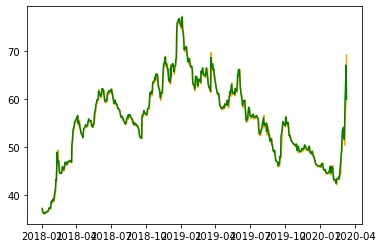

In [13]:
svr_codel_c = SVR(kernel='linear', C=1, degree=0.01, coef0=0.01,gamma='scale')
svr_codel_c.fit(x_train_c.loc[:,set_c_mod], y_train_c)

history_c=x_train_c.loc[:,set_c_mod]
svr_c_pred=[]

for i in range(0,572):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod].iloc[i])
    svr_c_pred.append(svr_codel_c.predict(history_c)[-1])

svr_c_rmse_norm=metr.mean_squared_error(y_test_c.iloc[:572], svr_c_pred, squared=False)
svr_c_mape_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[:572], svr_c_pred)
svr_c_mae_norm = metr.mean_absolute_error(y_test_c.iloc[:572], svr_c_pred)
print('Random RMSE: %.6f' % svr_c_rmse_norm,'Random MAPE: %.6f' % svr_c_mape_norm,'Random MAE: %.6f' %svr_c_mae_norm)

plt.plot(data_c.iloc[2085:2657,0],svr_c_pred, color="orange")
plt.plot(data_c.iloc[2085:2657,0],y_test_c[:572],color="green")
plt.show()
#1.010184	0.598854	0.010533
# C=1 - 1.024,degree=0.01,gamma='scale',Random MAPE: 0.01043 Random MAE: 0.5941
#andom RMSE: 1.024927 Random MAPE: 0.010429 Random MAE: 0.594102

#### После кризиса

Random RMSE: 1.27397 Random MAPE: 0.01428 Random MAE: 0.71571


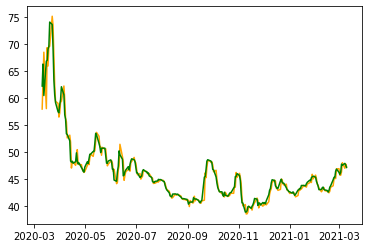

In [16]:
history_c=pd.concat([x_train_c.loc[:,set_c_mod],x_test_c.loc[:,set_c_mod].iloc[0:572]],axis=0)
svr_c_predc=[]

for i in range(572,833):
    history_c=history_c.append(x_test_c.loc[:,set_c_mod].iloc[i])
    svr_c_predc.append(svr_codel_c.predict(history_c)[-1])



svr_c_rmse_cris=metr.mean_squared_error(y_test_c.iloc[572:], svr_c_predc, squared=False)
svr_c_mape_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], svr_c_predc)
svr_c_mae_cris = metr.mean_absolute_error(y_test_c.iloc[572:], svr_c_predc)
print('Random RMSE: %.5f' % svr_c_rmse_cris,'Random MAPE: %.5f' % svr_c_mape_cris,'Random MAE: %.5f' % svr_c_mae_cris)


plt.plot(data_c.iloc[2657:,0],svr_c_predc, color="orange")
plt.plot(data_c.iloc[2657:,0],y_test_c[572:],color="green")
plt.show()
#1.192099	0.688487	0.013830

### Banks

#### До кризиса

Random RMSE: 1.477 Random MAPE: 0.017 Random MAE: 0.869


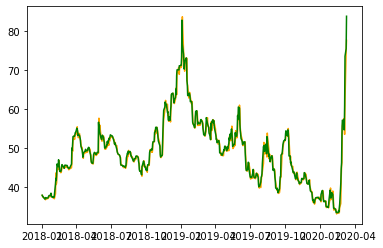

In [17]:
svr_bodel_b = SVR(kernel='linear', C=0.005, degree=1, coef0=0.01,gamma='scale')
svr_bodel_b.fit(x_train_b.loc[:,set_b], y_train_b)

history_b=x_train_b.loc[:,set_b]
svr_b_pred=[]

for i in range(0,572):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    svr_b_pred.append(svr_bodel_b.predict(history_b)[-1])

svr_b_rmse_norm=metr.mean_squared_error(y_test_b.iloc[:572], svr_b_pred, squared=False)
svr_b_mape_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[:572], svr_b_pred)
svr_b_mae_norm = metr.mean_absolute_error(y_test_b.iloc[:572], svr_b_pred)
print('Random RMSE: %.3f' % svr_b_rmse_norm,'Random MAPE: %.3f' % svr_b_mape_norm,'Random MAE: %.3f' % svr_b_mae_norm)

plt.plot(data_b.iloc[2085:2657,0],svr_b_pred, color="orange")
plt.plot(data_b.iloc[2085:2657,0],y_test_b[:572],color="green")
plt.show()
#	1.516456	0.875204	0.017116

#### После кризиса

Random RMSE: 3.541 Random MAPE: 0.025 Random MAE: 1.707


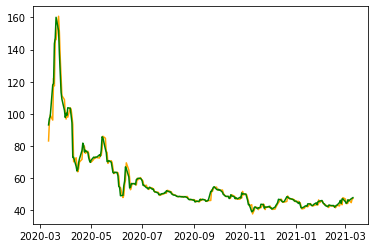

In [18]:
history_b=pd.concat([x_train_b.loc[:,set_b],x_test_b.loc[:,set_b].iloc[0:572]],axis=0)
svr_b_pred=[]

for i in range(572,833):
    history_b=history_b.append(x_test_b.loc[:,set_b].iloc[i])
    svr_b_pred.append(svr_bodel_b.predict(history_b)[-1])

svr_b_rmse_cris=metr.mean_squared_error(y_test_b.iloc[572:], svr_b_pred, squared=False)
svr_b_mape_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], svr_b_pred)
svr_b_mae_cris = metr.mean_absolute_error(y_test_b.iloc[572:], svr_b_pred)
print('Random RMSE: %.3f' % svr_b_rmse_cris,'Random MAPE: %.3f' % svr_b_mape_cris,'Random MAE: %.3f' % svr_b_mae_cris)

plt.plot(data_b.iloc[2657:,0],svr_b_pred, color="orange")
plt.plot(data_b.iloc[2657:,0],y_test_b[572:],color="green")
plt.show()
#3.567369	1.715979	0.024937

### Financial


In [20]:
#param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10],'degree' : [3,8],'coef0' : [0.01,10],'gamma' : ('auto','scale')}
param = {'coef0' : [0.01,0.001,0.0001],'degree' : [1,3],'gamma': [0.01,0.1,'auto','scale']}
#END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear
modelsvr = SVR()

grid_search = GridSearchCV(estimator = SVR(), param_grid = param, 
                      cv = 3, n_jobs = -1, verbose = 2,scoring=scorer())
grid_search.fit(x_train_f.loc[:,set_f],y_train_f)
grid_search.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'coef0': [0.01, 0.001, 0.0001], 'degree': [1, 3],
                         'gamma': [0.01, 0.1, 'auto', 'scale']},
             scoring=make_scorer(score, greater_is_better=False), verbose=2)

In [21]:
grid_search.best_params_

{'coef0': 0.01, 'degree': 1, 'gamma': 'scale'}

#### До кризиса

Random RMSE: 0.652 Random MAPE: 0.005 Random MAE: 0.409


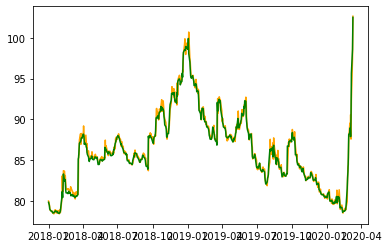

In [25]:
svr_fodel_f = SVR(kernel='linear', C=0.005, degree=1, coef0=0.01,gamma='scale')
svr_fodel_f.fit(x_train_f.loc[:,set_f], y_train_f)

history_f=x_train_f.loc[:,set_f]
svr_f_pred=[]

for i in range(0,572):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    svr_f_pred.append(svr_fodel_f.predict(history_f)[-1])
    

svr_f_rmse_norm=metr.mean_squared_error(y_test_f.iloc[:572], svr_f_pred, squared=False)
svr_f_mape_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[:572], svr_f_pred)
svr_f_mae_norm = metr.mean_absolute_error(y_test_f.iloc[:572], svr_f_pred)
print('Random RMSE: %.3f' % svr_f_rmse_norm,'Random MAPE: %.3f' % svr_f_mape_norm,'Random MAE: %.3f' % svr_f_mae_norm)

plt.plot(data_f.iloc[2085:2657,0],svr_f_pred, color="orange")
plt.plot(data_f.iloc[2085:2657,0],y_test_f[:572],color="green")
plt.show()

In [22]:
set_f=['TEDRATE_lag1',
 'NASDAQ_Financial_100_lag1',
 'NASDAQ_real_estate_and_other_fanacial_services_lag1',
 'SP_500_lag1',
 'SP_energy_lag1',
 'SP_financial_lag1',
 'SP_health_care_lag1',
 'SP_real_estate_lag1',
 'SP_VIX_lag1',
 'USD_CNY_Exchange_Rate_lag1',
 'TEDRATE_lag2',
 'NASDAQ_Financial_100_lag2',
 'NASDAQ_real_estate_and_other_fanacial_services_lag2',
 'SP_500_lag2',
 'SP_energy_lag2',
 'SP_financial_lag2',
 'SP_health_care_lag2',
 'SP_real_estate_lag2',
 'SP_VIX_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 'CDS_5Y_lag1',
 'CDS_5Y_lag2']


In [ ]:
x_train_f.loc[:,]

#### После кризиса

Random RMSE: 2.061 Random MAPE: 0.011 Random MAE: 1.166


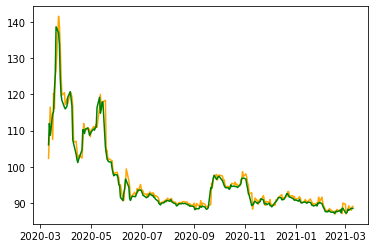

In [26]:
svr_fodel_f = SVR(kernel='linear', C=0.005, degree=1, coef0=0.01,gamma='scale')
svr_fodel_f.fit(x_train_f.loc[:,set_f], y_train_f)
history_f=pd.concat([x_train_f.loc[:,set_f],x_test_f.loc[:,set_f].iloc[0:572]],axis=0)
svr_f_pred=[]

for i in range(572,833):
    history_f=history_f.append(x_test_f.loc[:,set_f].iloc[i])
    svr_f_pred.append(svr_fodel_f.predict(history_f)[-1])

svr_f_rmse_cris=metr.mean_squared_error(y_test_f.iloc[572:], svr_f_pred, squared=False)
svr_f_mape_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], svr_f_pred)
svr_f_mae_cris = metr.mean_absolute_error(y_test_f.iloc[572:], svr_f_pred)
print('Random RMSE: %.3f' % svr_f_rmse_cris,'Random MAPE: %.3f' % svr_f_mape_cris,'Random MAE: %.3f' % svr_f_mae_cris)

plt.plot(data_f.iloc[2657:,0],svr_f_pred, color="orange")
plt.plot(data_f.iloc[2657:,0],y_test_f[572:],color="green")
plt.show()
#1.933258	0.917252	0.008790

### Energy

In [19]:
#param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10],'degree' : [3,8],'coef0' : [0.01,10],'gamma' : ('auto','scale')}
param = {'coef0' : [0.01,0.001,0.0001],'degree' : [1,3,8],'gamma': [0.01,0.1,'auto','scale'],'C' : [1,10]}
#param = {'kernel' : ('linear', 'poly'),'C' : [0.01,1],'gamma': [0.01,0.1,'auto','scale']}
#END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear
modelsvr = SVR()

grid_search = GridSearchCV(estimator = SVR(), param_grid = param, 
                      cv = 3, n_jobs = -1, verbose = 2,scoring=scorer())
grid_search.fit(x_train_e.loc[:,set_e],y_train_e)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'C': 10, 'coef0': 0.01, 'degree': 1, 'gamma': 'scale'}

#### До кризиса

Random RMSE: 3.696 Random MAPE: 0.014 Random MAE: 1.053


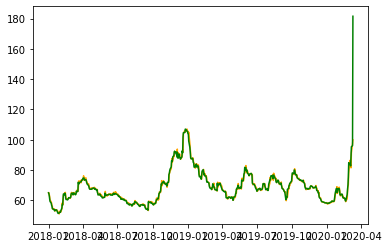

In [29]:
svr_eodel_e = SVR(kernel='linear', C=0.005, degree=0.01, coef0=0.01,gamma='scale')
svr_eodel_e.fit(x_train_e.loc[:,set_e_mod], y_train_e)

history_e=x_train_e.loc[:,set_e_mod]
svr_e_pred=[]

for i in range(0,572):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    svr_e_pred.append(svr_eodel_e.predict(history_e)[-1])

svr_e_rmse_norm=metr.mean_squared_error(y_test_e.iloc[:572], svr_e_pred, squared=False)
svr_e_mape_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[:572], svr_e_pred)
svr_e_mae_norm = metr.mean_absolute_error(y_test_e.iloc[:572], svr_e_pred)
print('Random RMSE: %.3f' % svr_e_rmse_norm,'Random MAPE: %.3f' % svr_e_mape_norm,'Random MAE: %.3f' % svr_e_mae_norm)

plt.plot(data_e.iloc[2085:2657,0],svr_e_pred, color="orange")
plt.plot(data_e.iloc[2085:2657,0],y_test_e[:572],color="green")
plt.show()
#3.876609	1.050047	0.013485

#### После кризиса

Random RMSE: 4.366 Random MAPE: 0.021 Random MAE: 2.465


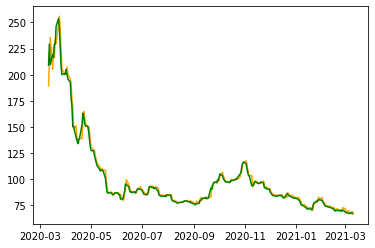

In [30]:
history_e=pd.concat([x_train_e.loc[:,set_e_mod],x_test_e.loc[:,set_e_mod].iloc[0:572]],axis=0)
svr_e_pred=[]

for i in range(572,833):
    history_e=history_e.append(x_test_e.loc[:,set_e_mod].iloc[i])
    svr_e_pred.append(svr_eodel_e.predict(history_e)[-1])

svr_e_rmse_cris=metr.mean_squared_error(y_test_e.iloc[572:], svr_e_pred, squared=False)
svr_e_mape_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], svr_e_pred)
svr_e_mae_cris = metr.mean_absolute_error(y_test_e.iloc[572:], svr_e_pred)
print('Random RMSE: %.3f' % svr_e_rmse_cris,'Random MAPE: %.3f' % svr_e_mape_cris,'Random MAE: %.3f' % svr_e_mae_cris)

plt.plot(data_e.iloc[2657:,0],svr_e_pred, color="orange")
plt.plot(data_e.iloc[2657:,0],y_test_e[572:],color="green")
plt.show()



### Service

In [23]:
#param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10],'degree' : [3,8],'coef0' : [0.01,10],'gamma' : ('auto','scale')}
param = {'coef0' : [0.01,0.001,0.0001],'degree' : [1,3,8],'gamma': [0.01,0.1,'auto','scale'],'C' : [1,10]}
#param = {'kernel' : ('linear', 'poly'),'C' : [0.01,1],'gamma': [0.01,0.1,'auto','scale']}
#END C=1, coef0=0.01, degree=8, gamma=scale, kernel=linear
modelsvr = SVR()

grid_search = GridSearchCV(estimator = SVR(), param_grid = param, 
                      cv = 3, n_jobs = -1, verbose = 2,scoring=scorer())
grid_search.fit(x_train_s.loc[:,set_s],y_train_s)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'C': 10, 'coef0': 0.01, 'degree': 1, 'gamma': 'scale'}

#### До кризиса

In [31]:
set_s_mod=['TEDRATE_lag1',
 'SP_health_care_lag1',
 'SP_VIX_lag1',
 '10Y_yield_minus_fed_funds_rate_lag1',
 'USD_CNY_Exchange_Rate_lag1',
# 'Oil_Futures_lag1',
 'CDS_5Y_lag1',
 'TEDRATE_lag2',
 'SP_health_care_lag2',
 'SP_VIX_lag2',
 '10Y_yield_minus_fed_funds_rate_lag2',
 'USD_CNY_Exchange_Rate_lag2',
 #'Oil_Futures_lag2',
 'CDS_5Y_lag2']

In [641]:
x_train_s.loc[:,set_s_mod].corr()

,TEDRATE_lag1,SP_health_care_lag1,SP_VIX_lag1,10Y_yield_minus_fed_funds_rate_lag1,USD_CNY_Exchange_Rate_lag1,Oil_Futures_lag1,CDS_5Y_lag1,TEDRATE_lag2,SP_health_care_lag2,SP_VIX_lag2,10Y_yield_minus_fed_funds_rate_lag2,USD_CNY_Exchange_Rate_lag2,Oil_Futures_lag2,CDS_5Y_lag2
TEDRATE_lag1,1.000000,0.207996,0.094183,-0.519943,0.309563,-0.355067,-0.012199,0.990987,0.208541,0.098262,-0.518623,0.308256,-0.356220,-0.011651
SP_health_care_lag1,0.207996,1.000000,-0.605535,-0.576974,0.020653,-0.716710,-0.934089,0.207759,0.999614,-0.604375,-0.577331,0.018732,-0.715987,-0.933700
SP_VIX_lag1,0.094183,-0.605535,1.000000,0.273559,0.079542,0.160228,0.749788,0.089566,-0.601819,0.966550,0.280107,0.079542,0.162910,0.741827
10Y_yield_minus_fed_funds_rate_lag1,-0.519943,-0.576974,0.273559,1.000000,-0.031158,0.529208,0.400126,-0.520884,-0.577122,0.273497,0.996802,-0.030826,0.529358,0.399620
USD_CNY_Exchange_Rate_lag1,0.309563,0.020653,0.079542,-0.031158,1.000000,-0.472877,0.093677,0.309935,0.021355,0.079722,-0.029358,0.999252,-0.474388,0.092772
Oil_Futures_lag1,-0.355067,-0.716710,0.160228,0.529208,-0.472877,1.000000,0.531421,-0.353895,-0.717634,0.161918,0.527288,-0.470728,0.998334,0.533039
CDS_5Y_lag1,-0.012199,-0.934089,0.749788,0.400126,0.093677,0.531421,1.000000,-0.012982,-0.933966,0.752647,0.401007,0.095163,0.530330,0.999082
TEDRATE_lag2,0.990987,0.207759,0.089566,-0.520884,0.309935,-0.353895,-0.012982,1.000000,0.208325,0.094225,-0.520300,0.308599,-0.355050,-0.012244
SP_health_care_lag2,0.208541,0.999614,-0.601819,-0.577122,0.021355,-0.717634,-0.933966,0.208325,1.000000,-0.605157,-0.576871,0.019435,-0.716605,-0.933947
SP_VIX_lag2,0.098262,-0.604375,0.966550,0.273497,0.079722,0.161918,0.752647,0.094225,-0.605157,1.000000,0.272925,0.079990,0.159959,0.749607


In [32]:
#kernel='rbf', C=10, degree=3, coef0=0.0001, gamma='scale'
svr_sodel_s = SVR(kernel='linear', C=0.005, degree=1, coef0=0.01,gamma='scale')
svr_sodel_s.fit(x_train_s.loc[:,set_s_mod], y_train_s)

SVR(C=0.005, coef0=0.01, degree=1, kernel='linear')

Random RMSE: 1.008 Random MAPE: 0.009 Random MAE: 0.603


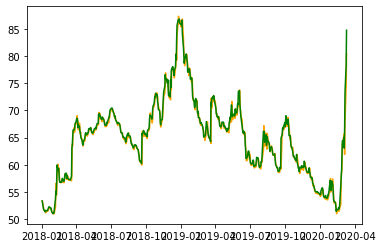

In [33]:
history_s=x_train_s.loc[:,set_s_mod]
svr_s_pred=[]

for i in range(0,572):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    svr_s_pred.append(svr_sodel_s.predict(history_s)[-1])
    

svr_s_rmse_norm=metr.mean_squared_error(y_test_s.iloc[:572], svr_s_pred, squared=False)
svr_s_mape_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[:572], svr_s_pred)
svr_s_mae_norm = metr.mean_absolute_error(y_test_s.iloc[:572], svr_s_pred)
print('Random RMSE: %.3f' % svr_s_rmse_norm,'Random MAPE: %.3f' % svr_s_mape_norm,'Random MAE: %.3f' % svr_s_mae_norm)

plt.plot(data_s.iloc[2085:2657,0],svr_s_pred, color="orange")
plt.plot(data_s.iloc[2085:2657,0],y_test_s[:572],color="green")
plt.show()
#1.044774	0.613478	0.009252
# Random RMSE: 1.052 Random MAPE: 0.010 Random MAE: 0.648

#### После кризиса

Random RMSE: 2.245 Random MAPE: 0.015 Random MAE: 1.255


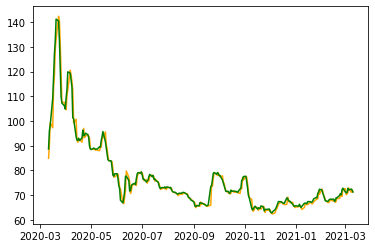

In [34]:
history_s=pd.concat([x_train_s.loc[:,set_s_mod],x_test_s.loc[:,set_s_mod].iloc[0:572]],axis=0)
svr_s_pred=[]

for i in range(572,833):
    history_s=history_s.append(x_test_s.loc[:,set_s_mod].iloc[i])
    svr_s_pred.append(svr_sodel_s.predict(history_s)[-1])

svr_s_rmse_cris=metr.mean_squared_error(y_test_s.iloc[572:], svr_s_pred, squared=False)
svr_s_mape_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], svr_s_pred)
svr_s_mae_cris = metr.mean_absolute_error(y_test_s.iloc[572:], svr_s_pred)
print('Random RMSE: %.3f' % svr_s_rmse_cris,'Random MAPE: %.3f' % svr_s_mape_cris,'Random MAE: %.3f' % svr_s_mae_cris)

plt.plot(data_s.iloc[2657:,0],svr_s_pred, color="orange")
plt.plot(data_s.iloc[2657:,0],y_test_s[572:],color="green")
plt.show()
#2.427074	1.309574	0.015230

## RW

#### До кризиса

In [351]:
rmse_c_norm = metr.mean_squared_error(y_test_c.iloc[1:572], y_test_c.shift(1).iloc[1:572], squared=False)
mape_c_norm = metr.mean_absolute_percentage_error(y_test_c.iloc[1:572], y_test_c.shift(1).iloc[1:572])
mae_c_norm = metr.mean_absolute_error(y_test_c.iloc[1:572], y_test_c.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_c_norm,'Random MAPE: %.3f' % mape_c_norm,'Random MAE: %.3f' % mae_c_norm)

Random RMSE: 1.010 Random MAPE: 0.011 Random MAE: 0.599


In [352]:
rmse_m_norm = metr.mean_squared_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572], squared=False)
mape_m_norm = metr.mean_absolute_percentage_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572])
mae_m_norm = metr.mean_absolute_error(y_test_m.iloc[1:572], y_test_m.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_m_norm,'Random MAPE: %.3f' % mape_m_norm,'Random MAE: %.3f' % mae_m_norm)

Random RMSE: 1.297 Random MAPE: 0.008 Random MAE: 0.770


In [353]:
rmse_b_norm = metr.mean_squared_error(y_test_b.iloc[1:572], y_test_b.shift(1).iloc[1:572], squared=False)
mape_b_norm = metr.mean_absolute_percentage_error(y_test_b.iloc[1:572], y_test_b.shift(1).iloc[1:572])
mae_b_norm = metr.mean_absolute_error(y_test_b.iloc[1:572], y_test_b.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_b_norm,'Random MAPE: %.3f' % mape_b_norm,'Random MAE: %.3f' % mae_b_norm)

Random RMSE: 1.516 Random MAPE: 0.017 Random MAE: 0.875


In [354]:
rmse_f_norm = metr.mean_squared_error(y_test_f.iloc[1:572], y_test_f.shift(1).iloc[1:572], squared=False)
mape_f_norm = metr.mean_absolute_percentage_error(y_test_f.iloc[1:572], y_test_f.shift(1).iloc[1:572])
mae_f_norm = metr.mean_absolute_error(y_test_f.iloc[1:572], y_test_f.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_f_norm,'Random MAPE: %.3f' % mape_f_norm,'Random MAE: %.3f' % mae_f_norm)

Random RMSE: 0.674 Random MAPE: 0.004 Random MAE: 0.358


In [355]:
rmse_e_norm = metr.mean_squared_error(y_test_e.iloc[1:572], y_test_e.shift(1).iloc[1:572], squared=False)
mape_e_norm = metr.mean_absolute_percentage_error(y_test_e.iloc[1:572], y_test_e.shift(1).iloc[1:572])
mae_e_norm = metr.mean_absolute_error(y_test_e.iloc[1:572], y_test_e.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_e_norm,'Random MAPE: %.3f' % mape_e_norm,'Random MAE: %.3f' % mae_e_norm)

Random RMSE: 3.877 Random MAPE: 0.013 Random MAE: 1.050


In [356]:
rmse_s_norm = metr.mean_squared_error(y_test_s.iloc[1:572], y_test_s.shift(1).iloc[1:572], squared=False)
mape_s_norm = metr.mean_absolute_percentage_error(y_test_s.iloc[1:572], y_test_s.shift(1).iloc[1:572])
mae_s_norm = metr.mean_absolute_error(y_test_s.iloc[1:572], y_test_s.shift(1).iloc[1:572])
print('Random RMSE: %.3f' % rmse_s_norm,'Random MAPE: %.3f' % mape_s_norm,'Random MAE: %.3f' % mae_s_norm)

Random RMSE: 1.045 Random MAPE: 0.009 Random MAE: 0.613


#### После кризиса

In [357]:
rmse_c_cris = metr.mean_squared_error(y_test_c.iloc[572:], y_test_c.shift(1).iloc[572:], squared=False)
mape_c_cris = metr.mean_absolute_percentage_error(y_test_c.iloc[572:], y_test_c.shift(1).iloc[572:])
mae_c_cris = metr.mean_absolute_error(y_test_c.iloc[572:], y_test_c.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_c_cris,'Random MAPE: %.3f' % mape_c_cris,'Random MAE: %.3f' % mae_c_cris)

Random RMSE: 1.192 Random MAPE: 0.014 Random MAE: 0.688


In [358]:
rmse_m_cris = metr.mean_squared_error(y_test_m.iloc[572:], y_test_m.shift(1).iloc[572:], squared=False)
mape_m_cris = metr.mean_absolute_percentage_error(y_test_m.iloc[572:], y_test_m.shift(1).iloc[572:])
mae_m_cris = metr.mean_absolute_error(y_test_m.iloc[572:], y_test_m.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_m_cris,'Random MAPE: %.3f' % mape_m_cris,'Random MAE: %.3f' % mae_m_cris)

Random RMSE: 2.541 Random MAPE: 0.012 Random MAE: 1.466


In [359]:
rmse_b_cris = metr.mean_squared_error(y_test_b.iloc[572:], y_test_b.shift(1).iloc[572:], squared=False)
mape_b_cris = metr.mean_absolute_percentage_error(y_test_b.iloc[572:], y_test_b.shift(1).iloc[572:])
mae_b_cris = metr.mean_absolute_error(y_test_b.iloc[572:], y_test_b.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_b_cris,'Random MAPE: %.3f' % mape_b_cris,'Random MAE: %.3f' % mae_b_cris)


Random RMSE: 3.567 Random MAPE: 0.025 Random MAE: 1.716


In [360]:
rmse_f_cris = metr.mean_squared_error(y_test_f.iloc[572:], y_test_f.shift(1).iloc[572:], squared=False)
mape_f_cris = metr.mean_absolute_percentage_error(y_test_f.iloc[572:], y_test_f.shift(1).iloc[572:])
mae_f_cris = metr.mean_absolute_error(y_test_f.iloc[572:], y_test_f.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_f_cris,'Random MAPE: %.3f' % mape_f_cris,'Random MAE: %.3f' % mae_f_cris)

Random RMSE: 1.933 Random MAPE: 0.009 Random MAE: 0.917


In [361]:
rmse_e_cris = metr.mean_squared_error(y_test_e.iloc[572:], y_test_e.shift(1).iloc[572:], squared=False)
mape_e_cris = metr.mean_absolute_percentage_error(y_test_e.iloc[572:], y_test_e.shift(1).iloc[572:])
mae_e_cris = metr.mean_absolute_error(y_test_e.iloc[572:], y_test_e.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_e_cris,'Random MAPE: %.3f' % mape_e_cris,'Random MAE: %.3f' % mae_e_cris)


Random RMSE: 4.510 Random MAPE: 0.019 Random MAE: 2.313


In [362]:
rmse_s_cris = metr.mean_squared_error(y_test_s.iloc[572:], y_test_s.shift(1).iloc[572:], squared=False)
mape_s_cris = metr.mean_absolute_percentage_error(y_test_s.iloc[572:], y_test_s.shift(1).iloc[572:])
mae_s_cris = metr.mean_absolute_error(y_test_s.iloc[572:], y_test_s.shift(1).iloc[572:])
print('Random RMSE: %.3f' % rmse_s_cris,'Random MAPE: %.3f' % mape_s_cris,'Random MAE: %.3f' % mae_s_cris)

Random RMSE: 2.427 Random MAPE: 0.015 Random MAE: 1.310


In [39]:
error = metr.mean_squared_error(scaled_y_test_c.iloc[:-1], scaled_y_test_c.shift(-1).iloc[:-1], squared=False)
error1 = metr.mean_absolute_percentage_error(scaled_y_test_c.iloc[:-1], scaled_y_test_c.shift(-1).iloc[:-1])
error2 = metr.mean_absolute_error(scaled_y_test_c.iloc[:-1], scaled_y_test_c.shift(-1).iloc[:-1])
print('Random RMSE: %.3f' % error,'Random MAPE: %.3f' % error1,'Random MAE: %.3f' % error2)

Random RMSE: 0.026 Random MAPE: 27879090239.862 Random MAE: 0.015


In [17]:
pd.concat([data_c.iloc[:,1:21],data_c.iloc[:,27],data_m.iloc[:,27],data_b.iloc[:,27],data_f.iloc[:,27],data_e.iloc[:,27],data_s.iloc[:,27]],axis=1).corr().to_excel("corr.xlsx")

# Итог до кризиса

#### Random walk

In [31]:
#'XGBoost': [xgb_rmse_c, xgb_m_rmse,xgb_b_rmse,xgb_e_rmse,xgb_f_rmse,xgb_s_rmse], ,'MLP':[mlp_c_rmse, mlp_m_rmse,mlp_b_rmse,mlp_e_rmse,mlp_f_rmse,mlp_s_rmse]
d = {'RMSE':[rmse_c_norm,rmse_m_norm,rmse_b_norm,rmse_e_norm,rmse_f_norm,rmse_s_norm],'MAE':[mae_c_norm,mae_m_norm,mae_b_norm,mae_e_norm,mae_f_norm,mae_s_norm],'MAPE':[mape_c_norm,mape_m_norm,mape_b_norm,mape_e_norm,mape_f_norm,mape_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df

,RMSE,MAE,MAPE
Consumer,1.010184,0.598854,0.010533
Manufacturing,1.297220,0.770024,0.008158
Banks,1.516456,0.875204,0.017116
Energy,3.876609,1.050047,0.013485
Finance,0.674235,0.357771,0.004069
Service,1.044774,0.613478,0.009252


#### Данные

In [367]:
#'XGBoost': [xgb_rmse_c, xgb_m_rmse,xgb_b_rmse,xgb_e_rmse,xgb_f_rmse,xgb_s_rmse], ,'MLP':[mlp_c_rmse, mlp_m_rmse,mlp_b_rmse,mlp_e_rmse,mlp_f_rmse,mlp_s_rmse]
d = {'XGBoost': [xgb_c_rmse_norm, xgb_m_rmse_norm,xgb_b_rmse_norm,xgb_e_rmse_norm,xgb_f_rmse_norm,xgb_s_rmse_norm],'Random forest': [rf_c_rmse_norm, rf_m_rmse_norm,rf_b_rmse_norm,rf_e_rmse_norm,rf_f_rmse_norm,rf_s_rmse_norm],'Bagging':[bag_c_rmse_norm, bag_m_rmse_norm,bag_b_rmse_norm,bag_e_rmse_norm,bag_f_rmse_norm,bag_s_rmse_norm],'MLP':[mlp_c_rmse_norm, mlp_m_rmse_norm,mlp_b_rmse_norm,mlp_e_rmse_norm,mlp_f_rmse_norm,mlp_s_rmse_norm],'SVR':[svr_c_rmse_norm, svr_m_rmse_norm,svr_b_rmse_norm,svr_e_rmse_norm,svr_f_rmse_norm,svr_s_rmse_norm],
     'RW':[rmse_c_norm,rmse_m_norm,rmse_b_norm,rmse_e_norm,rmse_f_norm,rmse_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("RMSE norm.xlsx")
#df.style.apply(highlight, col2highlite='MLP', axis=None)

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,1.406821,1.063813,1.089386,1.026352,1.024927,1.010184
Manufacturing,2.976088,2.436572,4.221937,2.774845,1.208090,1.297220
Banks,1.977055,2.393759,1.870600,1.444802,1.477463,1.516456
Energy,3.812343,3.800385,3.845767,3.699331,3.695821,3.876609
Finance,0.727867,0.740336,0.781179,0.673667,0.652340,0.674235
Service,1.405512,1.234154,1.252103,1.013707,1.008135,1.044774


In [525]:
#'XGBoost': [xgb_rmse_c, xgb_m_rmse,xgb_b_rmse,xgb_e_rmse,xgb_f_rmse,xgb_s_rmse], ,'MLP':[mlp_c_rmse, mlp_m_rmse,mlp_b_rmse,mlp_e_rmse,mlp_f_rmse,mlp_s_rmse]
d = {'XGBoost': [xgb_c_rmse_norm, xgb_m_rmse_norm,xgb_b_rmse_norm,xgb_e_rmse_norm,xgb_f_rmse_norm,xgb_s_rmse_norm],'Random forest': [rf_c_rmse_norm, rf_m_rmse_norm,rf_b_rmse_norm,rf_e_rmse_norm,rf_f_rmse_norm,rf_s_rmse_norm],'Bagging':[bag_c_rmse_norm, bag_m_rmse_norm,bag_b_rmse_norm,bag_e_rmse_norm,bag_f_rmse_norm,bag_s_rmse_norm],'MLP':[mlp_c_rmse_norm, mlp_m_rmse_norm,mlp_b_rmse_norm,mlp_e_rmse_norm,mlp_f_rmse_norm,mlp_s_rmse_norm],'SVR':[svr_c_rmse_norm, svr_m_rmse_norm,svr_b_rmse_norm,svr_e_rmse_norm,svr_f_rmse_norm,svr_s_rmse_norm],
     'RW':[rmse_c_norm,rmse_m_norm,rmse_b_norm,rmse_e_norm,rmse_f_norm,rmse_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("RMSE norm.xlsx")
#df.style.apply(highlight, col2highlite='MLP', axis=None)

In [377]:
def highlight(df, col1,col2,col3,col4,col5):
    ret = pd.DataFrame("", index=df.index, columns=df.columns)
    ret.loc[df.loc[:,col1] < df['RW'], col1] = "background-color: green"
    ret.loc[df.loc[:,col2] < df['RW'], col2] = "background-color: green"
    ret.loc[df.loc[:,col3] < df['RW'], col3] = "background-color: green"
    ret.loc[df.loc[:,col4] < df['RW'], col4] = "background-color: green"
    ret.loc[df.loc[:,col5] < df['RW'], col5] = "background-color: green"
    return ret

df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("RMSE norm.xlsx")
#df.style.apply(highlight, col2highlite='MLP', axis=None)

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,1.406821,1.063813,1.089386,1.026352,1.024927,1.010184
Manufacturing,2.976088,2.436572,4.221937,2.774845,1.208090,1.297220
Banks,1.977055,2.393759,1.870600,1.444802,1.477463,1.516456
Energy,3.812343,3.800385,3.845767,3.699331,3.695821,3.876609
Finance,0.727867,0.740336,0.781179,0.673667,0.652340,0.674235
Service,1.405512,1.234154,1.252103,1.013707,1.008135,1.044774


### MAPE

In [381]:
#'XGBoost': [xgb_mape_c, xgb_m_mape,xgb_b_mape,xgb_e_mape,xgb_f_mape,xgb_s_mape], ,'MLP':[mlp_c_mape, mlp_m_mape,mlp_b_mape,mlp_e_mape,mlp_f_mape,mlp_s_mape]
d = {'XGBoost': [xgb_c_mape_norm, xgb_m_mape_norm,xgb_b_mape_norm,xgb_e_mape_norm,xgb_f_mape_norm,xgb_s_mape_norm],'Random forest': [rf_c_mape_norm, rf_m_mape_norm,rf_b_mape_norm,rf_e_mape_norm,rf_f_mape_norm,rf_s_mape_norm],'Bagging':[bag_c_mape_norm, bag_m_mape_norm,bag_b_mape_norm,bag_e_mape_norm,bag_f_mape_norm,bag_s_mape_norm],'MLP':[mlp_c_mape_norm, mlp_m_mape_norm,mlp_b_mape_norm,mlp_e_mape_norm,mlp_f_mape_norm,mlp_s_mape_norm],'SVR':[svr_c_mape_norm, svr_m_mape_norm,svr_b_mape_norm,svr_e_mape_norm,svr_f_mape_norm,svr_s_mape_norm],
     'RW':[mape_c_norm,mape_m_norm,mape_b_norm,mape_e_norm,mape_f_norm,mape_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAPE norm.xlsx")


,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,0.018555,0.012226,0.012674,0.010387,0.010429,0.010533
Manufacturing,0.027660,0.019838,0.033971,0.021805,0.007863,0.008158
Banks,0.030067,0.035603,0.026849,0.016842,0.017038,0.017116
Energy,0.020044,0.018405,0.019700,0.019072,0.013629,0.013485
Finance,0.004938,0.005081,0.005344,0.004774,0.004674,0.004069
Service,0.014897,0.012606,0.012830,0.009337,0.009088,0.009252


In [520]:
#'XGBoost': [xgb_mape_c, xgb_m_mape,xgb_b_mape,xgb_e_mape,xgb_f_mape,xgb_s_mape], ,'MLP':[mlp_c_mape, mlp_m_mape,mlp_b_mape,mlp_e_mape,mlp_f_mape,mlp_s_mape]
d = {'XGBoost': [xgb_c_mape_norm, xgb_m_mape_norm,xgb_b_mape_norm,xgb_e_mape_norm,xgb_f_mape_norm,xgb_s_mape_norm],'Random forest': [rf_c_mape_norm, rf_m_mape_norm,rf_b_mape_norm,rf_e_mape_norm,rf_f_mape_norm,rf_s_mape_norm],'Bagging':[bag_c_mape_norm, bag_m_mape_norm,bag_b_mape_norm,bag_e_mape_norm,bag_f_mape_norm,bag_s_mape_norm],'MLP':[mlp_c_mape_norm, mlp_m_mape_norm,mlp_b_mape_norm,mlp_e_mape_norm,mlp_f_mape_norm,mlp_s_mape_norm],'SVR':[svr_c_mape_norm, svr_m_mape_norm,svr_b_mape_norm,svr_e_mape_norm,svr_f_mape_norm,svr_s_mape_norm],
     'RW':[mape_c_norm,mape_m_norm,mape_b_norm,mape_e_norm,mape_f_norm,mape_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAPE norm.xlsx")


### MAE

In [382]:
#'XGBoost': [xgb_mae_c, xgb_m_mae,xgb_b_mae,xgb_e_mae,xgb_f_mae,xgb_s_mae], ,'MLP':[mlp_c_mae, mlp_m_mae,mlp_b_mae,mlp_e_mae,mlp_f_mae,mlp_s_mae]
d = {'XGBoost': [xgb_c_mae_norm, xgb_m_mae_norm,xgb_b_mae_norm,xgb_e_mae_norm,xgb_f_mae_norm,xgb_s_mae_norm],'Random forest': [rf_c_mae_norm, rf_m_mae_norm,rf_b_mae_norm,rf_e_mae_norm,rf_f_mae_norm,rf_s_mae_norm],'Bagging':[bag_c_mae_norm, bag_m_mae_norm,bag_b_mae_norm,bag_e_mae_norm,bag_f_mae_norm,bag_s_mae_norm],'MLP':[mlp_c_mae_norm, mlp_m_mae_norm,mlp_b_mae_norm,mlp_e_mae_norm,mlp_f_mae_norm,mlp_s_mae_norm],'SVR':[svr_c_mae_norm, svr_m_mae_norm,svr_b_mae_norm,svr_e_mae_norm,svr_f_mae_norm,svr_s_mae_norm],
     'RW':[mae_c_norm,mae_m_norm,mae_b_norm,mae_e_norm,mae_f_norm,mae_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAE norm.xlsx")


,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,1.049457,0.683946,0.710392,0.592169,0.594102,0.598854
Manufacturing,2.518039,1.837225,3.120833,1.896649,0.741659,0.770024
Banks,1.390099,1.708433,1.281686,0.855938,0.869122,0.875204
Energy,1.435431,1.338095,1.424608,1.403297,1.053038,1.050047
Finance,0.433090,0.444940,0.468670,0.416047,0.408506,0.357771
Service,0.962670,0.804392,0.821557,0.617431,0.602524,0.613478


In [519]:
#'XGBoost': [xgb_mae_c, xgb_m_mae,xgb_b_mae,xgb_e_mae,xgb_f_mae,xgb_s_mae], ,'MLP':[mlp_c_mae, mlp_m_mae,mlp_b_mae,mlp_e_mae,mlp_f_mae,mlp_s_mae]
d = {'XGBoost': [xgb_c_mae_norm, xgb_m_mae_norm,xgb_b_mae_norm,xgb_e_mae_norm,xgb_f_mae_norm,xgb_s_mae_norm],'Random forest': [rf_c_mae_norm, rf_m_mae_norm,rf_b_mae_norm,rf_e_mae_norm,rf_f_mae_norm,rf_s_mae_norm],'Bagging':[bag_c_mae_norm, bag_m_mae_norm,bag_b_mae_norm,bag_e_mae_norm,bag_f_mae_norm,bag_s_mae_norm],'MLP':[mlp_c_mae_norm, mlp_m_mae_norm,mlp_b_mae_norm,mlp_e_mae_norm,mlp_f_mae_norm,mlp_s_mae_norm],'SVR':[svr_c_mae_norm, svr_m_mae_norm,svr_b_mae_norm,svr_e_mae_norm,svr_f_mae_norm,svr_s_mae_norm],
     'RW':[mae_c_norm,mae_m_norm,mae_b_norm,mae_e_norm,mae_f_norm,mae_s_norm]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAE norm.xlsx")


# Итог после кризиса

#### Random walk

In [32]:
d = {'RMSE':[rmse_c_cris,rmse_m_cris,rmse_b_cris,rmse_e_cris,rmse_f_cris,rmse_s_cris],'MAE':[mae_c_cris,mae_m_cris,mae_b_cris,mae_e_cris,mae_f_cris,mae_s_cris],'MAPE':[mape_c_cris,mape_m_cris,mape_b_cris,mape_e_cris,mape_f_cris,mape_s_cris]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df
        


,RMSE,MAE,MAPE
Consumer,1.192099,0.688487,0.013830
Manufacturing,2.540597,1.465859,0.012451
Banks,3.567369,1.715979,0.024937
Energy,4.510319,2.312523,0.018790
Finance,1.933258,0.917252,0.008790
Service,2.427074,1.309574,0.015230


In [378]:
#'XGBoost': [xgb_rmse_c, xgb_m_rmse,xgb_b_rmse,xgb_e_rmse,xgb_f_rmse,xgb_s_rmse], ,'MLP':[mlp_c_rmse, mlp_m_rmse,mlp_b_rmse,mlp_e_rmse,mlp_f_rmse,mlp_s_rmse]
d = {'XGBoost': [xgb_c_rmse_cris, xgb_m_rmse_cris,xgb_b_rmse_cris,xgb_e_rmse_cris,xgb_f_rmse_cris,xgb_s_rmse_cris],'Random forest': [rf_c_rmse_cris, rf_m_rmse_cris,rf_b_rmse_cris,rf_e_rmse_cris,rf_f_rmse_cris,rf_s_rmse_cris],'Bagging':[bag_c_rmse_cris, bag_m_rmse_cris,bag_b_rmse_cris,bag_e_rmse_cris,bag_f_rmse_cris,bag_s_rmse_cris],'MLP':[mlp_c_rmse_cris, mlp_m_rmse_cris,mlp_b_rmse_cris,mlp_e_rmse_cris,mlp_f_rmse_cris,mlp_s_rmse_cris],'SVR':[svr_c_rmse_cris, svr_m_rmse_cris,svr_b_rmse_cris,svr_e_rmse_cris,svr_f_rmse_cris,svr_s_rmse_cris],
    'RW':[rmse_c_cris,rmse_m_cris,rmse_b_cris,rmse_e_cris,rmse_f_cris,rmse_s_cris]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("RMSE crisis.xlsx")

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,1.229367,1.227519,1.252928,1.248798,1.273966,1.192099
Manufacturing,4.051191,4.086576,5.718170,5.336513,2.300767,2.540597
Banks,3.565029,5.856923,4.189068,3.655915,3.540748,3.567369
Energy,4.870394,5.227314,4.976306,4.963723,4.366390,4.510319
Finance,1.941700,2.280604,2.179769,2.016263,2.061144,1.933258
Service,2.719339,2.601785,2.556352,2.084779,2.245474,2.427074


In [518]:
#'XGBoost': [xgb_rmse_c, xgb_m_rmse,xgb_b_rmse,xgb_e_rmse,xgb_f_rmse,xgb_s_rmse], ,'MLP':[mlp_c_rmse, mlp_m_rmse,mlp_b_rmse,mlp_e_rmse,mlp_f_rmse,mlp_s_rmse]
d = {'XGBoost': [xgb_c_rmse_cris, xgb_m_rmse_cris,xgb_b_rmse_cris,xgb_e_rmse_cris,xgb_f_rmse_cris,xgb_s_rmse_cris],'Random forest': [rf_c_rmse_cris, rf_m_rmse_cris,rf_b_rmse_cris,rf_e_rmse_cris,rf_f_rmse_cris,rf_s_rmse_cris],'Bagging':[bag_c_rmse_cris, bag_m_rmse_cris,bag_b_rmse_cris,bag_e_rmse_cris,bag_f_rmse_cris,bag_s_rmse_cris],'MLP':[mlp_c_rmse_cris, mlp_m_rmse_cris,mlp_b_rmse_cris,mlp_e_rmse_cris,mlp_f_rmse_cris,mlp_s_rmse_cris],'SVR':[svr_c_rmse_cris, svr_m_rmse_cris,svr_b_rmse_cris,svr_e_rmse_cris,svr_f_rmse_cris,svr_s_rmse_cris],
    'RW':[rmse_c_cris,rmse_m_cris,rmse_b_cris,rmse_e_cris,rmse_f_cris,rmse_s_cris]}
df = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
df.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None)

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,1.229367,1.227519,1.252928,1.248798,1.273966,1.192099
Manufacturing,4.051191,4.086576,5.718170,5.336513,2.300767,2.540597
Banks,3.565029,5.856923,3.779953,3.655915,3.540748,3.567369
Energy,4.870394,5.227314,4.976306,4.963723,4.366390,4.510319
Finance,1.985042,2.280604,2.179769,2.016263,2.061144,1.933258
Service,2.719339,2.601785,2.556352,2.084779,2.245474,2.427074


In [379]:
#'XGBoost': [xgb_mape_c, xgb_m_mape,xgb_b_mape,xgb_e_mape,xgb_f_mape,xgb_s_mape], ,'MLP':[mlp_c_mape, mlp_m_mape,mlp_b_mape,mlp_e_mape,mlp_f_mape,mlp_s_mape]
dmape = {'XGBoost': [xgb_c_mape_cris, xgb_m_mape_cris,xgb_b_mape_cris,xgb_e_mape_cris,xgb_f_mape_cris,xgb_s_mape_cris],'Random forest': [rf_c_mape_cris, rf_m_mape_cris,rf_b_mape_cris,rf_e_mape_cris,rf_f_mape_cris,rf_s_mape_cris],'Bagging':[bag_c_mape_cris, bag_m_mape_cris,bag_b_mape_cris,bag_e_mape_cris,bag_f_mape_cris,bag_s_mape_cris],'MLP':[mlp_c_mape_cris, mlp_m_mape_cris,mlp_b_mape_cris,mlp_e_mape_cris,mlp_f_mape_cris,mlp_s_mape_cris],'SVR':[svr_c_mape_cris, svr_m_mape_cris,svr_b_mape_cris,svr_e_mape_cris,svr_f_mape_cris,svr_s_mape_cris],
    'RW':[mape_c_cris,mape_m_cris,mape_b_cris,mape_e_cris,mape_f_cris,mape_s_cris]}
dfmape = pd.DataFrame(data=dmape,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])

dfmape.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAE crisis.xlsx")

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,0.014722,0.015582,0.016070,0.014037,0.014281,0.013830
Manufacturing,0.032083,0.030106,0.042751,0.042334,0.012119,0.012451
Banks,0.028275,0.043519,0.030802,0.026393,0.025197,0.024937
Energy,0.027785,0.023800,0.023335,0.033609,0.021021,0.018790
Finance,0.008985,0.013877,0.010773,0.010446,0.011445,0.008790
Service,0.020655,0.017163,0.017214,0.014547,0.014817,0.015230


In [516]:
#'XGBoost': [xgb_mape_c, xgb_m_mape,xgb_b_mape,xgb_e_mape,xgb_f_mape,xgb_s_mape], ,'MLP':[mlp_c_mape, mlp_m_mape,mlp_b_mape,mlp_e_mape,mlp_f_mape,mlp_s_mape]
dmape = {'XGBoost': [xgb_c_mape_cris, xgb_m_mape_cris,xgb_b_mape_cris,xgb_e_mape_cris,xgb_f_mape_cris,xgb_s_mape_cris],'Random forest': [rf_c_mape_cris, rf_m_mape_cris,rf_b_mape_cris,rf_e_mape_cris,rf_f_mape_cris,rf_s_mape_cris],'Bagging':[bag_c_mape_cris, bag_m_mape_cris,bag_b_mape_cris,bag_e_mape_cris,bag_f_mape_cris,bag_s_mape_cris],'MLP':[mlp_c_mape_cris, mlp_m_mape_cris,mlp_b_mape_cris,mlp_e_mape_cris,mlp_f_mape_cris,mlp_s_mape_cris],'SVR':[svr_c_mape_cris, svr_m_mape_cris,svr_b_mape_cris,svr_e_mape_cris,svr_f_mape_cris,svr_s_mape_cris],
    'RW':[mape_c_cris,mape_m_cris,mape_b_cris,mape_e_cris,mape_f_cris,mape_s_cris]}
dfmape = pd.DataFrame(data=dmape,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])

dfmape.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAPE crisis.xlsx")

In [380]:
#'XGBoost': [xgb_mae_c, xgb_m_mae,xgb_b_mae,xgb_e_mae,xgb_f_mae,xgb_s_mae], ,'MLP':[mlp_c_mae, mlp_m_mae,mlp_b_mae,mlp_e_mae,mlp_f_mae,mlp_s_mae]
d = {'XGBoost': [xgb_c_mae_cris, xgb_m_mae_cris,xgb_b_mae_cris,xgb_e_mae_cris,xgb_f_mae_cris,xgb_s_mae_cris],'Random forest': [rf_c_mae_cris, rf_m_mae_cris,rf_b_mae_cris,rf_e_mae_cris,rf_f_mae_cris,rf_s_mae_cris],'Bagging':[bag_c_mae_cris, bag_m_mae_cris,bag_b_mae_cris,bag_e_mae_cris,bag_f_mae_cris,bag_s_mae_cris],'MLP':[mlp_c_mae_cris, mlp_m_mae_cris,mlp_b_mae_cris,mlp_e_mae_cris,mlp_f_mae_cris,mlp_s_mae_cris],'SVR':[svr_c_mae_cris, svr_m_mae_cris,svr_b_mae_cris,svr_e_mae_cris,svr_f_mae_cris,svr_s_mae_cris],
    'RW':[mae_c_cris,mae_m_cris,mae_b_cris,mae_e_cris,mae_f_cris,mae_s_cris]}
dfmae = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
dfmae
dfmae.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None)

,XGBoost,Random forest,Bagging,MLP,SVR,RW
Consumer,0.730319,0.766574,0.787311,0.703531,0.715708,0.688487
Manufacturing,3.387781,3.196072,4.318238,4.573308,1.390123,1.465859
Banks,1.850901,2.954094,2.125818,1.800588,1.707375,1.715979
Energy,3.072213,2.836520,2.767298,3.503571,2.464731,2.312523
Finance,0.931634,1.386497,1.106703,1.068088,1.165671,0.917252
Service,1.739492,1.450238,1.447643,1.223262,1.254966,1.309574


In [515]:
#'XGBoost': [xgb_mae_c, xgb_m_mae,xgb_b_mae,xgb_e_mae,xgb_f_mae,xgb_s_mae], ,'MLP':[mlp_c_mae, mlp_m_mae,mlp_b_mae,mlp_e_mae,mlp_f_mae,mlp_s_mae]
d = {'XGBoost': [xgb_c_mae_cris, xgb_m_mae_cris,xgb_b_mae_cris,xgb_e_mae_cris,xgb_f_mae_cris,xgb_s_mae_cris],'Random forest': [rf_c_mae_cris, rf_m_mae_cris,rf_b_mae_cris,rf_e_mae_cris,rf_f_mae_cris,rf_s_mae_cris],'Bagging':[bag_c_mae_cris, bag_m_mae_cris,bag_b_mae_cris,bag_e_mae_cris,bag_f_mae_cris,bag_s_mae_cris],'MLP':[mlp_c_mae_cris, mlp_m_mae_cris,mlp_b_mae_cris,mlp_e_mae_cris,mlp_f_mae_cris,mlp_s_mae_cris],'SVR':[svr_c_mae_cris, svr_m_mae_cris,svr_b_mae_cris,svr_e_mae_cris,svr_f_mae_cris,svr_s_mae_cris],
    'RW':[mae_c_cris,mae_m_cris,mae_b_cris,mae_e_cris,mae_f_cris,mae_s_cris]}
dfmae = pd.DataFrame(data=d,index=["Consumer","Manufacturing","Banks","Energy","Finance","Service"])
dfmae
dfmae.style.apply(highlight, col1='SVR',col2='MLP',col3='XGBoost',col4='Random forest',col5='Bagging', axis=None).to_excel("MAE crisis.xlsx")

#### Данные

In [176]:
svr_c_rmse_cris, svr_m_rmse_cris,svr_b_rmse_cris,svr_e_rmse_cris,svr_f_rmse_cris,svr_s_rmse_cris

(1.2739659808072084,
 2.3007668461799837,
 3.540747941472879,
 4.366390110126109,
 2.0611444223711897,
 2.245474211279376)

In [175]:
mlp_c_rmse_cris, mlp_m_rmse_cris,mlp_b_rmse_cris,mlp_e_rmse_cris,mlp_f_rmse_cris,mlp_s_rmse_cris

(1.2487976857101046,
 5.336512512743006,
 3.655914543342949,
 4.963723029521087,
 2.0162631995525606,
 2.084779308718782)

In [742]:
bag_c_rmse_cris, bag_m_rmse_cris,bag_b_rmse_cris,bag_e_rmse_cris,bag_f_rmse_cris,bag_s_rmse_cris

NameError: name 'bag_c_rmse_cris' is not defined

In [751]:
rf_c_rmse_cris, rf_m_rmse_cris,rf_b_rmse_cris,rf_e_rmse_cris,rf_f_rmse_cris,rf_s_rmse_cris

(1.2273078727465598,
 4.090669401307204,
 5.887750324793566,
 5.1627357506616685,
 2.1086040522518554,
 2.557942595841379)

In [762]:
rmse_c_cris,rmse_m_cris,rmse_b_cris,rmse_e_cris,rmse_f_cris,rmse_s_cris

(1.1920986871517836,
 2.540597394458114,
 3.5673690167781156,
 4.510319207265517,
 1.9332582353334578,
 2.427074294221579)

In [763]:
xgb_c_rmse_cris, xgb_m_rmse_cris,xgb_b_rmse_cris,xgb_e_rmse_cris,xgb_f_rmse_cris,xgb_s_rmse_cris

NameError: name 'xgb_c_rmse_cris' is not defined